# Udacity - Data Analysis Nanodegree - Project 5
----------------
## Identify Fraud from Enron Email
## Praxitelis-Nikolaos Kouroupetroglou
-----------------

## ENRON SCANDAL

![Enron Logo](Logo_Enron.png)

The Enron scandal was a financial scandal that eventually led to the bankruptcy of the Enron Corporation, an American energy company based in Houston, Texas, and the de facto dissolution of Arthur Andersen, which was one of the five largest audit and accountancy partnerships in the world. In addition to being the largest bankruptcy reorganization in American history at that time, Enron was cited as the biggest audit failure.

Enron was formed in 1985 by Kenneth Lay after merging Houston Natural Gas and InterNorth. Several years later, when Jeffrey Skilling was hired, he developed a staff of executives that – by the use of accounting loopholes, special purpose entities, and poor financial reporting – were able to hide billions of dollars in debt from failed deals and projects. Chief Financial Officer Andrew Fastow and other executives not only misled Enron's Board of Directors and Audit Committee on high-risk accounting practices, but also pressured Arthur Andersen to ignore the issues.

Enron shareholders filed a 40 billion dollar lawsuit after the company's stock price, which achieved a high of US90.75 per share in mid-2000, plummeted to less than 1 dollar by the end of November 2001. The U.S. Securities and Exchange Commission (SEC) began an investigation, and rival Houston competitor Dynegy offered to purchase the company at a very low price. The deal failed, and on December 2, 2001, Enron filed for bankruptcy under Chapter 11 of the United States Bankruptcy Code. Enron's 63.4 billion dollars in assets made it the largest corporate bankruptcy in U.S. history until WorldCom's bankruptcy the next year.

Many executives at Enron were indicted for a variety of charges and some were later sentenced to prison. Enron's auditor, Arthur Andersen, was found guilty in a United States District Court of illegally destroying documents relevant to the SEC investigation which voided its license to audit public companies, effectively closing the business. By the time the ruling was overturned at the U.S. Supreme Court, the company had lost the majority of its customers and had ceased operating. Enron employees and shareholders received limited returns in lawsuits, despite losing billions in pensions and stock prices. As a consequence of the scandal, new regulations and legislation were enacted to expand the accuracy of financial reporting for public companies. One piece of legislation, the Sarbanes–Oxley Act, increased penalties for destroying, altering, or fabricating records in federal investigations or for attempting to defraud shareholders. The act also increased the accountability of auditing firms to remain unbiased and independent of their clients [(source)](https://en.wikipedia.org/wiki/Enron_scandal).

# Project Goal

The goal of this project is to use the Enron dataset to train our machine learning algorithm to detect the possiblity of fraud (identify person's of interest.) Since we know our persons of interest (POIs) in our dataset, we will be able to use supervised learning algorithms in constructing our POI identifier. This will be done by picking the features within our dataset that separate our POIs from our non-POIs best.

We will start out our analysis by answering some questions about our data. Then, we will explore our features further by visualizing any correlations/outliers. Next, we will transform/scale our features and select those that will be most useful in our POI identifier, engineering new features and adding them to the dataset if provided to be useful for our analysis. We will identify at least two algorithms that may be best suited for our particular set of data and test them, tuning our parameters until optimal performance is reached. In our final analysis, the algorithm we have fit will be validated using our training/testing data. Using performance metrics to evaluate our results, any problems will be addressed and motifications made. In our final thoughts, the performance of our final algorithm will be discussed. 

# Table of Contents

1. Data Exploration
2. Data Preprocessing
3. Exploratory Data Analysis
2. Outlier Investigation
3. Picking and Tuning Machine Learning Algorithms

# Data Introduction
In this section we will introduce the Enron dataset, load vital libraries, apply an introductory exploration and data preprocess the data by cleaning noisy data and tranforming features' types.

In [93]:
"""Loading the necessary libraries and the enron dataset"""

import pickle
import sklearn
import pandas as pd
import numpy as np
import pprint
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

enron_dict = pickle.load(open("final_project_dataset.pkl", "rb"))

#### Viewing the names of the participants from the enron dataset.

In [2]:
for key in enron_dict.keys():
    print(key)

METTS MARK
BAXTER JOHN C
ELLIOTT STEVEN
CORDES WILLIAM R
HANNON KEVIN P
MORDAUNT KRISTINA M
MEYER ROCKFORD G
MCMAHON JEFFREY
HAEDICKE MARK E
PIPER GREGORY F
HUMPHREY GENE E
NOLES JAMES L
BLACHMAN JEREMY M
SUNDE MARTIN
GIBBS DANA R
LOWRY CHARLES P
COLWELL WESLEY
MULLER MARK S
JACKSON CHARLENE R
WESTFAHL RICHARD K
WALTERS GARETH W
WALLS JR ROBERT H
KITCHEN LOUISE
CHAN RONNIE
BELFER ROBERT
SHANKMAN JEFFREY A
WODRASKA JOHN
BERGSIEKER RICHARD P
URQUHART JOHN A
BIBI PHILIPPE A
RIEKER PAULA H
WHALEY DAVID A
BECK SALLY W
HAUG DAVID L
ECHOLS JOHN B
MENDELSOHN JOHN
HICKERSON GARY J
CLINE KENNETH W
LEWIS RICHARD
HAYES ROBERT E
KOPPER MICHAEL J
LEFF DANIEL P
LAVORATO JOHN J
BERBERIAN DAVID
DETMERING TIMOTHY J
WAKEHAM JOHN
POWERS WILLIAM
GOLD JOSEPH
BANNANTINE JAMES M
DUNCAN JOHN H
SHAPIRO RICHARD S
SHERRIFF JOHN R
SHELBY REX
LEMAISTRE CHARLES
DEFFNER JOSEPH M
KISHKILL JOSEPH G
WHALLEY LAWRENCE G
MCCONNELL MICHAEL S
PIRO JIM
DELAINEY DAVID W
SULLIVAN-SHAKLOVITZ COLLEEN
WROBEL BRUCE
LINDHOLM TOD A
M

#### Inspecting an entry from the dictionary

In [3]:
pprint.pprint(enron_dict["METTS MARK"])

{'bonus': 600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'mark.metts@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 94299,
 'from_messages': 29,
 'from_poi_to_this_person': 38,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 1740,
 'poi': False,
 'restricted_stock': 585062,
 'restricted_stock_deferred': 'NaN',
 'salary': 365788,
 'shared_receipt_with_poi': 702,
 'to_messages': 807,
 'total_payments': 1061827,
 'total_stock_value': 585062}


#### How many people are in the dataset:

In [4]:
print('Number of People in Dataset: ', len(enron_dict))

Number of People in Dataset:  146


#### Convert the dictionary to a pandas dataframe

In [5]:
# coverting dictionary to pandas dataframe
df = pd.DataFrame.from_dict(enron_dict, orient='index')
df["name"] = df.index
df.index = range(len(df))


## Data Preprocessing

#### removing unecessary entries
Based on the pdf file: **enron61702insiderpay.pdf** the entries *TOTAL* and *THE TRAVEL AGENCY IN THE PARK* does not contain any vital information and is noise for our dataframe, hence they have to be removed.

In [6]:
# removing unecessary entries
df = df[-(df["name"] == "TOTAL")]
df = df[-(df["name"] == "THE TRAVEL AGENCY IN THE PARK")]

#### Inspecting the types of all the features

In [7]:
# inspecting the data types for all the features
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

Column Type  Count
0        bool      1
1      object     21

There is a problem, all the numeric features are in *object* format they must be turned to *numeric*.

In [8]:
#printing all the types for all the features in the dataframe
print(df.dtypes)

salary                       object
to_messages                  object
deferral_payments            object
total_payments               object
loan_advances                object
bonus                        object
email_address                object
restricted_stock_deferred    object
deferred_income              object
total_stock_value            object
expenses                     object
from_poi_to_this_person      object
exercised_stock_options      object
from_messages                object
other                        object
from_this_person_to_poi      object
poi                            bool
long_term_incentive          object
shared_receipt_with_poi      object
restricted_stock             object
director_fees                object
name                         object
dtype: object


#### Almost all the features' types are object, hence we convert all values for all features except the names from string to numeric 

In [9]:

#df.loc[:, df.columns != 'name'] = df.loc[:, df.columns != 'name'].apply(pd.to_numeric, errors='coerce')
df[df.columns[~df.columns.isin(['name','email_address', 'poi'])]] = df[df.columns[~df.columns.isin(['name','email_address', 'poi'])]].apply(pd.to_numeric, errors='coerce')
df.head()


salary  to_messages  deferral_payments  total_payments  loan_advances  \
0  201955.0       2902.0          2869717.0       4484442.0            NaN   
1       NaN          NaN           178980.0        182466.0            NaN   
2     477.0        566.0                NaN        916197.0            NaN   
3  267102.0          NaN          1295738.0       5634343.0            NaN   
4  239671.0          NaN           260455.0        827696.0            NaN   

       bonus               email_address  restricted_stock_deferred  \
0  4175000.0     phillip.allen@enron.com                  -126027.0   
1        NaN                         NaN                        NaN   
2        NaN  james.bannantine@enron.com                  -560222.0   
3  1200000.0                         NaN                        NaN   
4   400000.0         frank.bay@enron.com                   -82782.0   

   deferred_income  total_stock_value         ...          \
0       -3081055.0          1729541.0         ...           
1              NaN           257817.0         ...           
2          -5104.0          5243487.0         ...           
3       -1386055.0         10623258.0         ...           
4        -201641.0            63014.0         ...           

   exercised_stock_options  from_messages      other  from_this_person_to_poi  \
0                1729541.0         2195.0      152.0                     65.0   
1                 257817.0            NaN        NaN                      NaN   
2                4046157.0           29.0   864523.0                      0.0   
3                6680544.0            NaN  2660303.0                      NaN   
4                      NaN            NaN       69.0                      NaN   

     poi  long_term_incentive  shared_receipt_with_poi  restricted_stock  \
0  False             304805.0                   1407.0          126027.0   
1  False                  NaN                      NaN               NaN   
2  False                  NaN                    465.0         1757552.0   
3  False            1586055.0                      NaN         3942714.0   
4  False                  NaN                      NaN          145796.0   

   director_fees                name  
0            NaN     ALLEN PHILLIP K  
1            NaN       BADUM JAMES P  
2            NaN  BANNANTINE JAMES M  
3            NaN       BAXTER JOHN C  
4            NaN      BAY FRANKLIN R  

[5 rows x 22 columns]

#### Reinspecting the data types again

In [10]:
# inspecting the data types for all the features
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

Column Type  Count
0        bool      1
1     float64     19
2      object      2

bool datatype is the POI feature, the 2 object datatypes are the features email_address and name and finally the rest 19 features are the financial and email features.

#### Descriptive Statistics for all the features

In [11]:
df.describe()

salary   to_messages  deferral_payments  total_payments  \
count  9.400000e+01     86.000000       3.800000e+01    1.230000e+02   
mean   2.840875e+05   2073.860465       8.416025e+05    2.641806e+06   
std    1.771311e+05   2582.700981       1.289323e+06    9.524694e+06   
min    4.770000e+02     57.000000      -1.025000e+05    1.480000e+02   
25%    2.118020e+05    541.250000       7.964450e+04    3.969340e+05   
50%    2.587410e+05   1211.000000       2.210635e+05    1.101393e+06   
75%    3.086065e+05   2634.750000       8.672112e+05    2.087530e+06   
max    1.111258e+06  15149.000000       6.426990e+06    1.035598e+08   

       loan_advances         bonus  restricted_stock_deferred  \
count   3.000000e+00  8.100000e+01               1.700000e+01   
mean    2.797500e+07  1.201773e+06               6.218928e+05   
std     4.638256e+07  1.441679e+06               3.845528e+06   
min     4.000000e+05  7.000000e+04              -1.787380e+06   
25%     1.200000e+06  4.250000e+05              -3.298250e+05   
50%     2.000000e+06  7.500000e+05              -1.402640e+05   
75%     4.176250e+07  1.200000e+06              -7.241900e+04   
max     8.152500e+07  8.000000e+06               1.545629e+07   

       deferred_income  total_stock_value       expenses  \
count     4.800000e+01       1.250000e+02      94.000000   
mean     -5.810498e+05       3.352073e+06   54192.010638   
std       9.420764e+05       6.532883e+06   46108.377454   
min      -3.504386e+06      -4.409300e+04     148.000000   
25%      -6.112092e+05       4.941360e+05   22479.000000   
50%      -1.519270e+05       1.095040e+06   46547.500000   
75%      -3.792600e+04       2.606763e+06   78408.500000   
max      -8.330000e+02       4.911008e+07  228763.000000   

       from_poi_to_this_person  exercised_stock_options  from_messages  \
count                86.000000             1.010000e+02      86.000000   
mean                 64.895349             2.959559e+06     608.790698   
std                  86.979244             5.499450e+06    1841.033949   
min                   0.000000             3.285000e+03      12.000000   
25%                  10.000000             5.067650e+05      22.750000   
50%                  35.000000             1.297049e+06      41.000000   
75%                  72.250000             2.542813e+06     145.500000   
max                 528.000000             3.434838e+07   14368.000000   

              other  from_this_person_to_poi  long_term_incentive  \
count  9.100000e+01                86.000000         6.500000e+01   
mean   4.664105e+05                41.232558         7.464912e+05   
std    1.397376e+06               100.073111         8.629174e+05   
min    2.000000e+00                 0.000000         6.922300e+04   
25%    1.203000e+03                 1.000000         2.750000e+05   
50%    5.158700e+04                 8.000000         4.221580e+05   
75%    3.319830e+05                24.750000         8.318090e+05   
max    1.035973e+07               609.000000         5.145434e+06   

       shared_receipt_with_poi  restricted_stock  director_fees  
count                86.000000      1.090000e+02      16.000000  
mean               1176.465116      1.147424e+06   89822.875000  
std                1178.317641      2.249770e+06   41112.700735  
min                   2.000000     -2.604490e+06    3285.000000  
25%                 249.750000      2.520550e+05   83674.500000  
50%                 740.500000      4.410960e+05  106164.500000  
75%                1888.250000      9.850320e+05  112815.000000  
max                5521.000000      1.476169e+07  137864.000000

At first glance it seems that many features have different ranges from one each other. This indicates that in the feature we may have to scale with a MinMaxScaler from sklearn for the machine learning algorithms to fit the cases even better.

#### Inspecting the missing values

In [12]:
na_df = df.isna().sum()
na_df.sort_values()

name                           0
poi                            0
email_address                  0
total_stock_value             19
total_payments                21
restricted_stock              35
exercised_stock_options       43
salary                        50
expenses                      50
other                         53
from_poi_to_this_person       58
from_messages                 58
from_this_person_to_poi       58
shared_receipt_with_poi       58
to_messages                   58
bonus                         63
long_term_incentive           79
deferred_income               96
deferral_payments            106
restricted_stock_deferred    127
director_fees                128
loan_advances                141
dtype: int64

## Data Cleaning - Filling the Missing Values
There are numerous NaNs in both the email and financial fields. According to the official pdf documentation for the financial (payment and stock) data, values of NaN represent 0 and not unknown quantities. However, for the email data, NaNs are unknown information. Therefore, I will replace any financial data that is NaN with a 0 but will fill in the NaNs for the email data with the median of the column grouped by person of interest. In other words, if a person has a NaN value for ‘to_messages’, and they are a person of interest, I will fill in that value with the mean value of ‘to_messages’ for a person of interest. If I chose to drop all NaNs, that would reduce the size of what is already a small dataset. As the quality of a machine learning model is proportional to the amount of data fed into it, I am hesitant to remove any information that could possibly be of use.

In [13]:
from sklearn.preprocessing import Imputer

# Fill in the NaN payment and stock values with zero 
df.salary = df.salary.fillna(0)
df.bonus = df.bonus.fillna(0)
df.long_term_incentive = df.long_term_incentive.fillna(0)
df.deferred_income = df.deferred_income.fillna(0)
df.deferral_payments = df.deferral_payments.fillna(0)
df.other = df.other.fillna(0)
df.expenses = df.expenses.fillna(0)
df.director_fees = df.director_fees.fillna(0)
df.total_payments = df.total_payments.fillna(0)
df.exercised_stock_options = df.exercised_stock_options.fillna(0)
df.restricted_stock = df.restricted_stock.fillna(0)
df.restricted_stock_deferred = df.restricted_stock_deferred.fillna(0)
df.total_stock_value = df.total_stock_value.fillna(0)
df.director_fees = df.director_fees.fillna(0)
df.loan_advances = df.loan_advances.fillna(0)


# Fill in the NaN email data with the mean of column grouped by poi/ non_poi
imp = Imputer(missing_values='NaN', strategy = 'median', axis=0)

df_poi = df[df['poi'] == True]
df_nonpoi = df[df['poi']==False]

df_poi.loc[:, "from_poi_to_this_person"] = imp.fit_transform(df_poi[["from_poi_to_this_person"]]).ravel()
df_nonpoi.loc[:, "from_poi_to_this_person"] = imp.fit_transform(df_nonpoi[["from_poi_to_this_person"]]).ravel()


df_poi.loc[:, "from_messages"] = imp.fit_transform(df_poi[["from_messages"]]).ravel()
df_nonpoi.loc[:, "from_messages"] = imp.fit_transform(df_nonpoi[["from_messages"]]).ravel()


df_poi.loc[:, "to_messages"] = imp.fit_transform(df_poi[["to_messages"]]).ravel()
df_nonpoi.loc[:, "to_messages"] = imp.fit_transform(df_nonpoi[["to_messages"]]).ravel()


df_poi.loc[:, "from_this_person_to_poi"] = imp.fit_transform(df_poi[["from_this_person_to_poi"]]).ravel()
df_nonpoi.loc[:, "from_this_person_to_poi"] = imp.fit_transform(df_nonpoi[["from_this_person_to_poi"]]).ravel()


df_poi.loc[:, "shared_receipt_with_poi"] = imp.fit_transform(df_poi[["shared_receipt_with_poi"]]).ravel()
df_nonpoi.loc[:, "shared_receipt_with_poi"] = imp.fit_transform(df_nonpoi[["shared_receipt_with_poi"]]).ravel()


df = df_poi.append(df_nonpoi)

df = df.sort_index()
df.head()

salary  to_messages  deferral_payments  total_payments  loan_advances  \
0  201955.0       2902.0          2869717.0       4484442.0            0.0   
1       0.0        944.0           178980.0        182466.0            0.0   
2     477.0        566.0                0.0        916197.0            0.0   
3  267102.0        944.0          1295738.0       5634343.0            0.0   
4  239671.0        944.0           260455.0        827696.0            0.0   

       bonus               email_address  restricted_stock_deferred  \
0  4175000.0     phillip.allen@enron.com                  -126027.0   
1        0.0                         NaN                        0.0   
2        0.0  james.bannantine@enron.com                  -560222.0   
3  1200000.0                         NaN                        0.0   
4   400000.0         frank.bay@enron.com                   -82782.0   

   deferred_income  total_stock_value         ...          \
0       -3081055.0          1729541.0         ...           
1              0.0           257817.0         ...           
2          -5104.0          5243487.0         ...           
3       -1386055.0         10623258.0         ...           
4        -201641.0            63014.0         ...           

   exercised_stock_options  from_messages      other  from_this_person_to_poi  \
0                1729541.0         2195.0      152.0                     65.0   
1                 257817.0           41.0        0.0                      6.0   
2                4046157.0           29.0   864523.0                      0.0   
3                6680544.0           41.0  2660303.0                      6.0   
4                      0.0           41.0       69.0                      6.0   

     poi  long_term_incentive  shared_receipt_with_poi  restricted_stock  \
0  False             304805.0                   1407.0          126027.0   
1  False                  0.0                    594.0               0.0   
2  False                  0.0                    465.0         1757552.0   
3  False            1586055.0                    594.0         3942714.0   
4  False                  0.0                    594.0          145796.0   

   director_fees                name  
0            0.0     ALLEN PHILLIP K  
1            0.0       BADUM JAMES P  
2            0.0  BANNANTINE JAMES M  
3            0.0       BAXTER JOHN C  
4            0.0      BAY FRANKLIN R  

[5 rows x 22 columns]

# Exploratory Data Analysis
The dataset in general, is consisted of the following variables:
_____
**The financial features**
> Payments

- **'salary'**, Reflects items such as base salary, executive cash allowances, and benefits payments

- **'bonus'**, Reflects annual cash incentives paid based upon company performance. Also may include other retention payments.

- **'long_term_incentive'**, Reflects long-term incentive cash payments from various long-term incentive programs designed to tie executive compensation to long-term success as measured against key performance drivers and business objectives over a multi-year period, generally 3 to 5 years.

- **'deferred_income'**, Reflects voluntary executive deferrals of salary, annual cash incentives, and long-term cash incentives as well as cash fees deferred by non-employee directors under a deferred compensation arrangement. May also reflect deferrals under a stock option or phantom stock unit in lieu of cash arrangement.

- **'deferral_payments'**, Reflects distributions from a deferred compensation arrangement due to termination of employment or due to in-service withdrawals as per plan provisions.

- **'loan_advances'**, Reflects total amount of loan advances, excluding repayments, provided by the Debtor in return for a promise of repayment. In certain instances, the terms of the promissory notes allow for the option to repay with stock of the company.

- **'other'**, Reflects items such as payments for severence, consulting services, relocation costs, tax advances and allowances for employees on international assignment (i.e. housing allowances, cost of living allowances, payments under Enron’s Tax Equalization Program, etc.). May also include payments provided with respect to employment agreements, as well as imputed income amounts for such things as use of corporate aircraft.

- **'expenses'**, Reflects reimbursements of business expenses. May include fees paid for consulting services.

- **'director_fees'**, Reflects cash payments and/or value of stock grants made in lieu of cash payments to non-employee directors.

- **'total_payments'**


> Stock Value
In 1998, 1999 and 2000, Debtor and non-debtor affiliates were charged for options granted. The Black-Scholes method was used to determine the amount to be charged. Any amounts charged to Debtor and non-debtor affiliates associated with the options exercised related to these three years have not been subtracted from the share value amounts shown.

- **'exercised_stock_options'**, Reflects amounts from exercised stock options which equal the market value in excess of the exercise price on the date the options were exercised either through cashless (same-day sale), stock swap or cash exercises. The reflected gain may differ from that realized by the insider due to fluctuations in the market price and the timing of any subsequent sale of the securities.

- **'restricted_stock'**, Reflects the gross fair market value of shares and accrued dividends (and/or phantom units and dividend equivalents) on the date of release due to lapse of vesting periods, regardless of whether deferred.

- **'restricted_stock_deferred'**, Reflects value of restricted stock voluntarily deferred prior to release under a deferred compensation arrangement

- **'total_stock_value'**

______
**The email features**

- **'from_poi_to_this_person'**

- **'from_messages'**

- **'from_this_person_to_poi'**

- **'shared_receipt_with_poi'**

- **'to_messages'**

_______

**Non infomative features**

- **'email_address'**

- **'name'**

________

**Feature of Interest / Target Variable**
- **'poi'**



## Univariate Data Analysis

In this section, I will investigate its feature one by one, inspect its histogram, outliers and view its descriptive statistics such as (mean, mode, median, variance, std. devation, skewness, kurtosis etc.).

### POIs Univariate Analysis

In [66]:
#number of POI in dataset
print('There are 18 POI in our Dataset as you can see by our "True" count')
df.poi.value_counts()

There are 18 POI in our Dataset as you can see by our "True" count


False    126
True      18
Name: poi, dtype: int64

#### POIs - non POIs, Histogram

[Text(0,0.5,'count'), Text(0.5,0,'POI')]

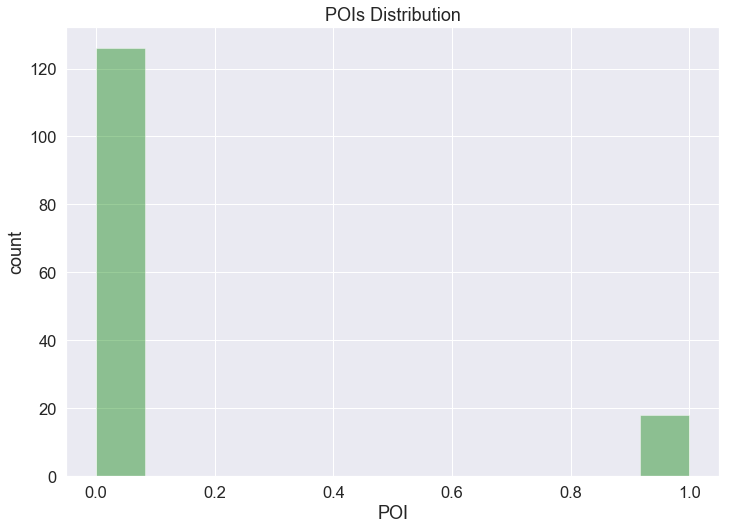

In [25]:
f, ax = plt.subplots()
#sns.set(style="white", context="talk")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
sns.distplot(df.poi, kde=False, color='green', ax=ax).set_title("POIs Distribution")
ax.set(ylabel="count", xlabel="POI")

It is clear that we have to deal with class imbalance, our dataset lacks of cases with POIs that have true value.

### main univariate ploting function
The following function is the main univariate plotting function

In [34]:
'''
A function to plot univariate statistics and the distribution of a feature
'''
def univariate_plot(feature, feature_str, num_of_bins=30, custom_vline_length=40):
    
    f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
    sns.set(style="white", context="talk")
    sns.set(style="ticks")
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set(font_scale=1.3)
    sns.distplot(df[feature], color="green", kde=False, ax=ax1)
    ax1.set(ylabel="count", xlabel=feature, title= "'" + feature_str + "' Univariate Plots")
    
    ax1.vlines(x=np.median(df[feature]), ymin=0, ymax=custom_vline_length, color="orange")
    ax1.vlines(x=float(stats.mode(df[feature], nan_policy='omit')[0]), ymin=0, ymax=custom_vline_length, color="purple")
    ax1.vlines(x=np.round(np.mean(df[feature]), 3), ymin=0, ymax=custom_vline_length, color="red")
    ax1.vlines(x=np.percentile(df[feature], 25), ymin=0, ymax=custom_vline_length, linestyles="dotted")
    ax1.vlines(x=np.percentile(df[feature], 75), ymin=0, ymax=custom_vline_length, linestyles="dotted")

    sns.boxplot(x=feature, data= df.dropna(subset=[feature]), ax=ax2)
    sns.swarmplot(x=feature, data= df.dropna(subset=[feature]), color=".35", ax=ax3)

    print("min:", np.min(df.salary))
    print("25th percentile:", np.percentile(df[feature], 25))
    print("median (orange color):", np.median(df.dropna(subset=[feature])[feature]))
    print("mode (purple color):", float(stats.mode(df[feature], nan_policy="omit")[0]))
    print("mean (red color):", np.round(np.mean(df[feature]), 3))
    print("std deviation: ", np.round(np.std(df[feature]), 3))
    print("75th percentile:", np.percentile(df[feature], 75))
    print("IQR range:", np.percentile(df[feature], 75) - np.percentile(df[feature], 25))
    print("max:", np.max(df[feature]))
    print("skewness:", stats.skew(df[feature]))
    print("kurtosis:", stats.kurtosis(df[feature]))
    
    
'''
A function to plot univariate statistics and the distribution of a feature which is log transformed
'''
def log_transformed_univariate_plot(feature, feature_str):
    f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
    sns.set(style="white", context="talk")
    sns.set(style="ticks")
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set(font_scale=1.3)
    sns.distplot(df.dropna(subset=[feature])[feature], color="green", kde=False, ax=ax1).set_title(feature_str + " distribution")
    ax1.set(ylabel="count")

    sns.boxplot(x=feature, data= df.dropna(subset=[feature]), ax=ax2).set_title(feature_str + " Boxplot")
    sns.swarmplot(x=feature, data= df.dropna(subset=[feature]), color=".35", ax=ax3)
    ax1.set(xscale="log")
    ax2.set(xscale="log")
    ax3.set(xscale="log")

### "Salary" Univariate Analysis

min: 0.0
25th percentile: 0.0
median (orange color): 210596.0
mode (purple color): 0.0
mean (red color): 185446.035
std deviation:  196356.758
75th percentile: 269667.5
IQR range: 269667.5
max: 1111258.0
skewness: 1.9578182807526139
kurtosis: 6.803735762137459


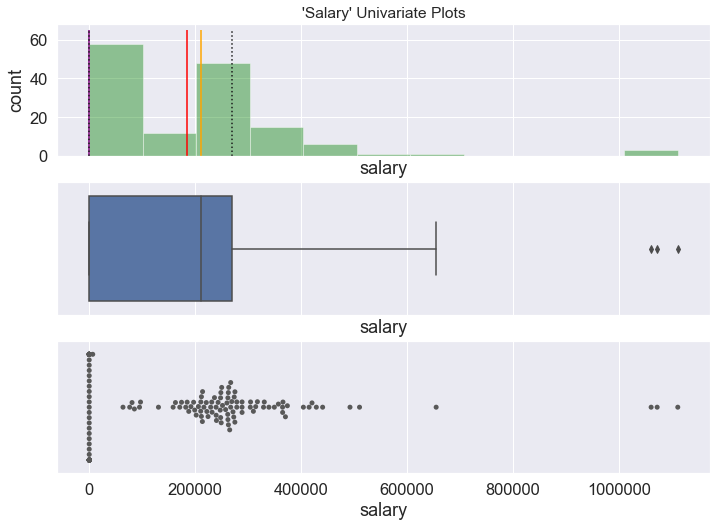

In [35]:
univariate_plot(feature = "salary", feature_str = "Salary", num_of_bins = 50, custom_vline_length = 65)

The "salary" feature distribution is very thin, it has a leptokurtic distribution and 3 outliers.

### "Bonus" Univariate Analysis

min: 0.0
25th percentile: 0.0
median (orange color): 300000.0
mode (purple color): 0.0
mean (red color): 675997.354
std deviation:  1228866.007
75th percentile: 800000.0
IQR range: 800000.0
max: 8000000.0
skewness: 3.535676848362964
kurtosis: 14.644319451706874


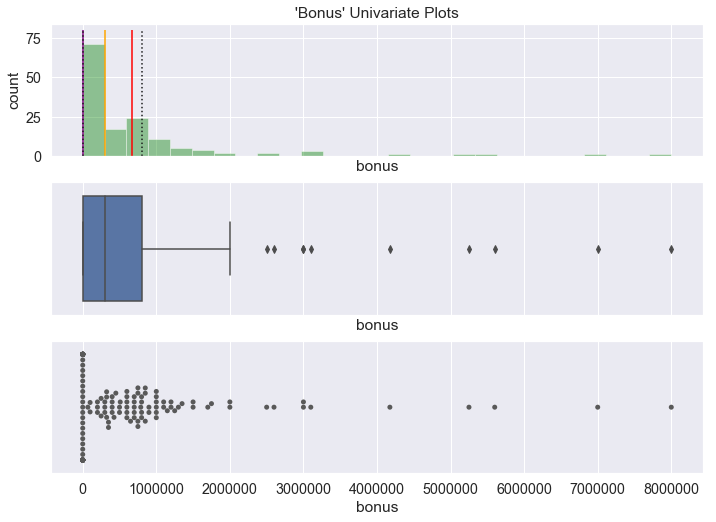

In [36]:
univariate_plot("bonus", "Bonus", 30, 80)

The "Bonus" feature has a right-skewed distribution (skewness>3) and is very leptokurtic (kurtosis=14). Moreover it exhibits many outliers based on the boxplot.

### "Long Term Incentive" Univariate Analysis

min: 0.0
25th percentile: 0.0
median (orange color): 0.0
mode (purple color): 0.0
mean (red color): 336957.833
std deviation:  684792.36
75th percentile: 374586.25
IQR range: 374586.25
max: 5145434.0
skewness: 3.798350939082335
kurtosis: 19.028940986871298


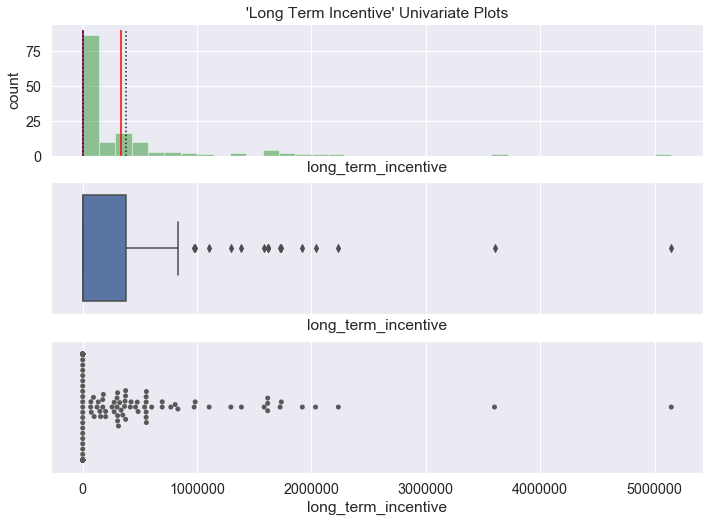

In [37]:
univariate_plot("long_term_incentive", "Long Term Incentive", 30, 90)

The "Long Term Incentive" feature has a right-skewed distribution (skewness>3) and is very leptokurtic (kurtosis=19). Moreover it exhibits many outliers based on the boxplot.

### "Deferred Income" Univariate Analysis

min: 0.0
25th percentile: -37086.0
median (orange color): 0.0
mode (purple color): 0.0
mean (red color): -193683.271
std deviation:  603903.264
75th percentile: 0.0
IQR range: 37086.0
max: 0.0
skewness: -4.163331190248866
kurtosis: 17.430160312891694


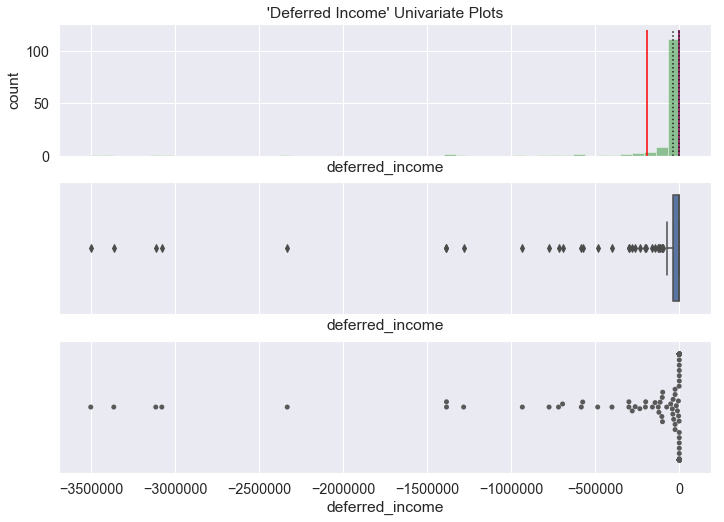

In [38]:
univariate_plot("deferred_income", "Deferred Income", 30, 120)

The "Long Term Incentive" feature has a left-skewed distribution (skewness<0) and is very leptokurtic (kurtosis=17). Moreover it exhibits many outliers based on the boxplot.

### "Deferral Payments" Univariate Analysis

min: 0.0
25th percentile: 0.0
median (orange color): 0.0
mode (purple color): 0.0
mean (red color): 222089.556
std deviation:  751478.334
75th percentile: 8535.5
IQR range: 8535.5
max: 6426990.0
skewness: 5.289578486105972
kurtosis: 33.9602268561005


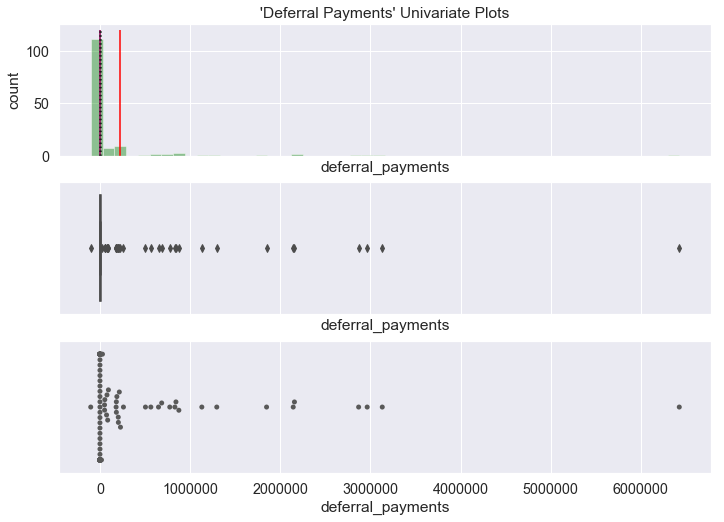

In [39]:
univariate_plot("deferral_payments", "Deferral Payments", 30, 120)

The "Deferral Payments" feature has a right-skewed distribution (skewness>3) and is very leptokurtic (kurtosis=33). Moreover it presents many outliers based on the boxplot.

### "Loan Advances" Univariate Analysis

min: 0.0
25th percentile: 0.0
median (orange color): 0.0
mode (purple color): 0.0
mean (red color): 582812.5
std deviation:  6770838.762
75th percentile: 0.0
IQR range: 0.0
max: 81525000.0
skewness: 11.863541948619694
kurtosis: 138.8298275954657


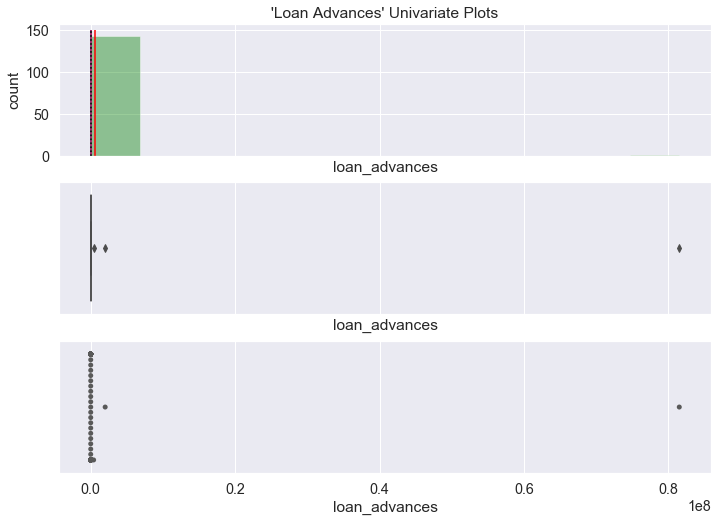

In [40]:
univariate_plot("loan_advances", "Loan Advances", 10, 150)

The "Loan Advances"  feature is a very small distribution, however due to its outliers, it has a right-skewed distribution (skewness>3) and is very leptokurtic (kurtosis=138).

### "Other" Univariate Analysis

min: 0.0
25th percentile: 0.0
median (orange color): 919.0
mode (purple color): 0.0
mean (red color): 294745.535
std deviation:  1127390.396
75th percentile: 148577.0
IQR range: 148577.0
max: 10359729.0
skewness: 6.890830618069155
kurtosis: 52.62996722261362


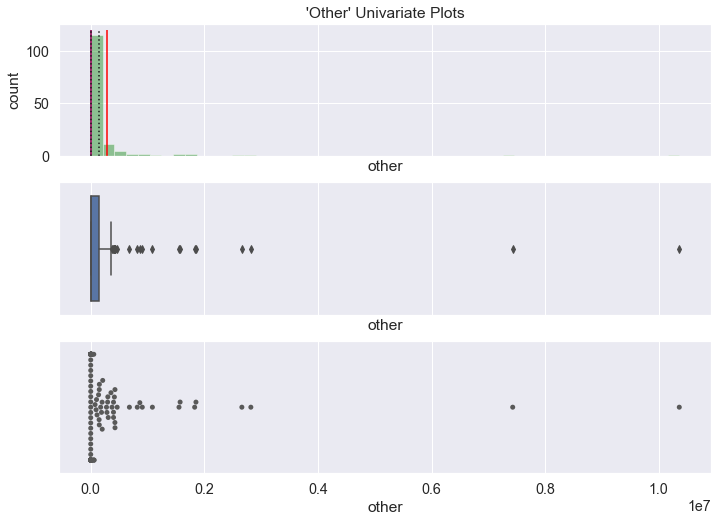

In [41]:
univariate_plot("other", "Other", 30, 120)

The "Other" financial feature has a right-skewed distribution (skewness=6) and is very leptokurtic (kurtosis=52). Moreover it presents many outliers based on the boxplot.

### "Expenses" Univariate Analysis

min: 0.0
25th percentile: 0.0
median (orange color): 20182.0
mode (purple color): 0.0
mean (red color): 35375.34
std deviation:  45151.705
75th percentile: 53328.25
IQR range: 53328.25
max: 228763.0
skewness: 1.7622764932234205
kurtosis: 3.7173357797387494


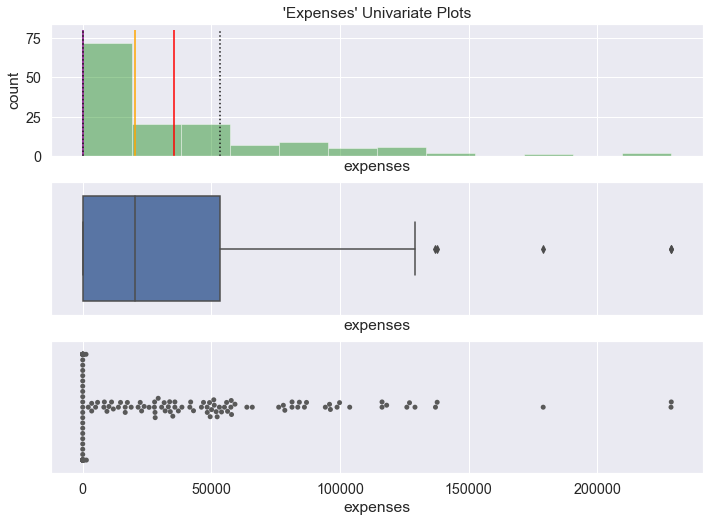

In [42]:
univariate_plot("expenses", "Expenses", 30, 80)

The "Expenses" financial feature has a right-skewed distribution (skewness=1.7) and is leptokurtic (kurtosis=3.7). Moreover it presents many outliers based on the boxplot. Furthermore, it has 4 outliers.

### "Director Fees" Univariate Analysis

min: 0.0
25th percentile: 0.0
median (orange color): 0.0
mode (purple color): 0.0
mean (red color): 9980.319
std deviation:  31191.703
75th percentile: 0.0
IQR range: 0.0
max: 137864.0
skewness: 2.977058859705668
kurtosis: 7.1502624568828725


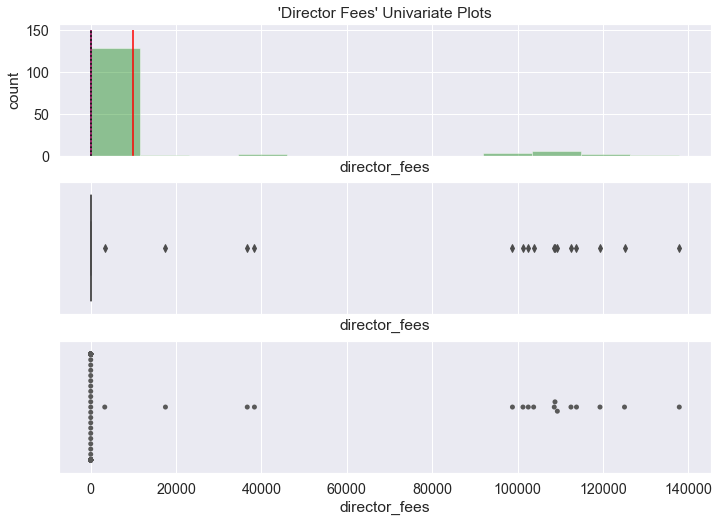

In [43]:
univariate_plot("director_fees", "Director Fees", 30, 150)

The "Director Fees" financial feature has a right-skewed distribution (skewness=2.9) and is very leptokurtic (kurtosis=7.15). In addition it presents many outliers based on the boxplot.

### "Total Payments" Univariate Analysis

min: 0.0
25th percentile: 90192.75
median (orange color): 941359.5
mode (purple color): 0.0
mean (red color): 2256542.569
std deviation:  8816415.863
75th percentile: 1945668.25
IQR range: 1855475.5
max: 103559793.0
skewness: 10.59780210163233
kurtosis: 118.1531631806944


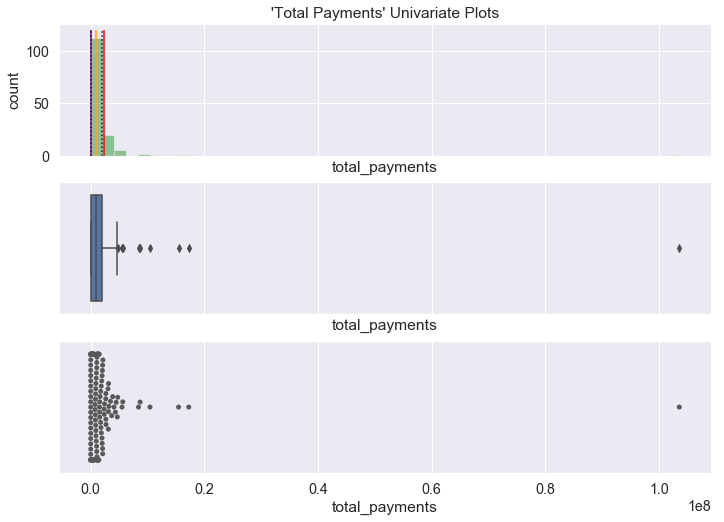

In [44]:
univariate_plot("total_payments", "Total Payments", 30, 120)

The "Total Payments" financial  feature is a compact / stacked distribution, it has a right-skewed distribution (skewness=10) and is very leptokurtic (kurtosis=118). In addition it presents some outliers based on the boxplot.

### "Exercised Stock Options" Univariate Analysis

min: 0.0
25th percentile: 0.0
median (orange color): 608293.5
mode (purple color): 0.0
mean (red color): 2075801.979
std deviation:  4778833.049
75th percentile: 1683580.25
IQR range: 1683580.25
max: 34348384.0
skewness: 4.5449693017160335
kurtosis: 23.524423472770046


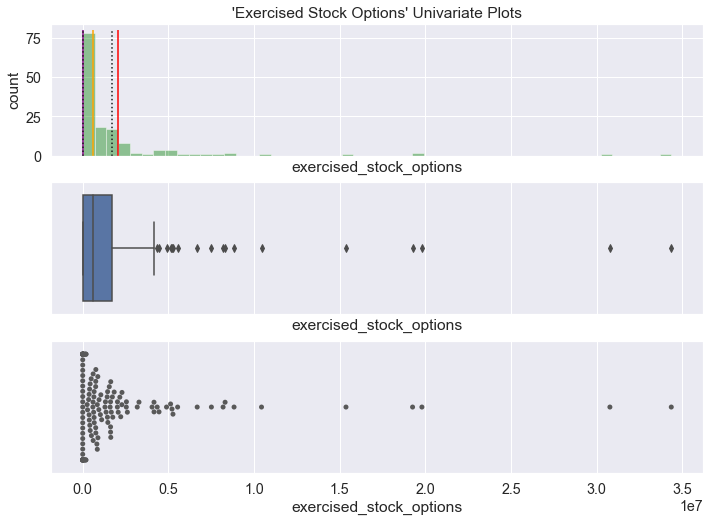

In [45]:
univariate_plot("exercised_stock_options", "Exercised Stock Options", 30, 80)

The "Exercised Stock Options" financial feature has a right-skewed distribution (skewness=4.5) and is very leptokurtic (kurtosis=23.5). In addition it presents many outliers based on the boxplot.

### "Restricted Stock" Univariate Analysis

min: 0.0
25th percentile: 24345.0
median (orange color): 360528.0
mode (purple color): 0.0
mean (red color): 868536.292
std deviation:  2009558.203
75th percentile: 737456.0
IQR range: 713111.0
max: 14761694.0
skewness: 4.799111356519195
kurtosis: 27.179086006318965


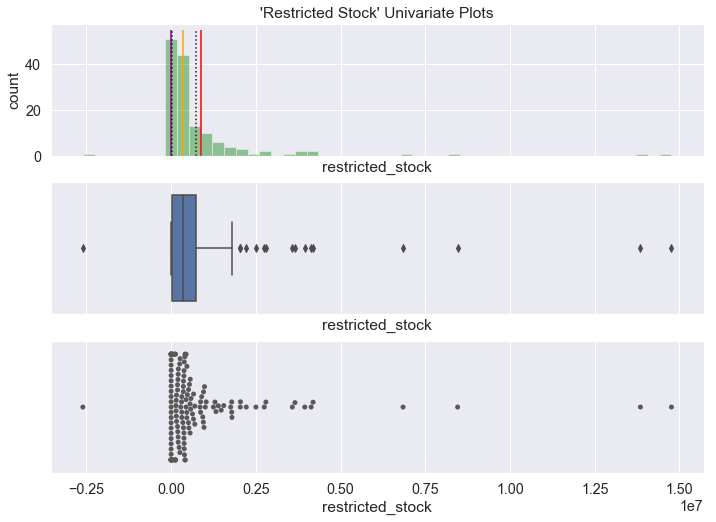

In [46]:
univariate_plot("restricted_stock", "Restricted Stock", 20, 55)

The "Restricted Stock" financial feature has a right-skewed distribution (skewness=4.79) and is very leptokurtic (kurtosis=23.5). In addition it presents many outliers based on the boxplot.

### "Restricted Stock Deferred" Univariate Analysis

min: 0.0
25th percentile: 0.0
median (orange color): 0.0
mode (purple color): 0.0
mean (red color): 73417.903
std deviation:  1297454.739
75th percentile: 0.0
IQR range: 0.0
max: 15456290.0
skewness: 11.550684289228244
kurtosis: 134.25062690773467


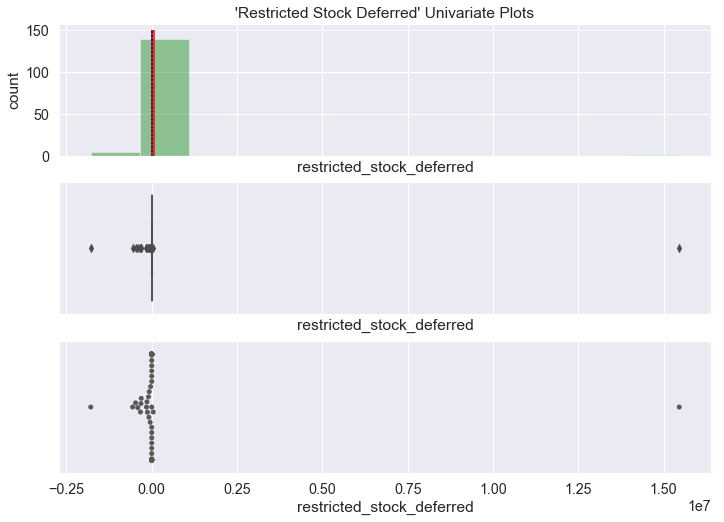

In [47]:
univariate_plot("restricted_stock_deferred", "Restricted Stock Deferred", 20, 150)

The "Restricted Stock Deferred" financial feature has a right-skewed distribution (skewness=11.75) and is very leptokurtic (kurtosis=134). In addition it presents 2 outliers based on the boxplot.

### "Total Stock Value" Univariate Analysis

min: 0.0
25th percentile: 244326.5
median (orange color): 965955.0
mode (purple color): 0.0
mean (red color): 2909785.611
std deviation:  6167490.99
75th percentile: 2295175.75
IQR range: 2050849.25
max: 49110078.0
skewness: 4.545034662325401
kurtosis: 25.057841387262847


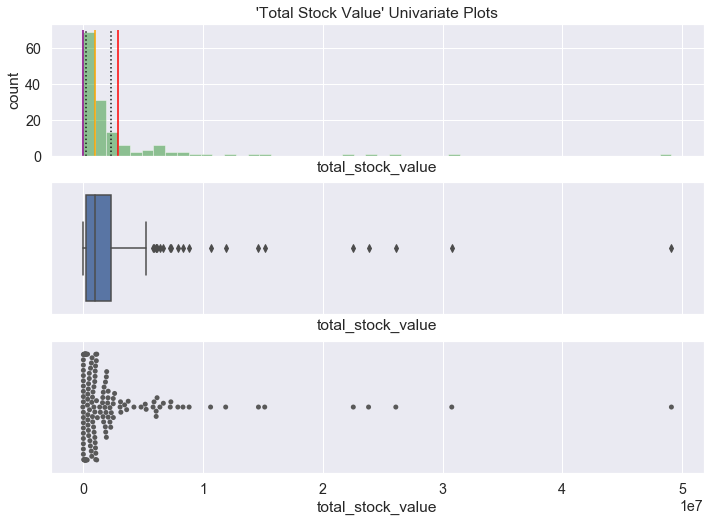

In [48]:
univariate_plot("total_stock_value", "Total Stock Value", 10, 70)

The "Total Stock Value" financial feature has a right-skewed distribution (skewness=11.75) and is very leptokurtic (kurtosis=134). In addition it presents 2 outliers based on the boxplot.

### "From Poi To This Person" Univariate Analysis

min: 0.0
25th percentile: 25.0
median (orange color): 26.5
mode (purple color): 26.5
mean (red color): 50.417
std deviation:  69.348
75th percentile: 48.25
IQR range: 23.25
max: 528.0
skewness: 3.4964006910691845
kurtosis: 16.2301160508312


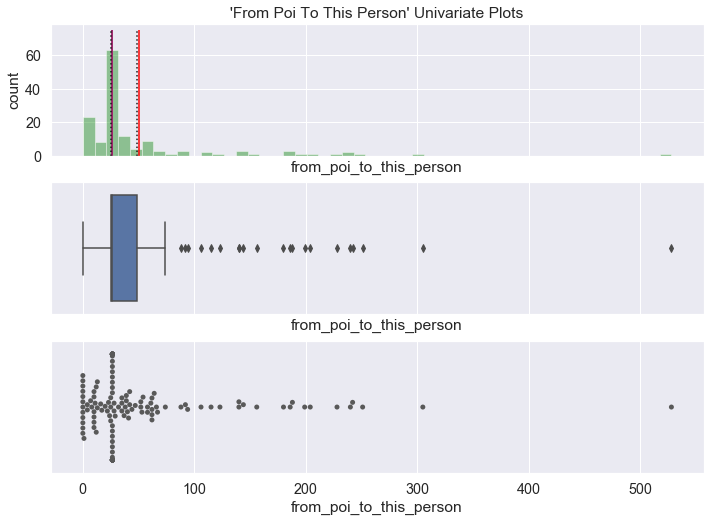

In [49]:
univariate_plot("from_poi_to_this_person", "From Poi To This Person", 35, 75)

The "From Poi To This Person" email feature has a right-skewed distribution (skewness=3.49) and is very leptokurtic (kurtosis=16.23). Moreover it presents many outliers based on the boxplot.

### "From Messages" Univariate Analysis

min: 0.0
25th percentile: 35.5
median (orange color): 41.0
mode (purple color): 41.0
mean (red color): 380.194
std deviation:  1441.588
75th percentile: 53.0
IQR range: 17.5
max: 14368.0
skewness: 7.239550512619833
kurtosis: 61.868920709301406


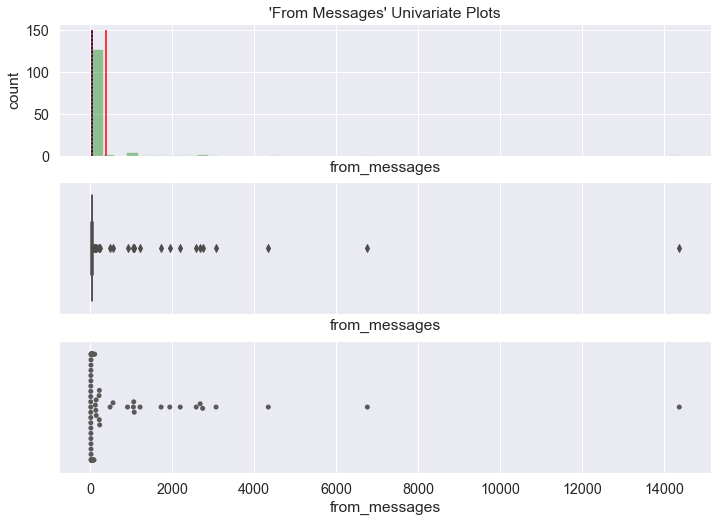

In [50]:
univariate_plot("from_messages", "From Messages", 25, 150)

The "From Messages" email feature has a right-skewed distribution (skewness=7.23) and is very leptokurtic (kurtosis=61.86). Moreover it presents many outliers based on the boxplot.

### "From This Person to Poi" Univariate Analysis

min: 0.0
25th percentile: 5.75
median (orange color): 6.0
mode (purple color): 6.0
mean (red color): 27.306
std deviation:  78.749
75th percentile: 15.0
IQR range: 9.25
max: 609.0
skewness: 5.089454488400156
kurtosis: 27.9733554872601


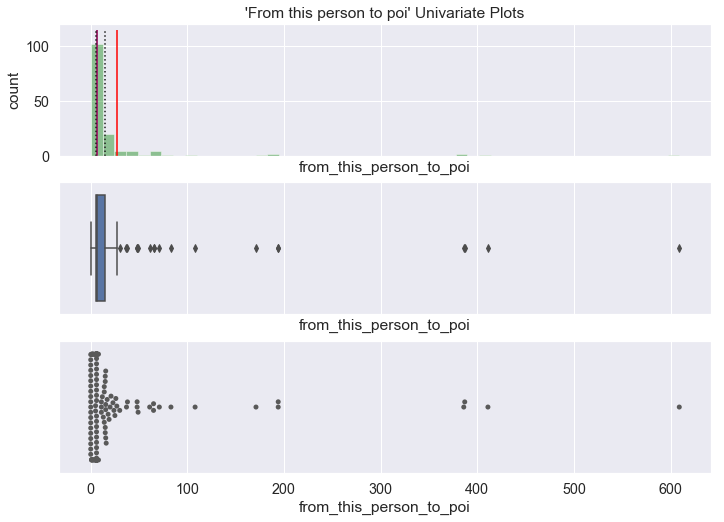

In [51]:
univariate_plot("from_this_person_to_poi", "From this person to poi", 35, 115)

The "From this person to poi" email feature has a right-skewed distribution (skewness=5.089) and is very leptokurtic (kurtosis=27). Moreover it presents many outliers based on the boxplot.

### "To Messages" Univariate Analysis

min: 0.0
25th percentile: 902.5
median (orange color): 944.0
mode (purple color): 944.0
mean (red color): 1644.639
std deviation:  2057.412
75th percentile: 1783.0
IQR range: 880.5
max: 15149.0
skewness: 3.861538366932029
kurtosis: 18.242710220749405


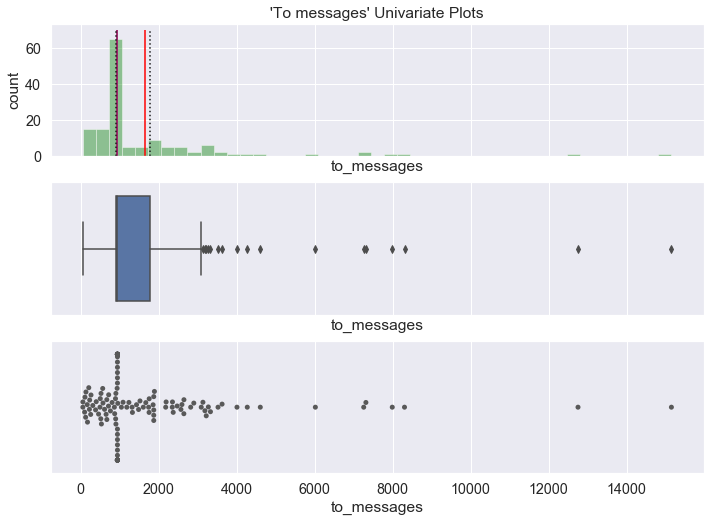

In [52]:
univariate_plot("to_messages", "To messages", 40, 70)

The "To messages" email feature has a right-skewed distribution (skewness=3.8) and is very leptokurtic (kurtosis=18.26). Moreover it presents many outliers based on the boxplot.

### "Shared Receipt With Poi" Univariate Analysis

min: 0.0
25th percentile: 587.5
median (orange color): 594.0
mode (purple color): 594.0
mean (red color): 969.5
std deviation:  953.246
75th percentile: 1163.5
IQR range: 576.0
max: 5521.0
skewness: 2.077705796457169
kurtosis: 4.887622639184267


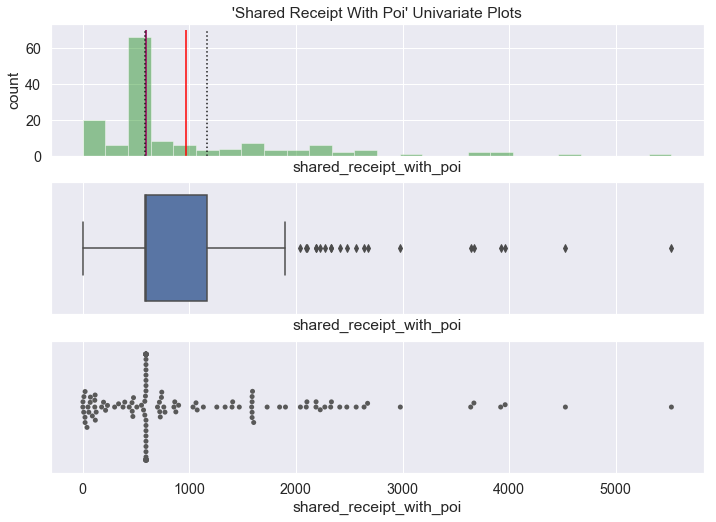

In [53]:
univariate_plot("shared_receipt_with_poi", "Shared Receipt With Poi", 40, 70)

The "Shared Receipt With Poi" email feature has a right-skewed distribution (skewness=2.07) and is leptokurtic (kurtosis=4.08). Moreover it exhibits many outliers based on the boxplot.

#### Univariate Analysis Overview
Overall, all distributions for all the features shows a right-skewed distribution and have a leptokurtic form.

# Bivariate Data Analysis
In this chapter we will investigate the relantionshio between 2 features.

## Correlation Between Features
Lets investigate the correlation between features in order to find patterns between their relentionship. I use spearman and not pearson correlation coefficient, because I want to evaluate the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data. However, the Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable. Due to fact that we can build machine learning models that are work with non linear relationships between data, I will use spearman correlation coefficient to visualize the monotonic relationship between 2 features.

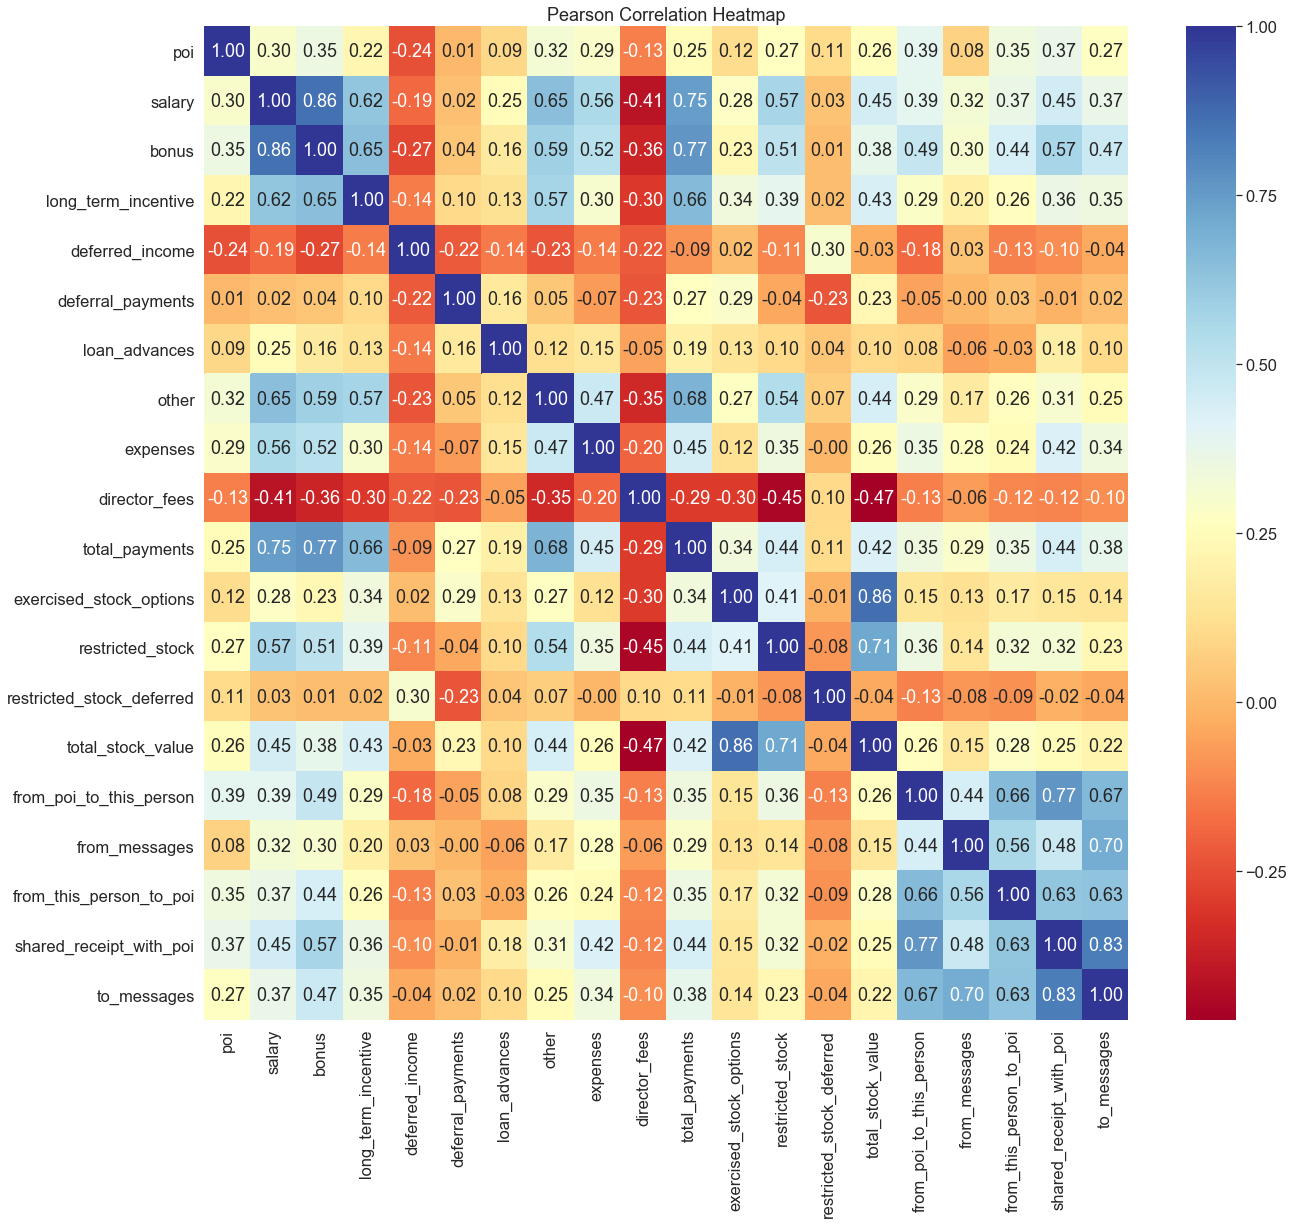

In [54]:
''' list of features that will be used for correlation:
Salary
Bonus
Long Term Incentive
Deferred Income
Deferral Payments
Loan Advances
Other 
Expenses
Director Fees
Total Payments
Exercised Stock Options
Restricted Stock
Restricted Stock Deferred 
Total Stock Value
from_poi_to_this_person       
from_messages                 
from_this_person_to_poi       
shared_receipt_with_poi       
to_messages
'''

sns.set(rc={'figure.figsize':(20.7,18.27)})
sns.set(font_scale=1.5)

sns.heatmap(df[["poi", "salary", "bonus", "long_term_incentive", "deferred_income", "deferral_payments", "loan_advances", "other", "expenses", "director_fees",
               "total_payments", "exercised_stock_options", "restricted_stock", "restricted_stock_deferred", "total_stock_value",
               "from_poi_to_this_person", "from_messages", "from_this_person_to_poi", "shared_receipt_with_poi", "to_messages"]].corr(method="spearman"), 
            cmap="RdYlBu", annot=True, fmt=".2f").set_title("Pearson Correlation Heatmap")

plt.show()
#sns.set(font_scale=1)

The above corellation heatmap was design to identify if there are any strong monotonic relationships between the features of the dataset. If the values are high, then probably we can choose to keep one of those variables in the model building process. Seems like some of features have spearman correlation more than 0.7 with each other. The above plots helped us in identifying the important individual variables which are correlated with target. However we generally build many non-linear models via sklearn. So let us build some non-linear models and get variable importance from them.

#### Top 10 positive and negative (spearman) correlations:

In [55]:
### head and tails of the top positive and negative correlation between features

corrs = df[["poi", "salary", "bonus", "long_term_incentive", "deferred_income", "deferral_payments", "loan_advances", "other", "expenses", "director_fees",
               "total_payments", "exercised_stock_options", "restricted_stock", "restricted_stock_deferred", "total_stock_value",
               "from_poi_to_this_person", "from_messages", "from_this_person_to_poi", "shared_receipt_with_poi", "to_messages"]].corr(method="spearman").unstack().sort_values().drop_duplicates()

print(corrs.tail(11))
print(corrs.head(10))

to_messages              from_poi_to_this_person    0.667018
other                    total_payments             0.682944
from_messages            to_messages                0.702561
total_stock_value        restricted_stock           0.714508
total_payments           salary                     0.745446
bonus                    total_payments             0.768776
shared_receipt_with_poi  from_poi_to_this_person    0.770004
to_messages              shared_receipt_with_poi    0.830822
bonus                    salary                     0.859786
exercised_stock_options  total_stock_value          0.864880
poi                      poi                        1.000000
dtype: float64
director_fees            total_stock_value   -0.469437
                         restricted_stock    -0.448408
                         salary              -0.407451
                         bonus               -0.359092
other                    director_fees       -0.348042
long_term_incentive      director_fees 

#### The main bivariate function to plot either the boxplot or regplot relationship between 2 features

In [56]:
'''
The main bivariate function to plot either the boxplot or regplot relationship between 2 features
'''
def bivariate_plot(feature1, feature2, type_of_plot, feature1_str, feature2_str):
    
    sns.set(rc={'figure.figsize':(11.7, 9.27)})
    sns.set(font_scale=1.4)
    f, ax = plt.subplots()
    
    
    if type_of_plot is "regplot":
        sns.regplot(x=feature1, y=feature2, data=df, ax=ax).set_title(feature1_str + " vs " +  feature2_str + " Scatterplot")
    elif type_of_plot is "boxplot":    
        sns.boxplot(y=feature1, x=feature2, data=df, orient="h", ax=ax).set_title(feature1_str + " vs " +  feature2_str + " Boxplot")
        sns.swarmplot(y=feature1, x=feature2, data=df, color=".35", orient="h", ax=ax)
    else:
        print("please specify the type_of_plot parameter either regplot or boxplot")
    
    f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)


## Bivariate Analysis between POI and with highly correlated features

### "POI" vs "Salary" Boxplot

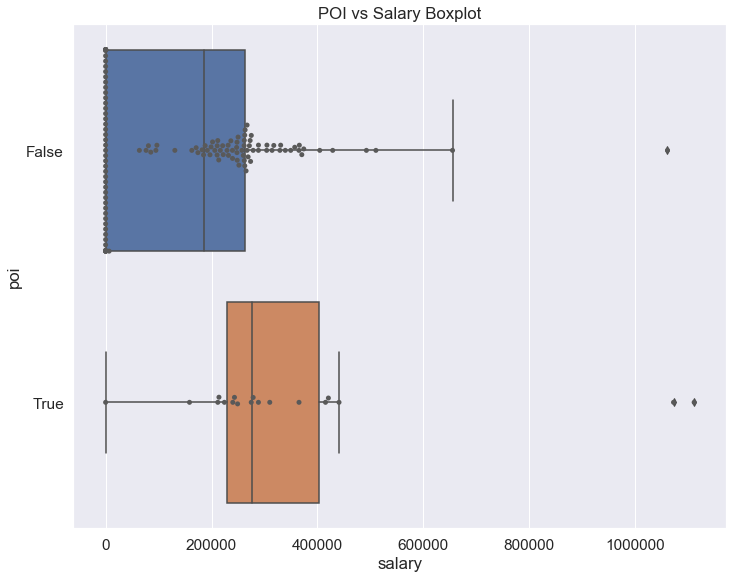

In [57]:
bivariate_plot("poi", "salary", "boxplot", "POI", "Salary")

Based on the plot above, the non-poi people have lower salaries than those who are POI.

### "POI" vs "Bonus" Boxplot

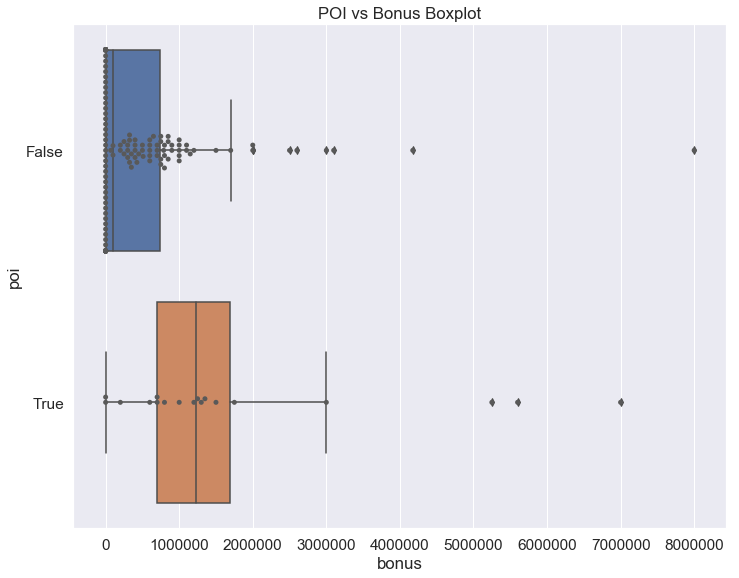

In [58]:
bivariate_plot("poi", "bonus", "boxplot", "POI", "Bonus")

Same as the salaries, and the Bonus feature, the employees who are POIs have higher bonuses than those who are not.

### "POI" VS "Total Stock Value", Boxplot

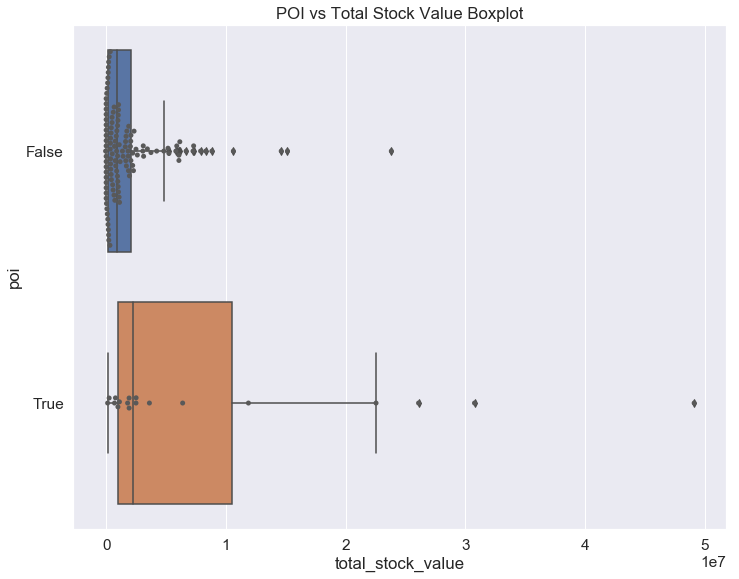

In [59]:
bivariate_plot("poi", "total_stock_value", "boxplot", "POI", "Total Stock Value")

Same as before those who are POIs have larger Total Stock Value than those who are not.

### "POI" - "Exercised Stock Options" boxplot

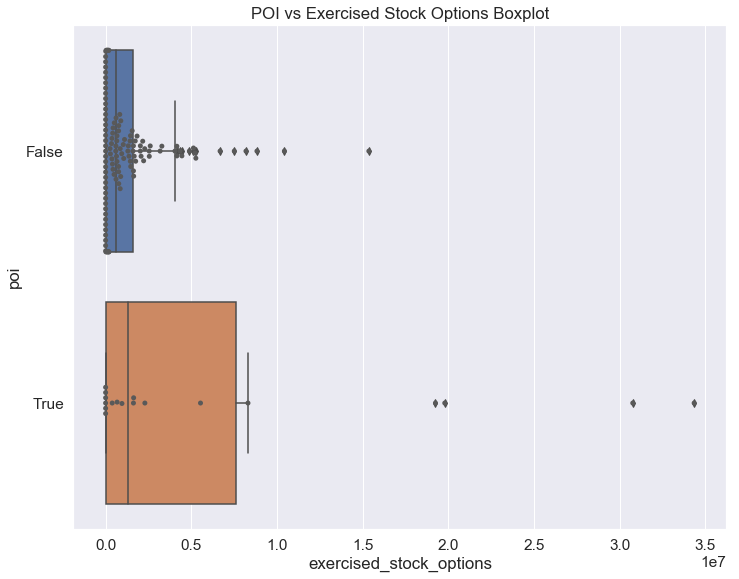

In [60]:
bivariate_plot("poi", "exercised_stock_options", "boxplot", "POI", "Exercised Stock Options")

Again, those who are POIs have larger Exercised Stock Option than those who are not.

### "POI" - "Shared Receipt with Poi", boxplot

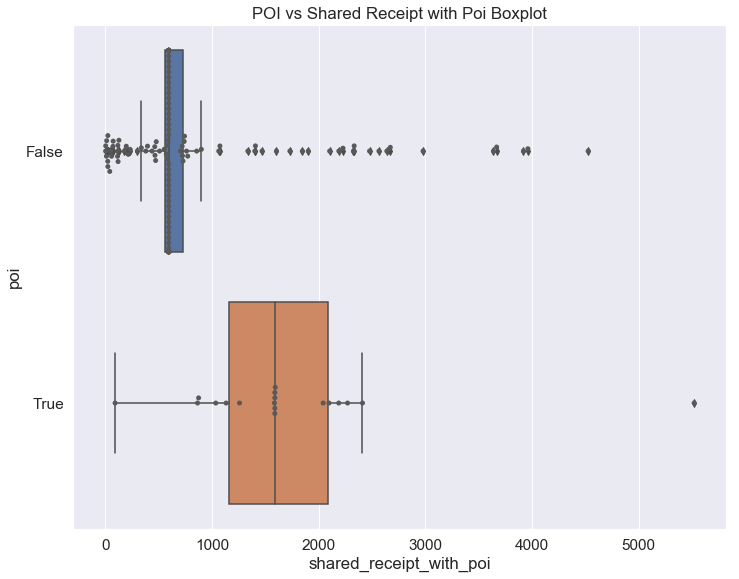

In [61]:
bivariate_plot("poi", "shared_receipt_with_poi", "boxplot", "POI", "Shared Receipt with Poi")

Same as before those who are POIs (POI=true) have wider shared receipt with poi than those who are not.

### "POI" VS "Deferred Income" Boxplot

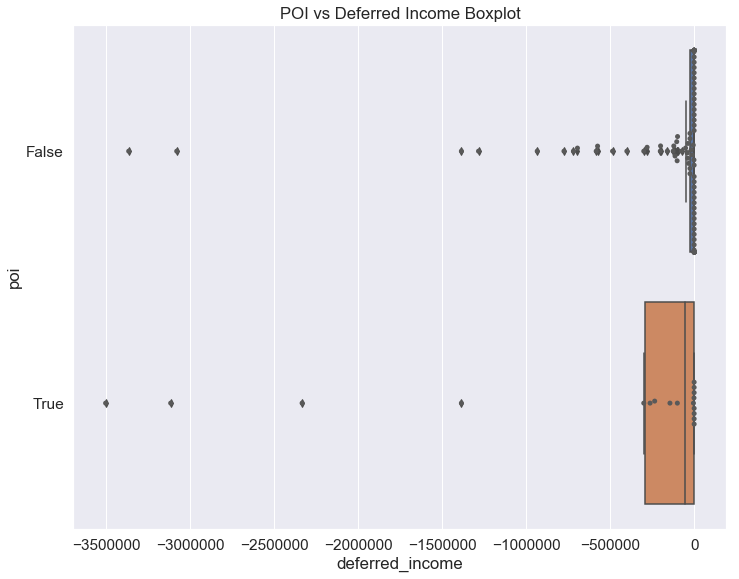

In [62]:
bivariate_plot("poi", "deferred_income", "boxplot", "POI", "Deferred Income")

The boxplots distributions between Deferred Income and POIs show a exhibit different distribution in respect of POIs, in fact those who are POIs have a wider distribution than those who are not. However both distributions shows lots of outliers. We can say that there is a difference in deferred Income for those who are POIs and those who are not.

## Bivariate Plots with highly correlated features

### "Exercised Stock Options" VS "Total Stock Value" Scatterplot (0.864880 spearman correlation)

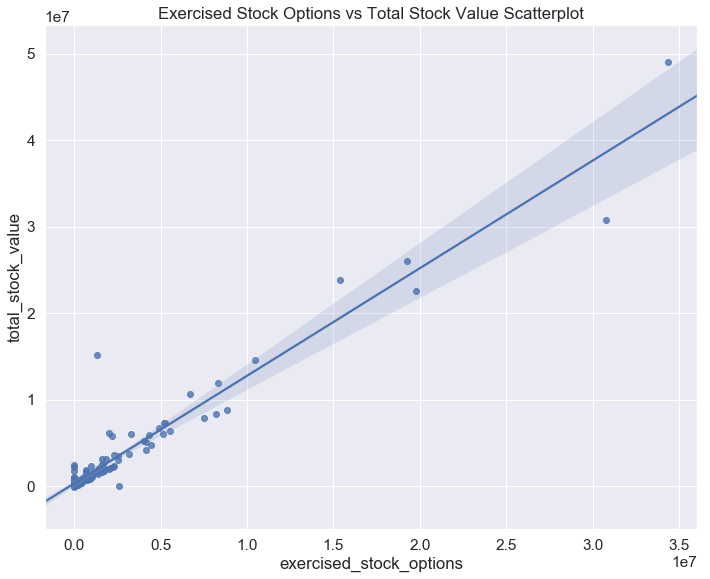

In [232]:
bivariate_plot("exercised_stock_options", "total_stock_value", "regplot", "Exercised Stock Options", "Total Stock Value")

Both features show a positive correlation between them.

### "Bonus" VS "Salary" Scatterplot (0.859786 spearman correlation)

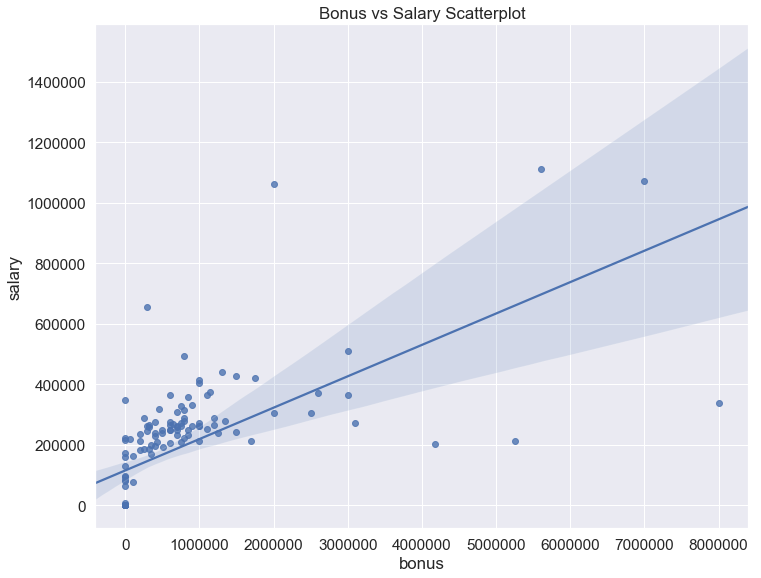

In [233]:
bivariate_plot("bonus", "salary", "regplot", "Bonus", "Salary")

Same as before, both features show a positive correlation between them.

### "To Messages" VS "Shared Receipt with POI" Scatterplot (0.830822 spearman correlation)

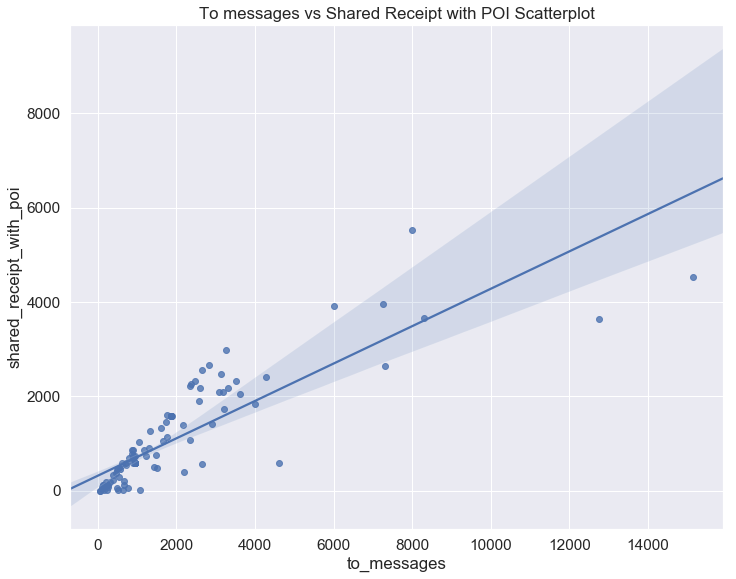

In [234]:
bivariate_plot("to_messages", "shared_receipt_with_poi", "regplot", "To messages", "Shared Receipt with POI")

Same as before, both features show a positive correlation between them.

### "Shared receipt with POI" VS "From POI to this Person" Scatterplot (0.770004 spearman correlation)

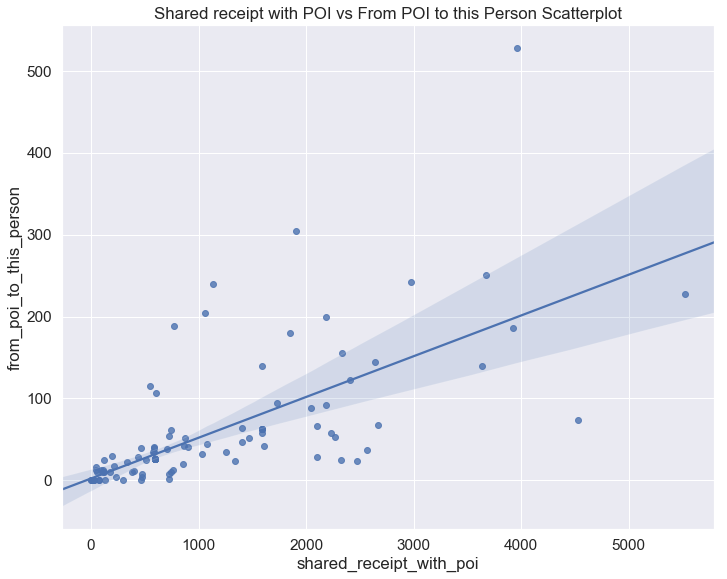

In [235]:
bivariate_plot("shared_receipt_with_poi", "from_poi_to_this_person", "regplot", "Shared receipt with POI", "From POI to this Person")

Likewise, both features show a positive correlation between them.

### "Bonus" VS "Total Payments" Scatterplot (0.768776 spearman correlation)

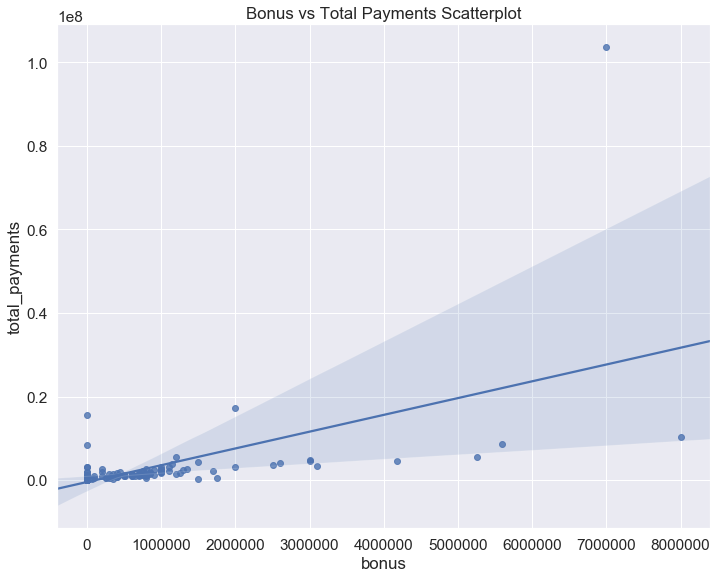

In [236]:
bivariate_plot("bonus", "total_payments", "regplot", "Bonus", "Total Payments")

Again, both features show a positive correlation between them.

### "Total Payments" VS "Salary" Scatterplot (0.745446 spearman correlation)

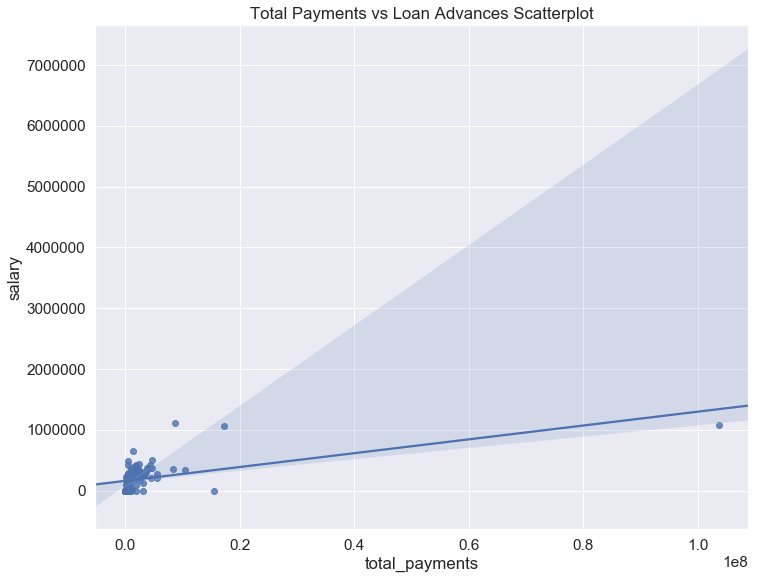

In [237]:
bivariate_plot("total_payments", "salary", "regplot", "Total Payments", "Loan Advances")

Same as before, both features show a positive correlation between them.

### "From Messages" VS "To messages" Scatterplot (0.702561 spearman correlation)

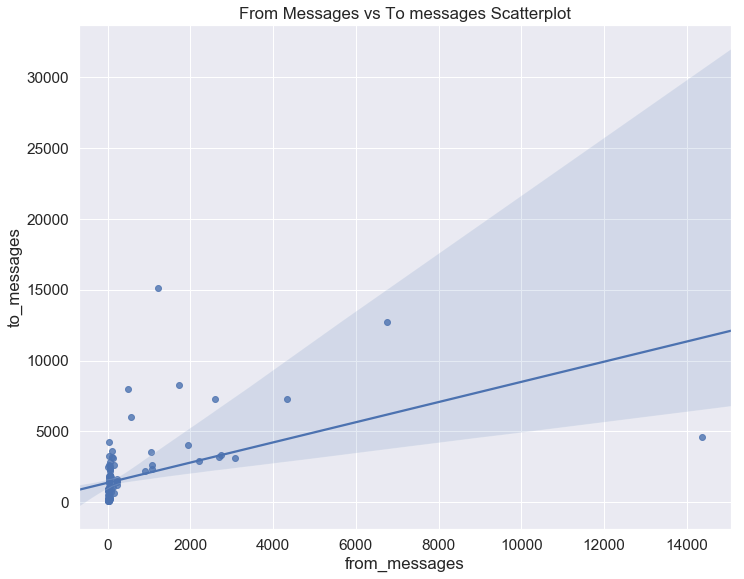

In [238]:
bivariate_plot("from_messages", "to_messages", "regplot", "From Messages", "To messages")

Likewise, both features show a positive correlation between them.

### "Other" VS "Total Payments" Scatterplot (0.682944 spearman correlation)

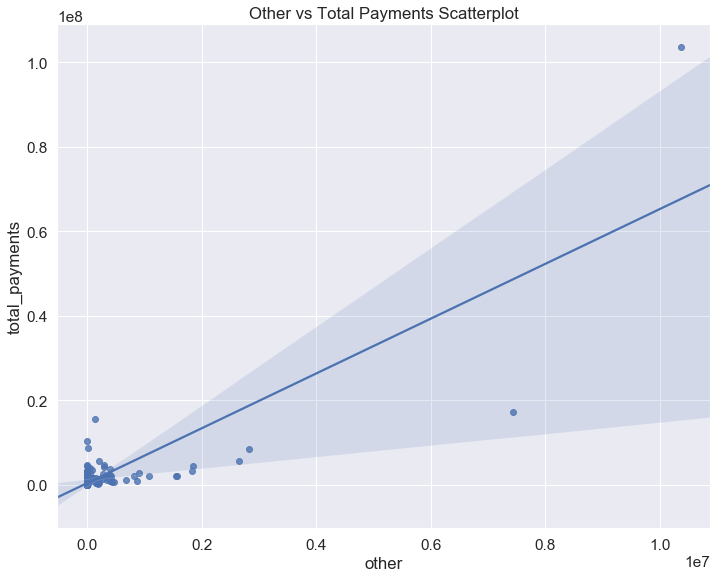

In [239]:
bivariate_plot("other", "total_payments", "regplot", "Other", "Total Payments")

Same as before, both features show a positive correlation between them.

### "To Messages" VS "From Poi To This Person" Scatterplot (0.667018 spearman correlation)

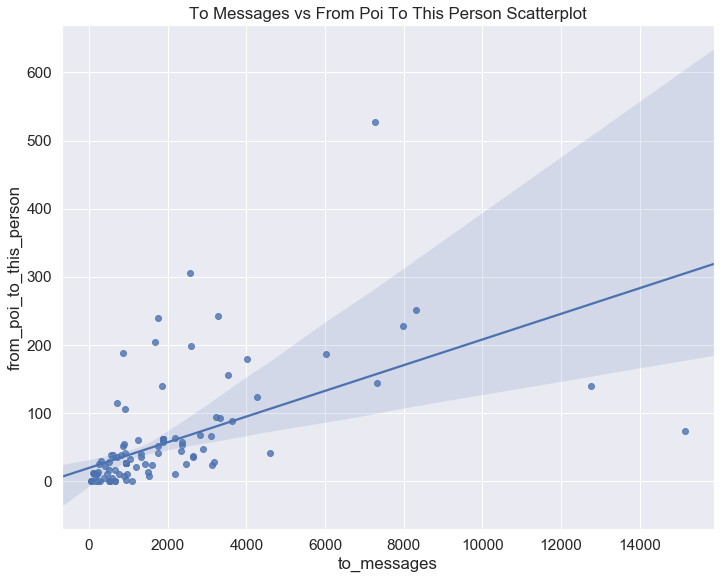

In [240]:
bivariate_plot("to_messages", "from_poi_to_this_person", "regplot", "To Messages", "From Poi To This Person")

Again, both features show a positive correlation between them.

### "Director Fees" VS "Total Stock Value" Scatterplot (-0.469437 spearman correlation)

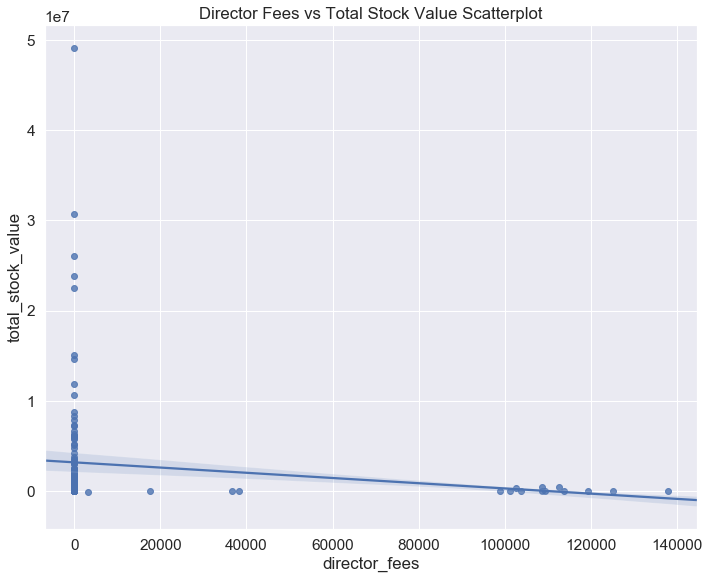

In [241]:
bivariate_plot("director_fees", "total_stock_value", "regplot", "Director Fees", "Total Stock Value")

Lets turn to the negative correlations, both features show a negative correlation between them.

### "Director Fees" VS "Restricted Stock" Scatterplot (-0.448408 spearman correlation)

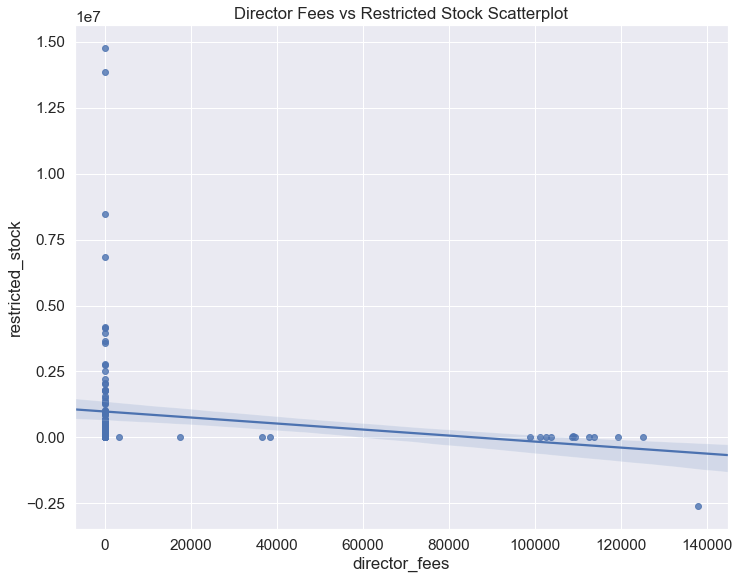

In [242]:
bivariate_plot("director_fees", "restricted_stock", "regplot", "Director Fees", "Restricted Stock")

Again, both features show a negative correlation between them.

### "Director Fees" VS "Salary" Scatterplot (-0.407451 spearman correlation)

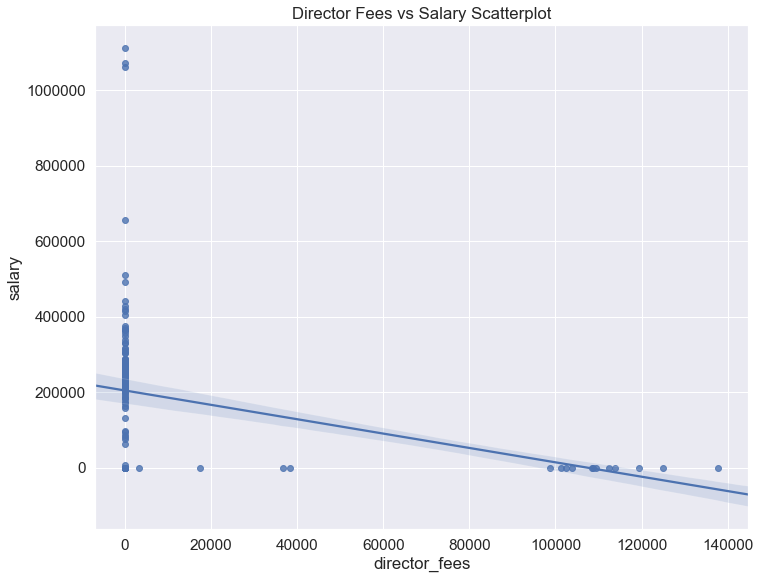

In [243]:
bivariate_plot("director_fees", "salary", "regplot", "Director Fees", "Salary")

Again, both features show a negative correlation between them.

### "Director Fees" VS "Bonus" Scatterplot (-0.359092 spearman correlation)

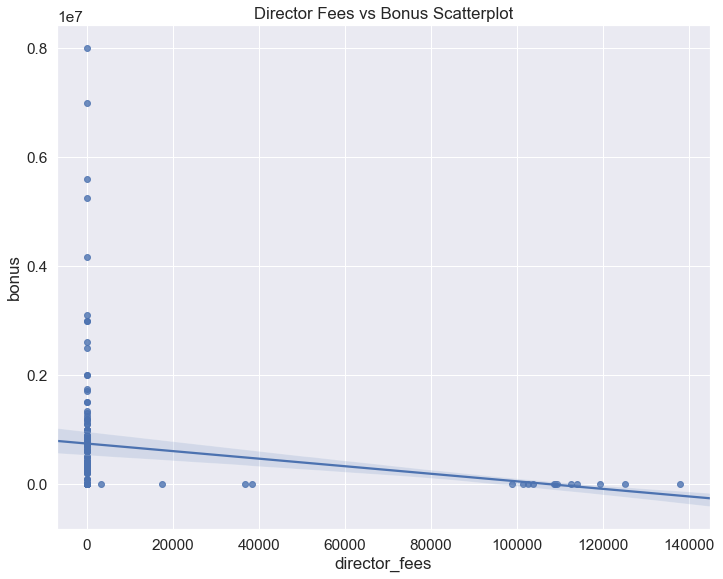

In [244]:
bivariate_plot("director_fees", "bonus", "regplot", "Director Fees", "Bonus")

Same as before, both features show a negative correlation between them.

### "Other" VS "Director Fees" Scatterplot (-0.348042 spearman correlation)

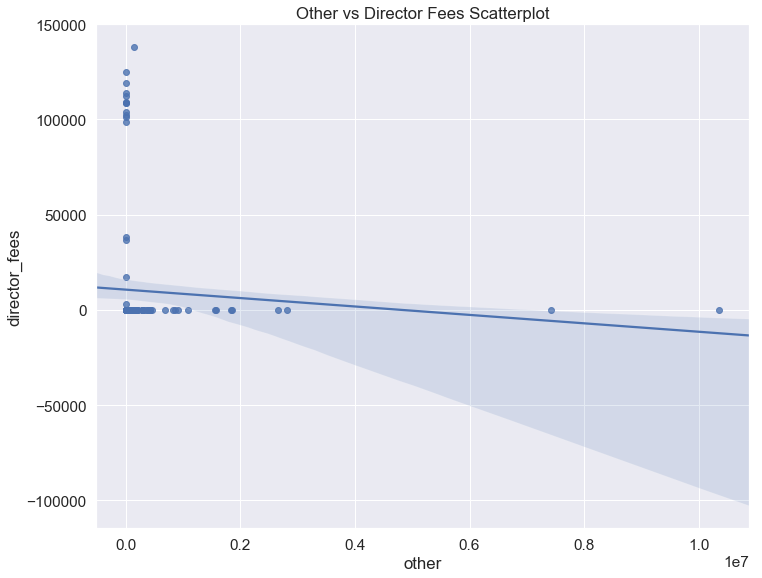

In [245]:
bivariate_plot("other", "director_fees", "regplot", "Other", "Director Fees")

Likewise, both features show a negative correlation between them.

### "Long Term Incentive" VS "Director Fees" Scatterplot (-0.301838 spearman correlation)

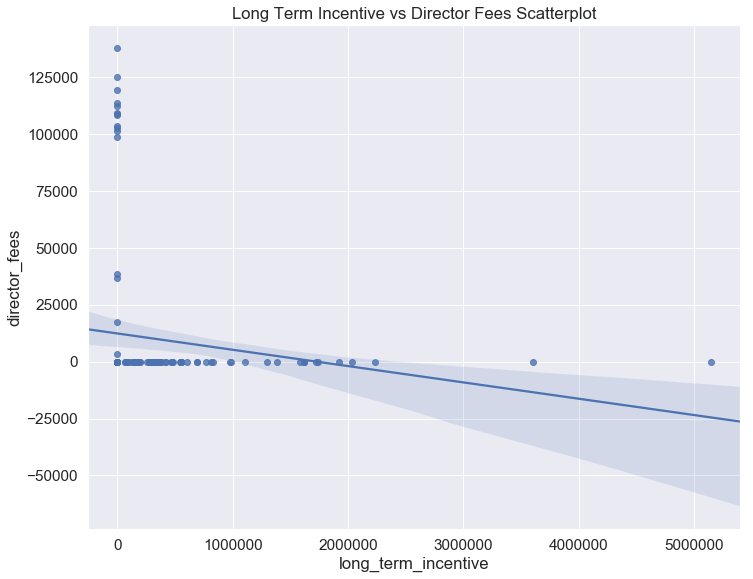

In [246]:
bivariate_plot("long_term_incentive", "director_fees", "regplot", "Long Term Incentive", "Director Fees")

Again, both features show a negative correlation between them.

### "Exercised Stock Options" VS "Director Fees" Scatterplot (-0.296084 spearman correlation)

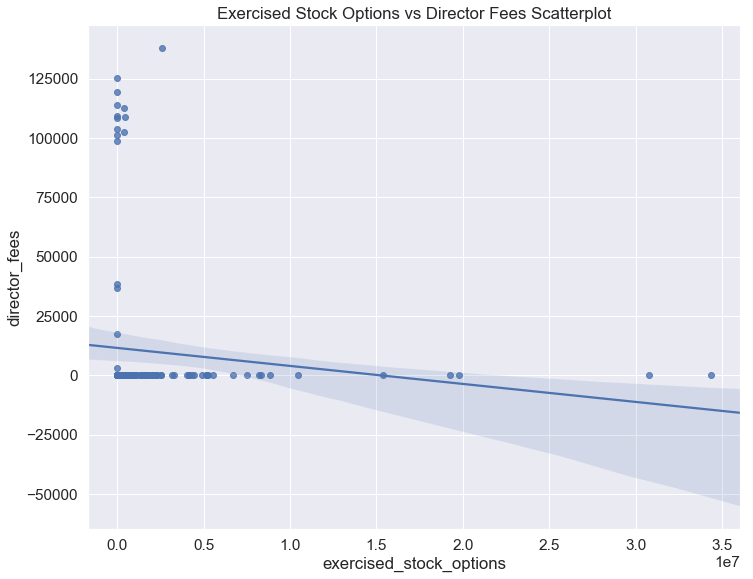

In [68]:
bivariate_plot("exercised_stock_options", "director_fees", "regplot", "Exercised Stock Options", "Director Fees")

Same as before, both features show a negative correlation between them.

### "Total Payments" VS "Director Fees" Scatterplot (-0.293481 spearman correlation)

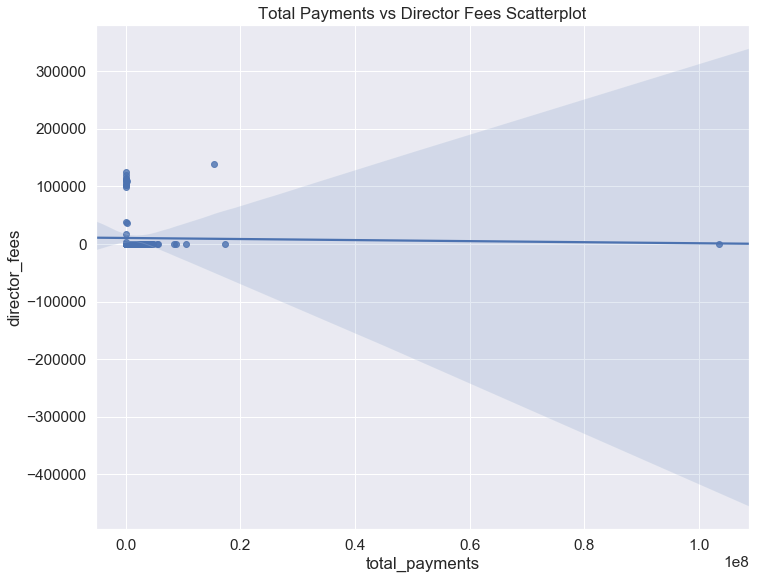

In [72]:
bivariate_plot("total_payments", "director_fees", "regplot", "Total Payments", "Director Fees")

Ones more, both features show a negative correlation between them although it is not apparent in the plot above, based on the spearman correlation there is a negative relation between them.

### "Bonus" VS "Deferred Income" Scatterplot (-0.266856 spearman correlation)

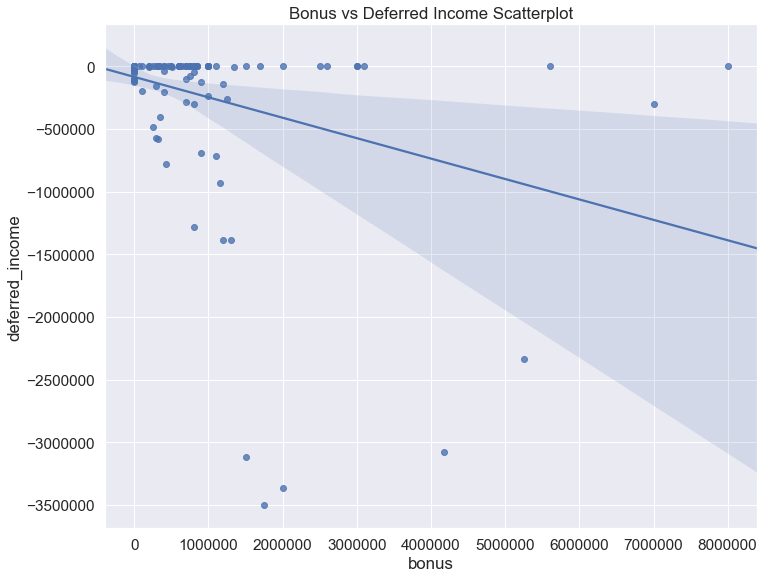

In [69]:
bivariate_plot("bonus", "deferred_income", "regplot", "Bonus", "Deferred Income")

Ones more, both features show a negative correlation between them.

# Multivariate Analysis
In this chapter the top 10 positive and negative correlations will be redrawn but now we will add an extra feature the POIs which are the feature of interest / target variable to find out if there is some special patterns. It will be a great opportunity to depict not only the relations between 2 features but how the POI target variable react to these relations.

#### The main multivariate function to plot either the boxplot or regplot relationship between 2 features

In [23]:
'''
The main bivariate function to plot either the boxplot or regplot relationship between 2 features
'''

def multivariate_plot(feature1, feature2, feature1_str, feature2_str):
    
    sns.set(rc={'figure.figsize':(11.7, 9.27)})
    sns.set(font_scale=1.4)
    f, ax = plt.subplots()
    
    sns.scatterplot(x=feature1, y=feature2, hue="poi", size="poi", sizes=(200, 200), data=df, ax=ax).set_title("Multivariate Plot "+ feature1_str +" and "+ feature2_str +" in respect of POI")
    

### Multivariate Plot "Exercised Stock Options" and "Total Stock Value" in respect of POI (spearman correlation 0.864880)

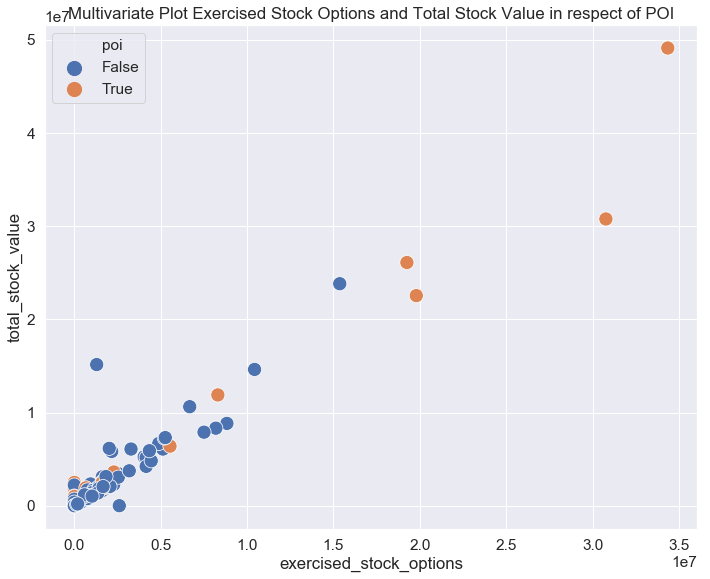

In [24]:
multivariate_plot("exercised_stock_options", "total_stock_value", "Exercised Stock Options", "Total Stock Value")

Here it seems that as long as both the Exercised Stock Options and Total Stock Value increases, then their largest points belong to POIs individuals.

### Multivariate Plot From "Bonus" and "Salary" in respect of "POI" (spearman correlation 0.859786)

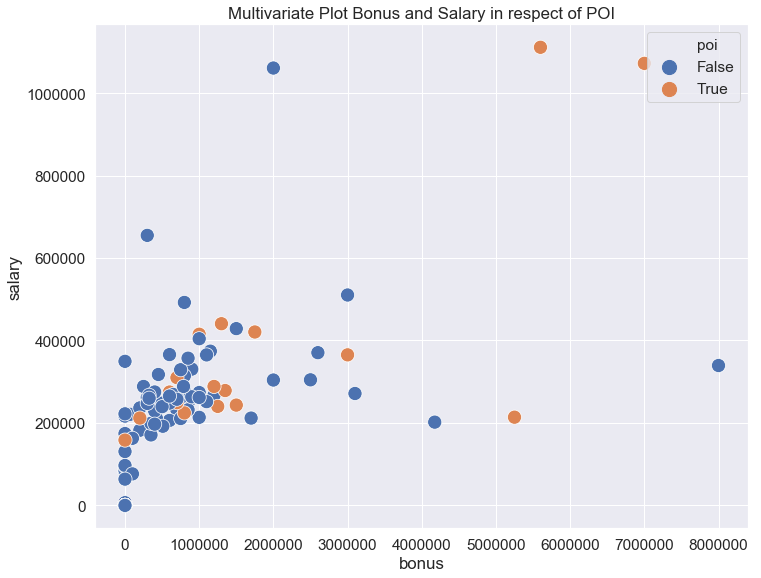

In [25]:
multivariate_plot("bonus", "salary", "Bonus", "Salary")

Here it seems that there is pattern, that is, as long as both the Bonus and Salary, then their largest points belong to POIs individuals.

### Multivariate Plot "To messages" and "Shared Receipt with POI" in respect of POI (spearman correlation 0.830822)

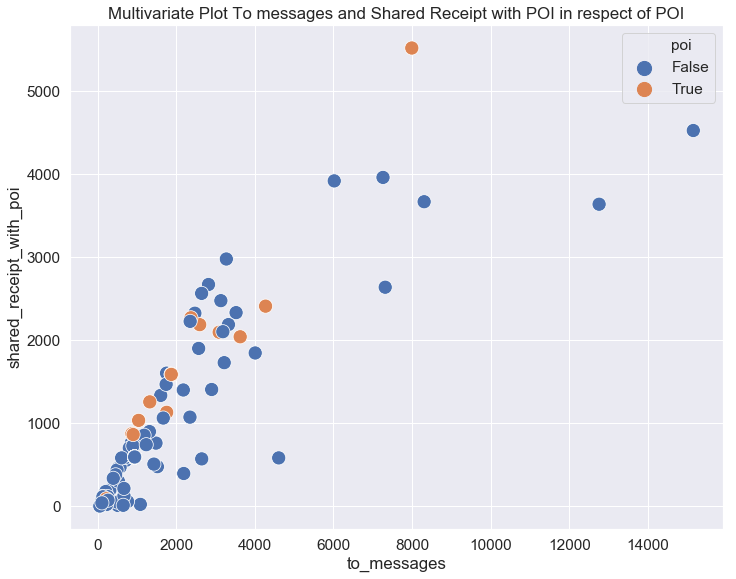

In [253]:
multivariate_plot("to_messages", "shared_receipt_with_poi", "To messages", "Shared Receipt with POI")

I can not say with great confidence that I find a pattern here,but it seems that as long as To Messages and Shared Receipt with POI, then their largest points belong to POIs individuals.

### Multivariate Plot "Shared receipt with POI" and "From POI to this Person" in respect of POI, (spearman correlation 0.770004)

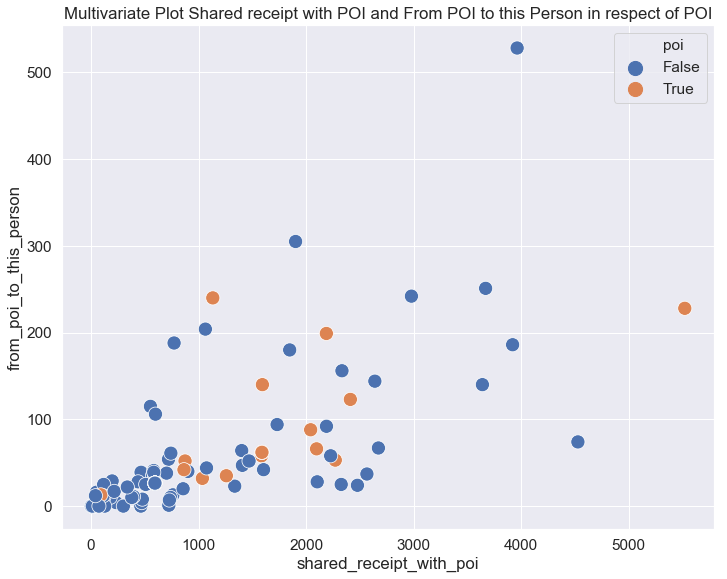

In [254]:
multivariate_plot("shared_receipt_with_poi", "from_poi_to_this_person", "Shared receipt with POI", "From POI to this Person")

Once more, I can not say with great confidence that I find a pattern here, but it seems that as long as the feature Shared Receipt With POI increases and "From POI to this Person" increases, then their largest points are from POIs individuals.

### Multivariate Plot "Bonus" and "Total Payments" in respect of POI, (spearman correlation 0.768776)

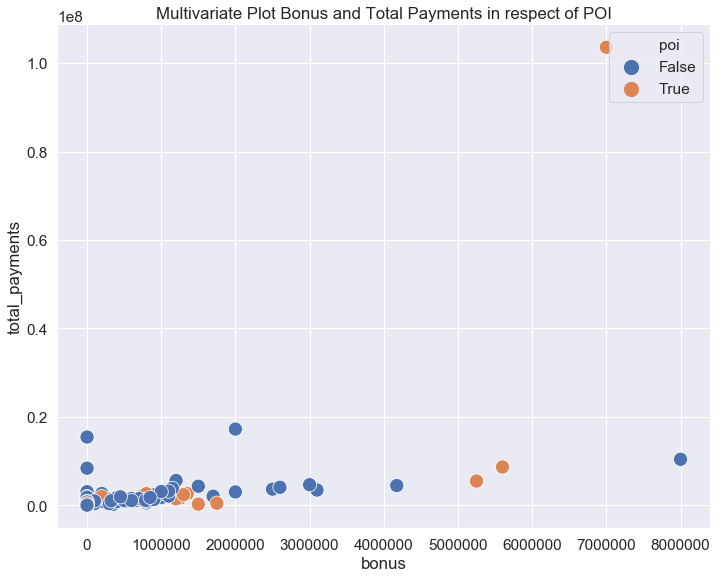

In [255]:
multivariate_plot("bonus", "total_payments", "Bonus", "Total Payments")

Once again, I can not safely say that I find a pattern here, but it seems that as long as the "Bonus" feature increase and "Total Payments" increases, then their largest points are from POIs individuals.

### Multivariate Plot "Total Payments" and "Loan Advances" in respect of POI, (spearman correlation 0.745446)

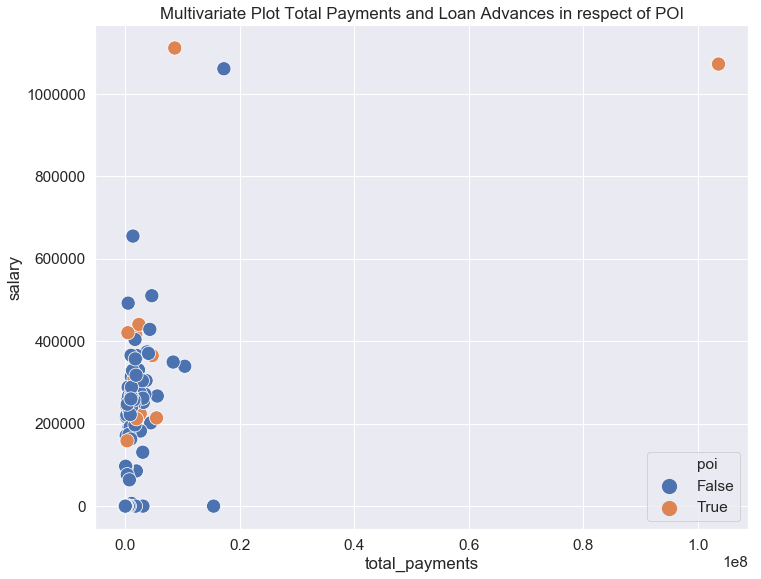

In [256]:
multivariate_plot("total_payments", "salary", "Total Payments", "Loan Advances")

Once again, I can not safely say that I find a pattern here, generally speaking, it seems that with constant Total Payments and as long as the salary increases then there a shift from Non-POIs to POIs.

### Multivariate Plot "From Messages" and "To messages" in respect of POI, (spearman correlation 0.714508)

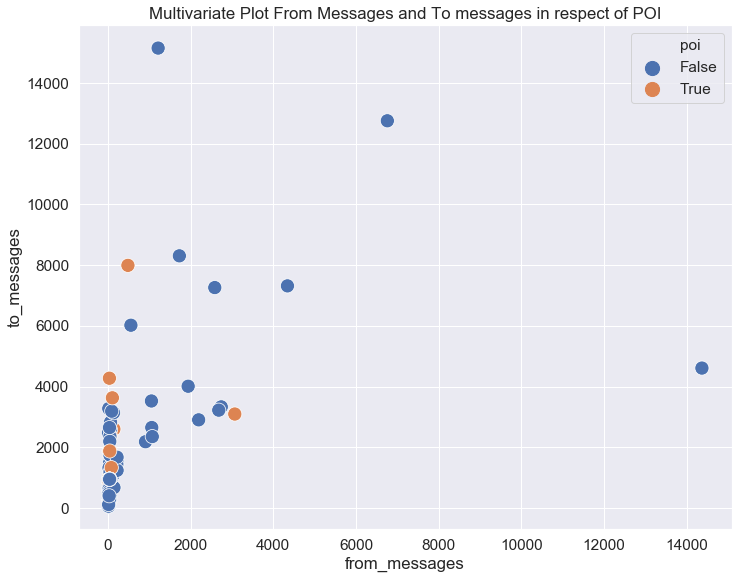

In [257]:
multivariate_plot("from_messages", "to_messages", "From Messages", "To messages")

Once again, I can not safely say that I find a pattern here, generally speaking, it seems that with constant or minor increases in "From_Messages" feature and as long as the the email feature "To messages" increases then there a shift from Non-POIs to POIs.

### Multivariate Plot "Other" and "Total Payments" in respect of POI, (spearman correlation 0.682944)

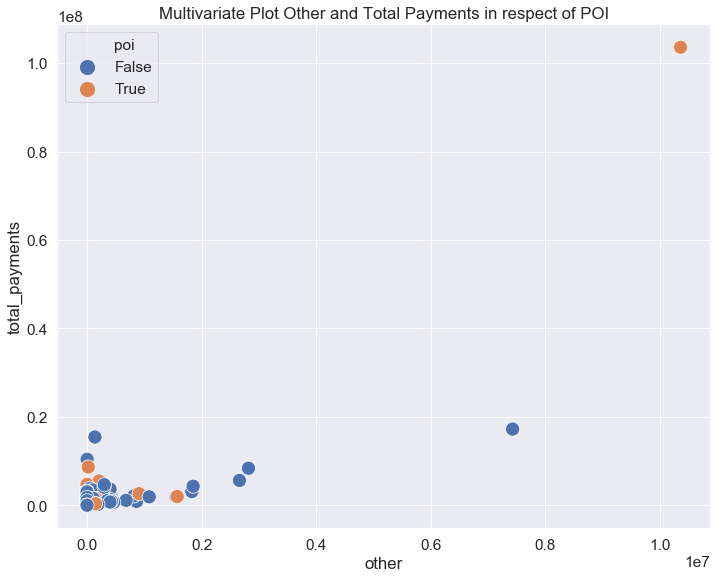

In [258]:
multivariate_plot("other", "total_payments", "Other", "Total Payments")

Here we see that there is a pattern which is that as long the the features "Other" and "Total Payments" increse then there is a shift from non-POIs to POIs.

### Multivariate Plot "To Messages" and "From Poi To This Person" in respect of POI, (spearman correlation 0.667018)

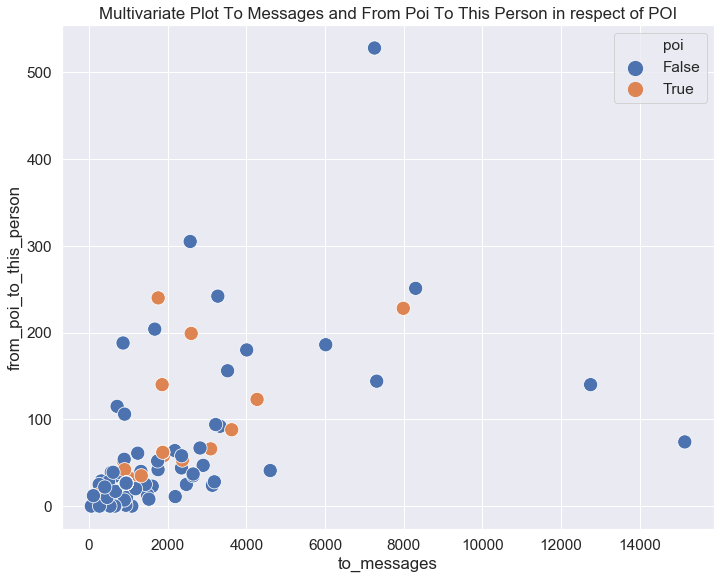

In [259]:
multivariate_plot("to_messages", "from_poi_to_this_person", "To Messages", "From Poi To This Person")

Here I am not confident enough to reach to a conclusion whether there is a pattern or not. I can say that there is a pattern which is that as long the the features "To Messages" and "From POI to this Person" increse then there is a shift from non-POIs to POIs.

### Multivariate Plot "Director Fees" and "Total Stock Value" in respect of POI, (spearman correlation -0.469437)

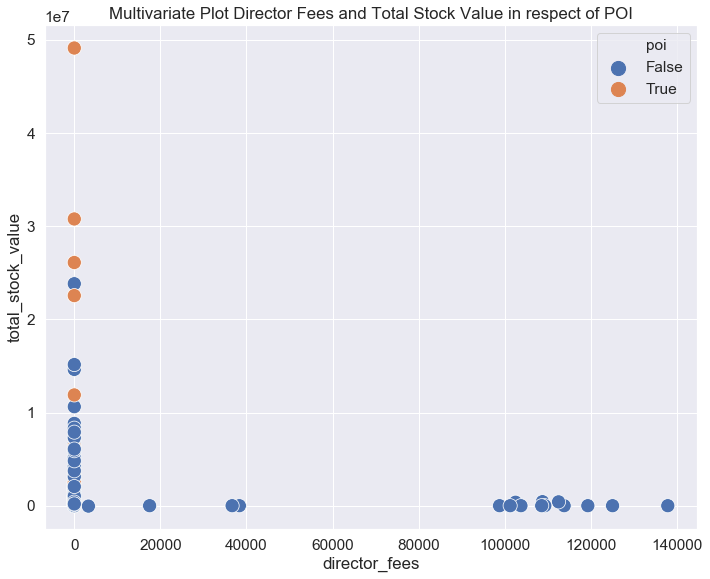

In [260]:
multivariate_plot("director_fees", "total_stock_value", "Director Fees", "Total Stock Value")

Here I am not confident enough to reach to a conclusion whether there is a pattern or not. I may say that as long as the feature "Director Fees" remain tha same and the feature "Total Stock Value" incrases then there is a shift from Non-POIs to POIs.

### Multivariate Plot "Director Fees" and "Restricted Stock" in respect of POI, (spearman correlation -0.448408)

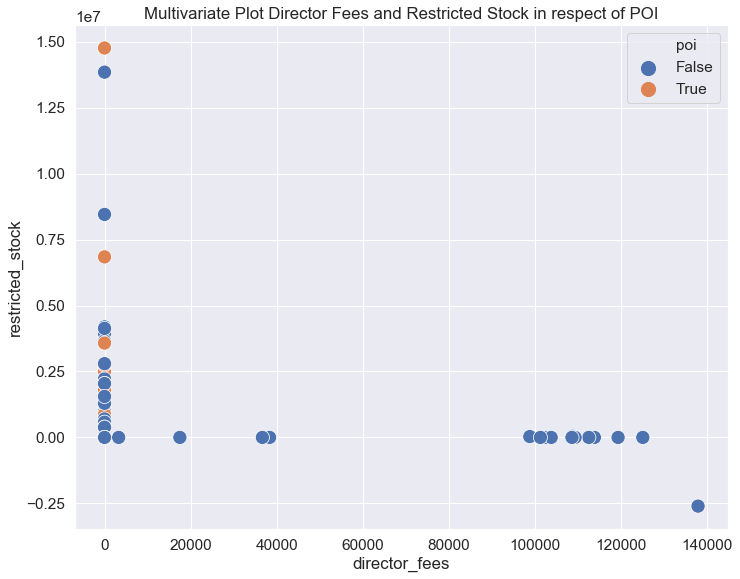

In [261]:
multivariate_plot("director_fees", "restricted_stock", "Director Fees", "Restricted Stock")

Here I am not confident enough to reach to a conclusion whether there is a pattern or not. I may say that as long as the feature "Director Fees" remain tha same and the feature "Restricted Stock" incrases then there is a shift from Non-POIs to POIs.

### Multivariate Plot "Director Fees" and "Salary" in respect of POI, (spearman correlation -0.407451)

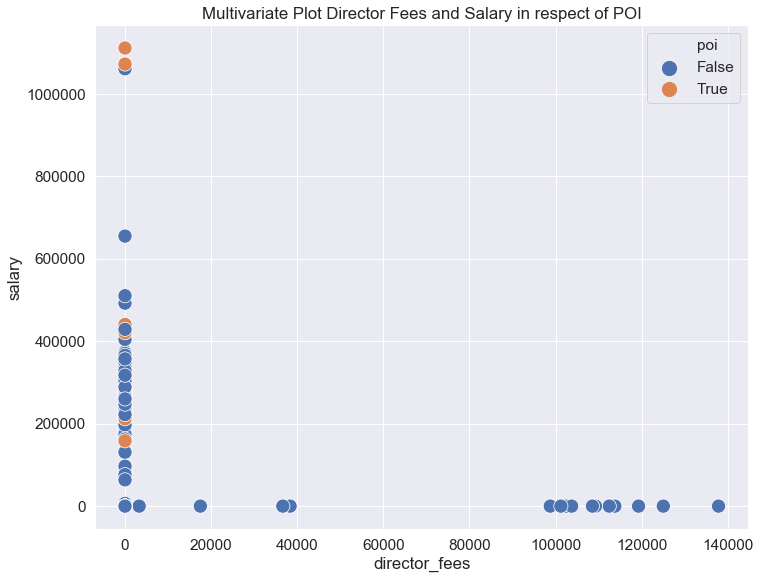

In [262]:
multivariate_plot("director_fees", "salary", "Director Fees", "Salary")

Here I am not confident enough to reach to a conclusion whether there is a pattern or not. I may say that as long as the feature "Director Fees" remain tha same and the feature "Salary" incrases then there is a shift from Non-POIs to POIs.

### Multivariate Plot "Director Fees" and "Bonus" in respect of POI, (spearman correlation -0.359092)

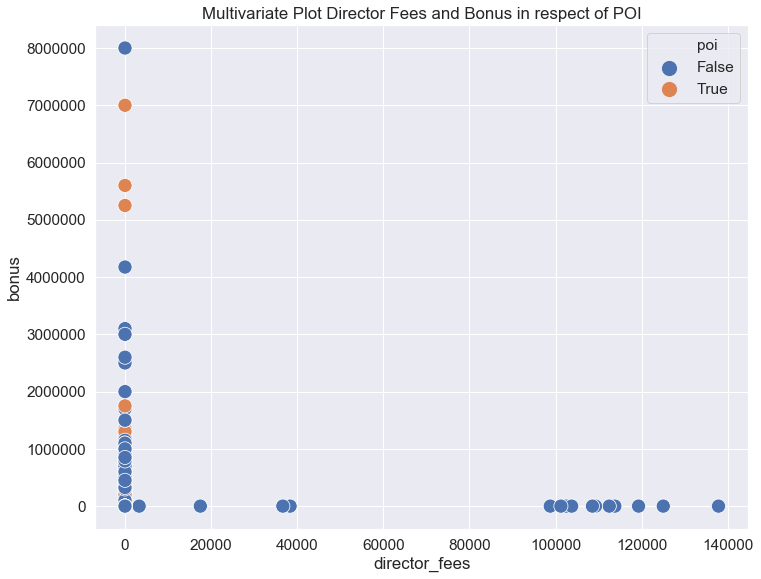

In [263]:
multivariate_plot("director_fees", "bonus", "Director Fees", "Bonus")

Here I am not confident enough to reach to a conclusion whether there is a pattern or not. I may say that as long as the feature "Director Fees" remain tha same and the feature "Bonus" incrases then there is a shift from Non-POIs to POIs.

### Multivariate Plot "Other" and "Director Fees" in respect of POI, (spearman correlation -0.348042)

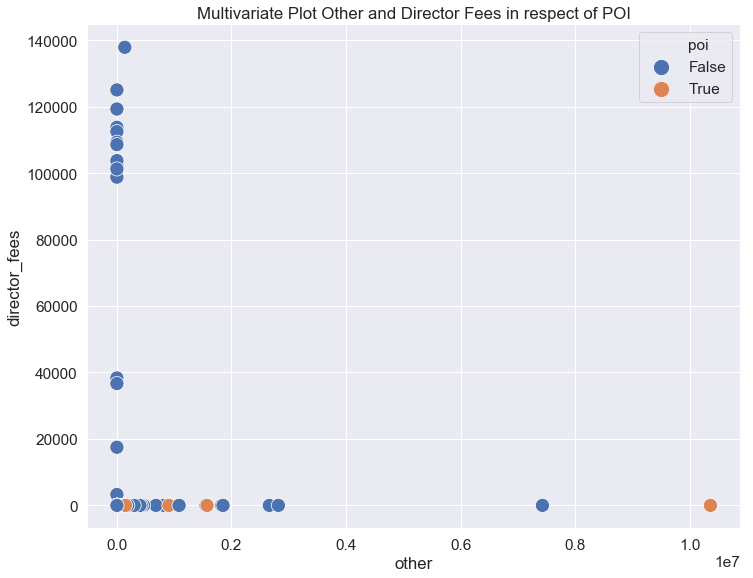

In [264]:
multivariate_plot("other", "director_fees", "Other", "Director Fees")

Here I am not confident enough to reach to a conclusion whether there is a pattern or not. I may say that as long as the feature "Director Fees" remain tha same and the feature "Salary" incrases then there is a shift from Non-POIs to POIs.

### Multivariate Plot "Long Term Incentive" and "Director Fees" in respect of POI, (spearman correlation -0.301838)

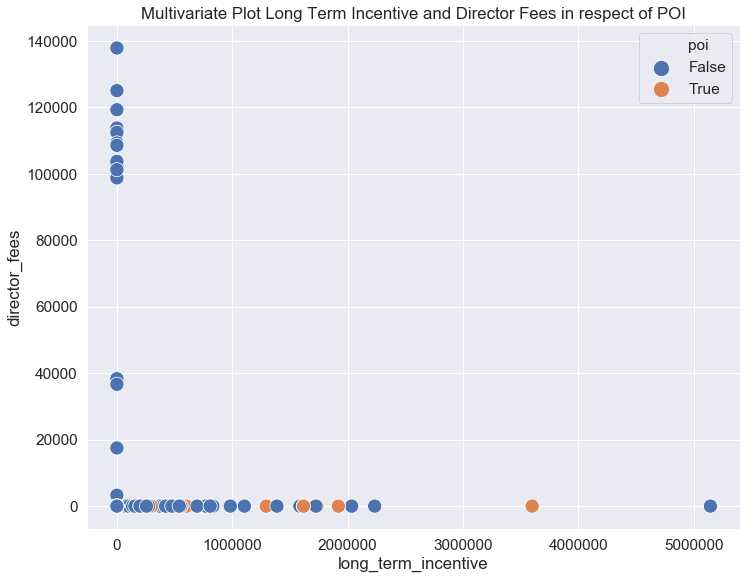

In [265]:
multivariate_plot("long_term_incentive", "director_fees", "Long Term Incentive", "Director Fees")

Here I am not confident enough to reach to a conclusion whether there is a pattern or not. I may say that as long as the feature "Director Fees" remain tha same and the feature "Long Term Incentive" incrases then there is a shift from Non-POIs to POIs.

### Multivariate Plot "Exercised Stock Options" and "Director Fees" in respect of POI, (spearman correlation -0.296084)

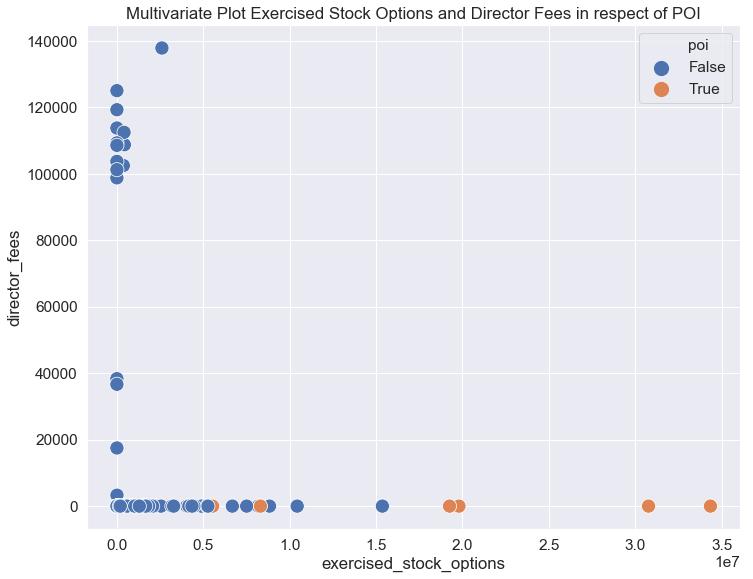

In [76]:
multivariate_plot("exercised_stock_options", "director_fees", "Exercised Stock Options", "Director Fees")

Based on the plot above, I am not sure enough to reach to a conclusion whether there is a pattern or not. I can say that as long as the feature "Director Fees" remains tha same and close to 0 and the feature "Exercised Stock Options" increases then there is a shift from Non-POIs to POIs values.

### Multivariate Plot "Total Payments" and "Director Fees" in respect of POI, (spearman correlation -0.293481)

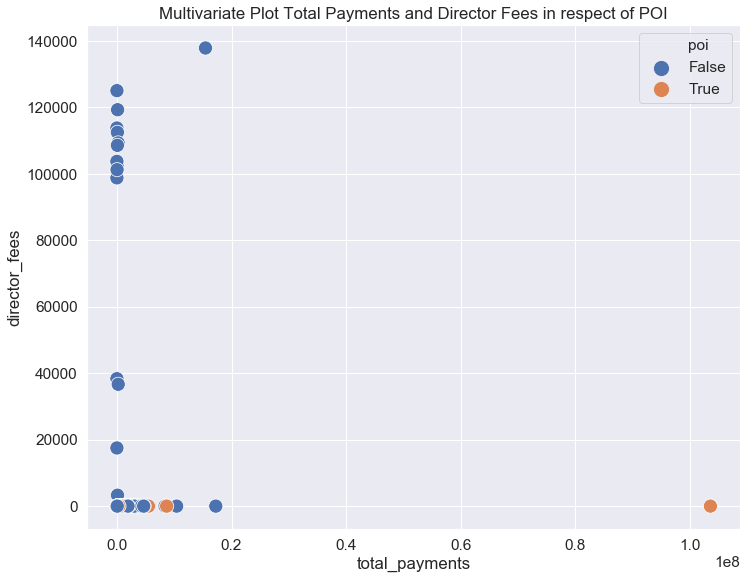

In [267]:
multivariate_plot("total_payments", "director_fees", "Total Payments", "Director Fees")

Based on the plot above, I am not confident enough to reach to a conclusion whether there is a pattern or not. I may say that as long as the feature "Director Fees" remains tha same and the feature "Total Payments" increases then there is a shift from Non-POIs to POIs.

### Multivariate Plot "Bonus" and "Deferred Income" in respect of POI, (spearman corellation -0.266856)

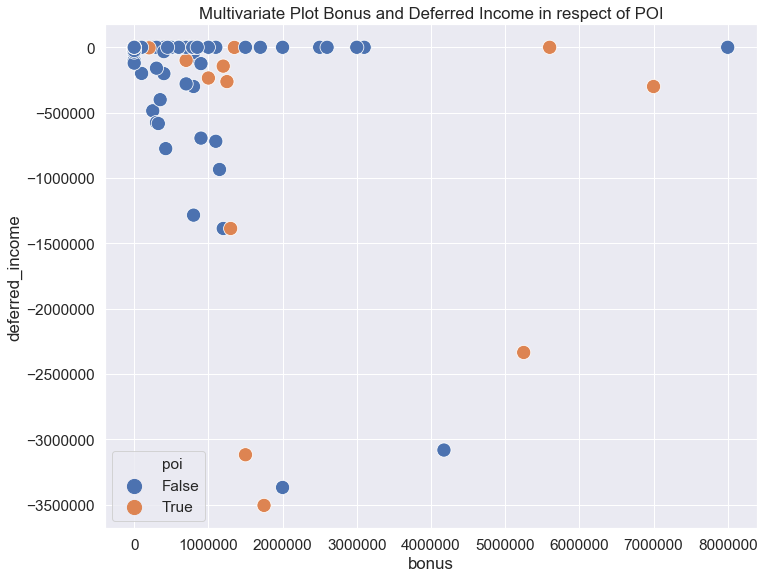

In [268]:
multivariate_plot("bonus", "deferred_income", "Bonus", "Deferred Income")

Here we have an interesting pattern, as long as the "Bonus" feature increases and the "Deferred Income" decreases, we see that there is a change in the POI feature from non-POIs to POIs.

# Dealing with Outliers
I will start looking for outlier data points in all the features. I have to be careful in terms of removing the outliers because the dataset is rather small for machine learning in the first place. Moreover, the outliers might actually be important as they could represent patterns in the data that would aid in the identification of a POI. 

The definition of a mild outlier is either below the (first quartile minus 1.5 times the Interquartile Range (IQR)) or above the (third quartile plus 1.5 times the IQR):

low outlier<first quartile−1.5 x IQR

high outlier>third quartile+1.5 * IQR

My approach will be to count the number of outlying features for each individual. My personal threshold is individuals who have outliers in more than 5 features in the dataset. I will then investigate the persons with the highest number of outliers to determine if they need to be removed.

#### Detecting Outliers

In [68]:
df_without_outliers = df[["salary", "bonus", "long_term_incentive", "deferred_income", "deferral_payments", "loan_advances", "other", "expenses", "director_fees",
               "total_payments", "exercised_stock_options", "restricted_stock", "restricted_stock_deferred", "total_stock_value",
               "from_poi_to_this_person", "from_messages", "from_this_person_to_poi", "shared_receipt_with_poi", "to_messages"]]


IQR = df_without_outliers.quantile(q=0.75) - df_without_outliers.quantile(q=0.25)
first_quartile = df_without_outliers.quantile(q=0.25)
third_quartile = df_without_outliers.quantile(q=0.75)

outliers_features = df_without_outliers[(df_without_outliers>(third_quartile + 1.5*IQR) ) | (df_without_outliers<(first_quartile - 1.5*IQR) )]
outliers_features['name'] = df['name']
outliers_features['poi'] = df['poi']

#outliers_counter = df_without_outliers[(df_without_outliers>(third_quartile + 1.5*IQR) ) | (df_without_outliers<(first_quartile - 1.5*IQR) )].count(axis=1)
#outliers_counter.sort_values(axis=0, ascending=False, inplace=True)


# find outliers' names where they are outliers in more than 5 features, here the threshold is 7 because 
# we add 5+2 where 2 are the poi and name features and 5 is my personal threshold, that means that if a case
# has in 5 or more features outliers then he is generally an outlier and the case must be investigated.
biggest_outliers = outliers_features[outliers_features.notna().sum(axis=1).sort_values(ascending=False) > 7]
outliers_counter = biggest_outliers.count(axis=1).sort_values(ascending = False)
biggest_outliers.loc[outliers_counter.index].name





79          LAY KENNETH L
47         FREVERT MARK A
122    SKILLING JEFFREY K
7        BELDEN TIMOTHY N
78        LAVORATO JOHN J
58        HAEDICKE MARK E
19          BUY RICHARD B
3           BAXTER JOHN C
139    WHALLEY LAWRENCE G
73          KEAN STEVEN J
75         KITCHEN LOUISE
31       DELAINEY DAVID W
0         ALLEN PHILLIP K
Name: name, dtype: object

These individuals have the most of the outliers in more than 5 features in the dataset.

#### Main function to inspect an outlier

In [16]:
# generic function to inspect an outlier:

def inspect_the_outlier(outlier_str):
    print("number of features that", outlier_str, "is an outlier:", len(biggest_outliers.loc[biggest_outliers[biggest_outliers.name == outlier_str].notna().index].dropna(axis=1).columns)-2)
    print()
    print(biggest_outliers.loc[biggest_outliers[biggest_outliers.name == outlier_str].notna().index].dropna(axis=1).columns)
    print()
    print(outlier_str, " outlier feature values:")
    print(biggest_outliers.loc[biggest_outliers[biggest_outliers.name == outlier_str].notna().index].dropna(axis=1))

#### Removing Outliers

As this point, I have to perform some research before deleting outliers. Based on the small number of persons of interest in the dataset, I decided not to remove any individuals who are POIs regardless of their number of outliers. An outlier for a POI could be a sign of fradulent activity, I will manually examine several of the top outlying inviduals to see if I can find any insights and to determine if will be removed.


#### Inspecting the outlier: "LAY KENNETH L"
Lay Kenneth, [wiki source](https://en.wikipedia.org/wiki/Kenneth_Lay),  the CEO of Enron from 1986–2001, took part in many of the illegal business activites and hence is one of the most vital persons of interest.

In [419]:
inspect_the_outlier("LAY KENNETH L")

number of features that LAY KENNETH L is an outlier: 14

Index(['salary', 'bonus', 'long_term_incentive', 'deferred_income',
       'deferral_payments', 'loan_advances', 'other', 'total_payments',
       'exercised_stock_options', 'restricted_stock', 'total_stock_value',
       'from_poi_to_this_person', 'shared_receipt_with_poi', 'to_messages',
       'name', 'poi'],
      dtype='object')

LAY KENNETH L  outlier feature values:
       salary      bonus  long_term_incentive  deferred_income  \
79  1072321.0  7000000.0            3600000.0        -300000.0   

    deferral_payments  loan_advances       other  total_payments  \
79           202911.0     81525000.0  10359729.0     103559793.0   

    exercised_stock_options  restricted_stock  total_stock_value  \
79               34348384.0        14761694.0         49110078.0   

    from_poi_to_this_person  shared_receipt_with_poi  to_messages  \
79                    123.0                   2411.0       4273.0   

             name   p

#### Inspecting the outlier: "FREVERT MARK A"
According to this [site](http://www.apfn.org/enron/frevert.htm), Mark Frevert, chairman and CEO of Enron Wholesale Services, was named vice chairman of Enron. Although not a person of interest. I believe that based on his bussiness bio [source](http://www.apfn.org/enron/frevert.htm), he did not committed in fraudulent transactions and thus he is not a POI and because he is an outlier, he will remove him from the dataset.

In [176]:
inspect_the_outlier("FREVERT MARK A")

number of features that FREVERT MARK A is an outlier: 13

Index(['salary', 'long_term_incentive', 'deferred_income', 'deferral_payments',
       'loan_advances', 'other', 'total_payments', 'exercised_stock_options',
       'restricted_stock', 'total_stock_value', 'from_poi_to_this_person',
       'shared_receipt_with_poi', 'to_messages', 'name', 'poi'],
      dtype='object')

FREVERT MARK A  outlier feature values:
       salary  long_term_incentive  deferred_income  deferral_payments  \
47  1060932.0            1617011.0       -3367011.0          6426990.0   

    loan_advances      other  total_payments  exercised_stock_options  \
47      2000000.0  7427621.0      17252530.0               10433518.0   

    restricted_stock  total_stock_value  from_poi_to_this_person  \
47         4188667.0         14622185.0                    242.0   

    shared_receipt_with_poi  to_messages            name    poi  
47                   2979.0       3275.0  FREVERT MARK A  False  


#### Inspecting the outlier: "SKILLING JEFFREY K"
Jeffrey Skilling sentenced for commiting fraudulent actions during his tenure in Enron Corp [source](https://en.wikipedia.org/wiki/Trial_of_Kenneth_Lay_and_Jeffrey_Skilling), he is a vital POI and he will not be removed from dataset.

In [177]:
inspect_the_outlier("SKILLING JEFFREY K")

number of features that SKILLING JEFFREY K is an outlier: 12

Index(['salary', 'bonus', 'long_term_incentive', 'total_payments',
       'exercised_stock_options', 'restricted_stock', 'total_stock_value',
       'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi',
       'shared_receipt_with_poi', 'to_messages', 'name', 'poi'],
      dtype='object')

SKILLING JEFFREY K  outlier feature values:
        salary      bonus  long_term_incentive  total_payments  \
122  1111258.0  5600000.0            1920000.0       8682716.0   

     exercised_stock_options  restricted_stock  total_stock_value  \
122               19250000.0         6843672.0         26093672.0   

     from_poi_to_this_person  from_messages  from_this_person_to_poi  \
122                     88.0          108.0                     30.0   

     shared_receipt_with_poi  to_messages                name   poi  
122                   2042.0       3627.0  SKILLING JEFFREY K  True  


#### Inspecting the outlier: "BELDEN TIMOTHY N"
Timothy Belden, [wiki source](https://en.wikipedia.org/wiki/Timothy_Belden) Timothy Belden (born 1967) is the former head of trading in Enron Energy Services. He is considered the mastermind of Enron's scheme to drive up California's energy prices, by developing many of the trading strategies that resulted in the California electricity crisis. Belden pleaded guilty to one count of conspiracy to commit wire fraud as part of a plea bargain, along with his cooperation with authorities to help convict many top Enron executives. He is a vital person of interest and thus he will remain in the dataset.

In [178]:
inspect_the_outlier("BELDEN TIMOTHY N")

number of features that BELDEN TIMOTHY N is an outlier: 9

Index(['bonus', 'deferred_income', 'deferral_payments', 'total_payments',
       'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi',
       'shared_receipt_with_poi', 'to_messages', 'name', 'poi'],
      dtype='object')

BELDEN TIMOTHY N  outlier feature values:
       bonus  deferred_income  deferral_payments  total_payments  \
7  5249999.0       -2334434.0          2144013.0       5501630.0   

   from_poi_to_this_person  from_messages  from_this_person_to_poi  \
7                    228.0          484.0                    108.0   

   shared_receipt_with_poi  to_messages              name   poi  
7                   5521.0       7991.0  BELDEN TIMOTHY N  True  


#### Inspecting the outlier: "LAVORATO JOHN J"
John Lavorato, was a top executive in the energy-trading branch of Enron and received large bonuses to keep him from leaving Enron. As he was not a person of interest, and the large bonus he got it was just to stay and not leave the Enron Corp. based on this [article](https://www.nytimes.com/2002/06/18/business/officials-got-a-windfall-before-enron-s-collapse.html), I think it would be appropriate to remove him from the dataset.

In [180]:
inspect_the_outlier("LAVORATO JOHN J")

number of features that LAVORATO JOHN J is an outlier: 8

Index(['bonus', 'long_term_incentive', 'total_payments',
       'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi',
       'shared_receipt_with_poi', 'to_messages', 'name', 'poi'],
      dtype='object')

LAVORATO JOHN J  outlier feature values:
        bonus  long_term_incentive  total_payments  from_poi_to_this_person  \
78  8000000.0            2035380.0      10425757.0                    528.0   

    from_messages  from_this_person_to_poi  shared_receipt_with_poi  \
78         2585.0                    411.0                   3962.0   

    to_messages             name    poi  
78       7259.0  LAVORATO JOHN J  False  


#### Inspecting the outlier: "HAEDICKE MARK E"
Mark Haedicke served as senior executive, I found a [site](http://edition.cnn.com/2002/LAW/02/09/enron.bonuses/index.html) where he was mentioned as a top bonus paid employee, thus I believe that based on the fact that he is an outlier, and he is not a poi I will remove him from the dataset.

In [182]:
inspect_the_outlier("HAEDICKE MARK E")

number of features that HAEDICKE MARK E is an outlier: 8

Index(['long_term_incentive', 'deferred_income', 'deferral_payments',
       'restricted_stock_deferred', 'from_poi_to_this_person', 'from_messages',
       'from_this_person_to_poi', 'to_messages', 'name', 'poi'],
      dtype='object')

HAEDICKE MARK E  outlier feature values:
    long_term_incentive  deferred_income  deferral_payments  \
58             983346.0        -934484.0          2157527.0   

    restricted_stock_deferred  from_poi_to_this_person  from_messages  \
58                  -329825.0                    180.0         1941.0   

    from_this_person_to_poi  to_messages             name    poi  
58                     61.0       4009.0  HAEDICKE MARK E  False  


#### Inspecting the outlier: "BUY RICHARD B"
Richard Buy, Enron's chief risk officer, he invoked the Fifth Amendment and refused to answer questions in the court of Law. I believe he is not a POI and he is an outlier and I will remove from dataset.

In [179]:
inspect_the_outlier("BUY RICHARD B")

number of features that BUY RICHARD B is an outlier: 8

Index(['deferred_income', 'deferral_payments', 'other',
       'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi',
       'shared_receipt_with_poi', 'to_messages', 'name', 'poi'],
      dtype='object')

BUY RICHARD B  outlier feature values:
    deferred_income  deferral_payments     other  from_poi_to_this_person  \
19        -694862.0           649584.0  400572.0                    156.0   

    from_messages  from_this_person_to_poi  shared_receipt_with_poi  \
19         1053.0                     71.0                   2333.0   

    to_messages           name    poi  
19       3523.0  BUY RICHARD B  False  


#### Inspecting the outlier: "BAXTER JOHN C"
John Baxter, was a former vice Enron vice chairman and died of an apparent self-inflicted gunshot before he was able to testify against other Enron executives. I will remove him from the dataset as he is not a person of interest.

In [181]:
inspect_the_outlier("BAXTER JOHN C")

number of features that BAXTER JOHN C is an outlier: 8

Index(['long_term_incentive', 'deferred_income', 'deferral_payments', 'other',
       'total_payments', 'exercised_stock_options', 'restricted_stock',
       'total_stock_value', 'name', 'poi'],
      dtype='object')

BAXTER JOHN C  outlier feature values:
   long_term_incentive  deferred_income  deferral_payments      other  \
3            1586055.0       -1386055.0          1295738.0  2660303.0   

   total_payments  exercised_stock_options  restricted_stock  \
3       5634343.0                6680544.0         3942714.0   

   total_stock_value           name    poi  
3         10623258.0  BAXTER JOHN C  False  


#### inspecting the outlier: "WHALLEY LAWRENCE G"

He was investigated thoroughly [(source)](http://www.corpwatch.org/article.php?id=13194) but not identified as a person of interest and therefore will be removed from the dataset.

In [420]:
inspect_the_outlier("WHALLEY LAWRENCE G")

number of features that WHALLEY LAWRENCE G is an outlier: 7

Index(['bonus', 'restricted_stock', 'total_stock_value',
       'from_poi_to_this_person', 'from_messages', 'shared_receipt_with_poi',
       'to_messages', 'name', 'poi'],
      dtype='object')

WHALLEY LAWRENCE G  outlier feature values:
         bonus  restricted_stock  total_stock_value  from_poi_to_this_person  \
139  3000000.0         2796177.0          6079137.0                    186.0   

     from_messages  shared_receipt_with_poi  to_messages                name  \
139          556.0                   3920.0       6019.0  WHALLEY LAWRENCE G   

       poi  
139  False  


#### Inspecting the outlier: "KEAN STEVEN J"
Kean Steven former chief of staff in Enron corporation was one of the dicent employees, based on this [article](http://www.nbcnews.com/id/3606477/ns/business-corporate_scandals/t/lay-skilling-linked-enron-failure/#.W28OuOj-jDc) he wanted afer the Skilling's resignation to turn the course of company focusing more on bussiness rather than dealing with **financial transactions**, hence I believe that he is an outlier and must be removed from dataset. 

In [183]:
inspect_the_outlier("KEAN STEVEN J")

number of features that KEAN STEVEN J is an outlier: 7

Index(['restricted_stock', 'total_stock_value', 'from_poi_to_this_person',
       'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi',
       'to_messages', 'name', 'poi'],
      dtype='object')

KEAN STEVEN J  outlier feature values:
    restricted_stock  total_stock_value  from_poi_to_this_person  \
73         4131594.0          6153642.0                    140.0   

    from_messages  from_this_person_to_poi  shared_receipt_with_poi  \
73         6759.0                    387.0                   3639.0   

    to_messages           name    poi  
73      12754.0  KEAN STEVEN J  False  


#### Inspecting the outlier: "KITCHEN LOUISE"
Louise Kitchen was a young British trader spearheading Enron's entry into Europe's energy markets. She wasn't a top executive and hadn't even turned 30. But Kitchen cooked up a plan for the company's online trading operation, that is why it must be remained on the dataset. Although she is not a POI and she is an outlier due to her interesting record during her career at Enron she must remain in the dataset. [source](http://articles.latimes.com/2002/jan/27/news/mn-25002)

In [92]:
inspect_the_outlier("KITCHEN LOUISE")

number of features that KITCHEN LOUISE is an outlier: 8

Index(['bonus', 'from_poi_to_this_person', 'from_messages',
       'from_this_person_to_poi', 'shared_receipt_with_poi', 'to_messages',
       'name', 'poi'],
      dtype='object')

KITCHEN LOUISE  outlier feature values:
        bonus  from_poi_to_this_person  from_messages  \
75  3100000.0                    251.0         1728.0   

    from_this_person_to_poi  shared_receipt_with_poi  to_messages  \
75                    194.0                   3669.0       8305.0   

              name    poi  
75  KITCHEN LOUISE  False  


#### Inspecting the outlier: "DELAINEY DAVID W"
A former Enron executive, David W. Delainey, was sentenced to two and a half years in prison yesterday after prosecutors urged leniency, saying he helped unravel crimes at the energy company [source](https://www.nytimes.com/2006/09/19/business/19enron.html). So he will stay in the dataset regardless being an outlier.

In [93]:
inspect_the_outlier("DELAINEY DAVID W")

number of features that DELAINEY DAVID W is an outlier: 8

Index(['bonus', 'long_term_incentive', 'total_payments', 'from_messages',
       'from_this_person_to_poi', 'shared_receipt_with_poi', 'name', 'poi'],
      dtype='object')

DELAINEY DAVID W  outlier feature values:
        bonus  long_term_incentive  total_payments  from_messages  \
31  3000000.0            1294981.0       4747979.0         3069.0   

    from_this_person_to_poi  shared_receipt_with_poi              name   poi  
31                    609.0                   2097.0  DELAINEY DAVID W  True  


#### Inspecting the outlier: "ALLEN PHILLIP K"
Phillip K. Allen, who worked on the gas desk on the West Coast, received huge bonuses fron Enron Corp. Based on his profile little evidence have been found to show that he is a POI and being an outlier, he must be removed from dataset.

In [94]:
inspect_the_outlier("ALLEN PHILLIP K")

number of features that ALLEN PHILLIP K is an outlier: 8

Index(['bonus', 'deferred_income', 'deferral_payments',
       'restricted_stock_deferred', 'from_messages', 'from_this_person_to_poi',
       'name', 'poi'],
      dtype='object')

ALLEN PHILLIP K  outlier feature values:
       bonus  deferred_income  deferral_payments  restricted_stock_deferred  \
0  4175000.0       -3081055.0          2869717.0                  -126027.0   

   from_messages  from_this_person_to_poi             name    poi  
0         2195.0                     65.0  ALLEN PHILLIP K  False  


In [15]:
# Remove the outlier individuals


df_without_outliers = df[(df.name != "FREVERT MARK A") & (df.name != "LAVORATO JOHN J") &
                        (df.name != "BUY RICHARD B") & (df.name != "BAXTER JOHN C") & 
                        (df.name != "HAEDICKE MARK E") & (df.name != "KEAN STEVEN J") &
                        (df.name != "WHALLEY LAWRENCE G")]


# Find the number of poi and non poi now in the data after droping the outliers
df_without_outliers['poi'].value_counts()

False    119
True      18
Name: poi, dtype: int64

# Building Machine Learning models

#### I am going to use the following Machine Learning models to build a model and identify POI who may have committed fraudulent activities. These Machine Learning algorithms are the following:

- SVM (*SVC in sklearn*),

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well (look at the below snapshot) [source](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code)

- Decision Trees (*DecisionTreeClassifier in sklearn*),

Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). It is one of the predictive modelling approaches used in statistics, data mining and machine learning. Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees [source](https://en.wikipedia.org/wiki/Decision_tree_learning).

- Naive Bayes (*GaussianNB in sklearn*)

In machine learning, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features [source](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

- Random Forest (*RandomForestClassifier in sklearn*)

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set [source](https://en.wikipedia.org/wiki/Random_forest).

- Adaboost (*AdaboostClassifier in sklearn*)

AdaBoost, short for Adaptive Boosting, is a machine learning meta-algorithm formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. AdaBoost is sensitive to noisy data and outliers. In some problems it can be less susceptible to the overfitting problem than other learning algorithms. The individual learners can be weak, but as long as the performance of each one is slightly better than random guessing, the final model can be proven to converge to a strong learner [source](https://en.wikipedia.org/wiki/AdaBoost).

- k-Nearest Neighbors (*KNeighborsClassifier in sklearn*)

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique [source](http://www.saedsayad.com/k_nearest_neighbors.htm).

#### Moreover, I will conduct the following experiments:
- Default number of Features and Default Machine Learning parameters
- Default number of Features and Hyperparameter Tuning
- Default number of Features together with engineered Features and Default Machine Learning parameters
- Default number of Features together with engineered Features and Tuning
- Feature Selection and Default Parameters
- Feature Selection Hyperparameter Tuning

As the experiments proceed, I will narrow down the number of machine learning algorithms that are suitable for the dataset.

#### To evaluate my models I will use these validation metrics:

- Precision:

Precision is the number of correct positive classifications divided by the total number of positive labels assigned. Or we can say, it is the fraction of persons of interest predicted by the algorithm that are truly persons of interest. Mathematically precision is defined as
precision=true positives / (true positives+false positives)

- Recall:

Recall is the number of correct positive classifications divided by the number of positive instances that should have been identified. In other words, it is the fraction of the total number of persons of interest in the data that the classifier identifies. Mathematically, recall is defined as
recall=true positives / (true positives+false negatives)

- F1 score

A combined measured of precision and recall is the F1 score. Is it the harmonic mean of precision and recall. Mathematically, the F1 score is defined as:

F1 Score=2 (precision x recall) / (precision+recall)

For this project, the objective was a precision and a recall both greater than 0.3. However, I believe it is possible to do much better than that with the right feature selection and algorithm tuning. For the majority of my tuning and optimization using GridSearchCV, I will use the F1 score because it takes into account both the precision and recall.

**So summarizing all the validation metrics**:


- Accuracy
- Precision 
- Recall
- F1 score

#### More data preprocessing before deploying ML models:

- Scalling

The only data preparation I will do for initial testing of the algorithms is to scale the data such that it has a zero mean and a unit variance. This process is called normalization and is accomplished using the scale function from the sklearn preprocessing module. Scaling of some form (whether that is MinMax scaling or normalization) is usually necessary because there are different units for the features in the dataset. Scaling creates non-dimensional features so that those features with larger units do not have an undue influence on the classifier as would be the case if the classifier uses some sort of distance measurement (such as Euclidean distance) as a similarity metric.

#### The fear of overfitting and how to tackle the issue

I have to validate my classifiers using train/test splits. However our dataset is very small and we are facing the problem of class imbalance. Training and testing the classifier against the same data will only lead to overfitting. This is why validation is very important. By using StratifiedShuffleSplit from sklean to split our data into training and testing data, we can make sure that our classes are allocated by the same ratio set for training/testing and that each datapoint in the class is randomly selected. Because of our small dataset, setting the iterations to 1000 will give us more reliable results in the end, as we will have trained and tested on almost all of our datapoints. The only downside is the run time. By running 1000 the StratifiedShuffleSplit, 1000 confusion matrices will be produced, In order to conclude to tangible results from 1000 confusion matrices I will add them and then each row will be devided by the number of non-POIs and POIs from all the 1000 splits respectively.

Furthermore, due to the 1000 stratified shuffle split we will have to average the sum of all the evaluation metrics like Accuracy, Precision, Recall and F1 score. Hence we will produce the average Accuracy, Precision, Recall and F1 score and as mentioned in the previous paragragh the normalized, average confusion matrix after 1000 stratified shuffle splits.

#### Expanding to other ML concepts

I would like to talk about my intuition and steps for my experiments. Previously I mentioned some Machine learning related terms such as Hyperparameter Tuning, Feature Engineering and Feature Selection without any explanation, let me extend a bit more these concepts.

- Hyperparameter Tuning: 

Hyperparameters refer to the machine learning models' parameters that cannot be directly learned from the training process and need to be predefined. At first, every machine learning method in sklearn is has been set with default hyperparamteres. These hyperparameters define higher level concepts about the model such as complexity, capacity to learn, rate of convergence, penalty etc. The optimal hyperparameters lead to better efficiency, faster convergence and better results overall. In addition, we need to select an optimization strategy that will find us the best set of hyperparameters.  There are several ways that are used extensively in today’s world to find best hyperparameters such as Grid Search, Random Search and Bayesian Search [source](http://busigence.com/blog/hyperparameter-optimization-and-why-is-it-important).

- Feature Engineering:

Feature engineering is the process that it is considered essential in machine learning. Using domain knowledge of the data to create features that make machine learning algorithms perform even better. Feature engineering is fundamental to the application of machine learning. In general, on a very basic level, feature engineering is the creation of features relevant to a specific machine learning algorithm and domain. Feature functions can be thought of as composites of variables that can help quantify the relationships between inputs, variables, or values specific to a given domain. [source1](https://en.wikipedia.org/wiki/Feature_engineering), [source2](https://www.quora.com/What-is-feature-engineering-and-what-is-the-importance-of-it-in-various-machine-learning-applications).


- Feature Selection:

Feature selection is useful on a variety of fronts: it is the best weapon against the Curse of Dimensionality; it can reduce overall training times; and it is a powerful defense against overfitting, increasing generalizability [source](https://www.kdnuggets.com/2017/06/practical-importance-feature-selection.html).


#### Random Seed

Last but not least is the random seed which is required for almost all ML models and stratified shuffle split, I will use the as random seed the value 42 for all my experiments.

## ML Algorithm Training with Default Parameters and Default number of Features

#### Data preparation before building ML models, scaling

In [16]:
from sklearn.preprocessing import scale
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import time

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt


df_without_outliers_names_and_email_addresses = df_without_outliers.drop(['name', "email_address", "poi"], axis=1)

# Scale the dataset and send it back to a dictionary
scaled_df = df_without_outliers_names_and_email_addresses
scaled_df = scale(scaled_df)

scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = df_without_outliers_names_and_email_addresses.columns
#scaled_df["poi"] = df_without_outliers["poi"]

scaled_df.insert(loc=0, column='poi', value=df_without_outliers["poi"].values)


X = np.array(scaled_df.drop(["poi"], axis=1))
y = np.array(scaled_df["poi"])

#### SVM training and evaluation with Default Parameters and Default Number of Features.

For SVM the accuracy score is 0.8558809523809525
For SVM the precision score is 0.03175
For SVM the recall score is 0.0055
For SVM the f1 score is 0.009307142857142858
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.99761111 0.00238889]
 [0.9945     0.0055    ]]

Last iteration Stratified Shuffle Split confusion matrix:

 elapsed time 4.3454506397247314 seconds


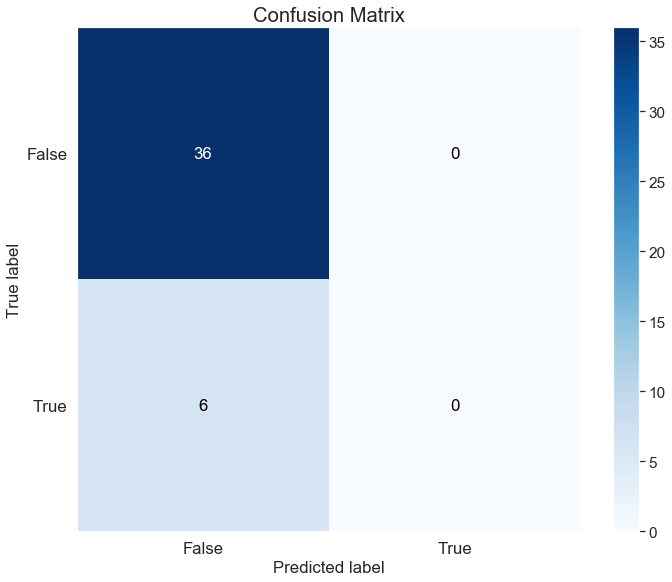

In [44]:
## SVM evaluation

start_time = time.time()

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state = 42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) <-- Its no use, since leads to imbalanced splits

    clf = SVC(random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)

print("For SVM the accuracy score is", np.mean(accuracy_scores))
print("For SVM the precision score is", np.mean(precision_scores))
print("For SVM the recall score is", np.mean(recall_scores))
print("For SVM the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count

print(confusion_matrices)

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

print("\n elapsed time", time.time() - start_time, "seconds")

SVM classifier providing with default parameters and initial default features is not a good fit to model this dataset to predict POIs. Its precision is ver low almost close to zero altough it can accurately predict the Non POIs, however it performs poorly on predicting POIs.

#### DecisionTreeClassifier training and evaluation with Default Parameters and Default Number of Features.

For DecisionTreeClassifier the accuracy score is 0.8373333333333335
For DecisionTreeClassifier the precision score is 0.434918691031191
For DecisionTreeClassifier the recall score is 0.4005
For DecisionTreeClassifier the f1 score is 0.39672782234964893
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.91013889 0.08986111]
 [0.5995     0.4005    ]]

Last iteration Stratified Shuffle Split confusion matrix:

 elapsed time 4.535398721694946 seconds


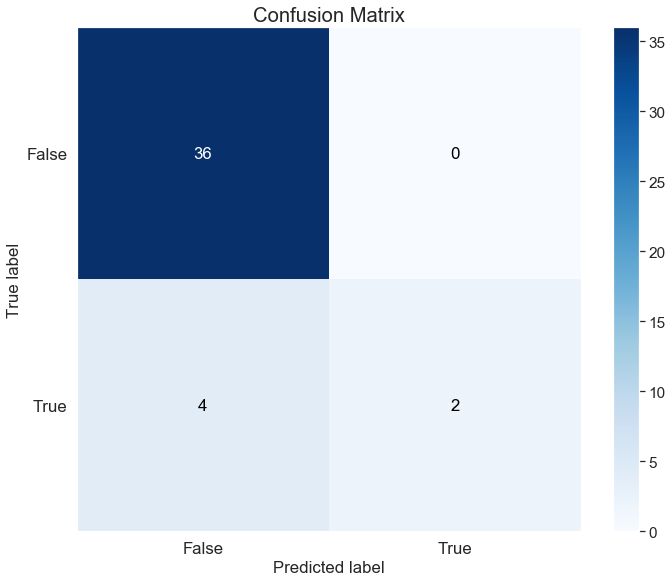

In [43]:
## DecisionTreeClassifier validation

start_time = time.time()

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")


sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0


    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For DecisionTreeClassifier the accuracy score is", np.mean(accuracy_scores))
print("For DecisionTreeClassifier the precision score is", np.mean(precision_scores))
print("For DecisionTreeClassifier the recall score is", np.mean(recall_scores))
print("For DecisionTreeClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count

print(confusion_matrices)

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)


print("\n elapsed time", time.time() - start_time, "seconds")

DecisionTree Classifier, is a model that produces good results with default ML parameters and using the initial features. Both the precision and recall are more than 0.4 and has an excellent accuracy.

#### GaussianNB training and evaluation with Default Parameters and Default Number of Features.

For GaussianNB the accuracy score is 0.6066428571428572
For GaussianNB the precision score is 0.2654403695634599
For GaussianNB the recall score is 0.6578333333333333
For GaussianNB the f1 score is 0.35574303373490135
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.59811111 0.40188889]
 [0.34216667 0.65783333]]

Last iteration Stratified Shuffle Split confusion matrix:

 elapsed time 4.319993495941162 seconds


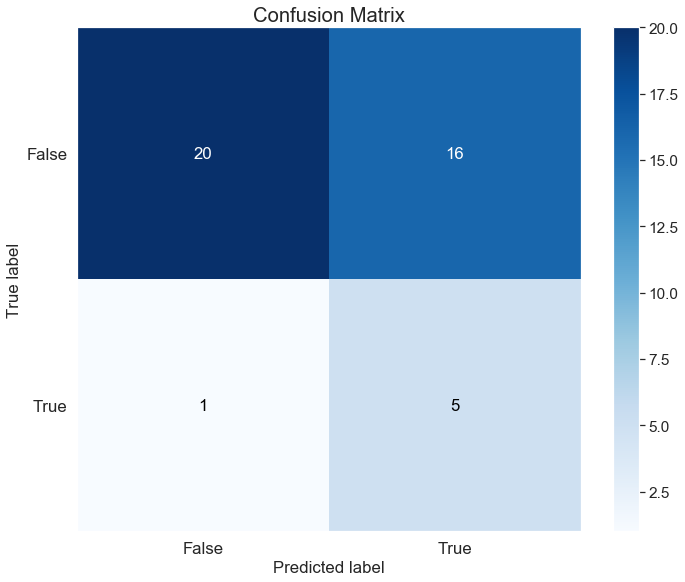

In [45]:
#### GaussianNB

start_time = time.time()

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")


sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0

    clf = GaussianNB()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For GaussianNB the accuracy score is", np.mean(accuracy_scores))
print("For GaussianNB the precision score is", np.mean(precision_scores))
print("For GaussianNB the recall score is", np.mean(recall_scores))
print("For GaussianNB the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count

print(confusion_matrices)

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

print("\n elapsed time", time.time() - start_time, "seconds")

Gaussian Naive Bayes shows some interesting results; it has average accuracy after 1000 stratified shuffle splits which is close to 0.6 and unfortunately its average precision is below 0.3. I believe that due to its Naive assumption and due to the fact that we have continuous data Gaussian Naive Bayes perform poorly. I will check this ML model in the future when I introduce engineered features.

#### RandomForestClassifier training and evaluation with Default Parameters and Default Number of Features.

For RandomForestClassifier the accuracy score is 0.871904761904762
For RandomForestClassifier the precision score is 0.6047908369408369
For RandomForestClassifier the recall score is 0.2806666666666667
For RandomForestClassifier the f1 score is 0.35890354074030545
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.97044444 0.02955556]
 [0.71933333 0.28066667]]

Last iteration Stratified Shuffle Split confusion matrix:

 elapsed time 23.04272174835205 seconds


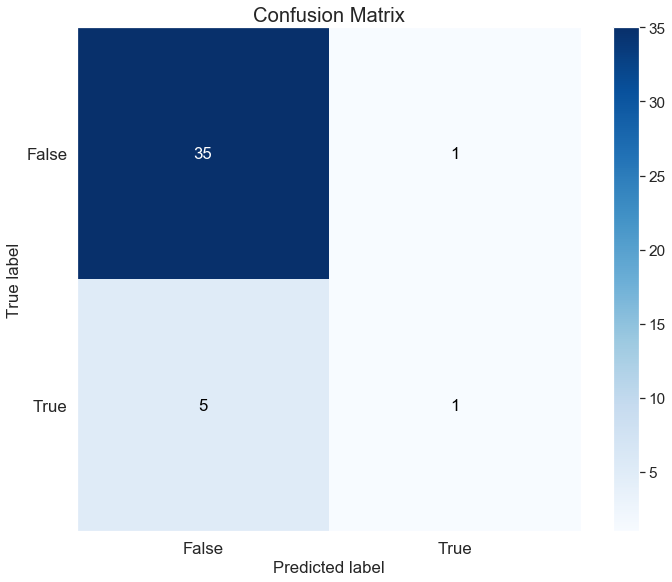

In [47]:
#### Random Forest

start_time = time.time()

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")


sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For RandomForestClassifier the accuracy score is", np.mean(accuracy_scores))
print("For RandomForestClassifier the precision score is", np.mean(precision_scores))
print("For RandomForestClassifier the recall score is", np.mean(recall_scores))
print("For RandomForestClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count

print(confusion_matrices)
    

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

print("\n elapsed time", time.time() - start_time, "seconds")

RandomForestClassifier is an metaclassifier, it is an ensemble of multiple decision trees, here the classifier has great average accuracy and average precision, however the average recall does not meet our standards, it is almost below 0.3.

#### AdaboostClassifier training and evaluation with Default Parameters and Default Number of Features.

For AdaBoostClassifier the accuracy score is 0.8737857142857145
For AdaBoostClassifier the precision score is 0.5885278443778444
For AdaBoostClassifier the recall score is 0.4475
For AdaBoostClassifier the f1 score is 0.48409807356386303
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.94483333 0.05516667]
 [0.5525     0.4475    ]]

Last iteration Stratified Shuffle Split confusion matrix:

 elapsed time 107.95125007629395 seconds


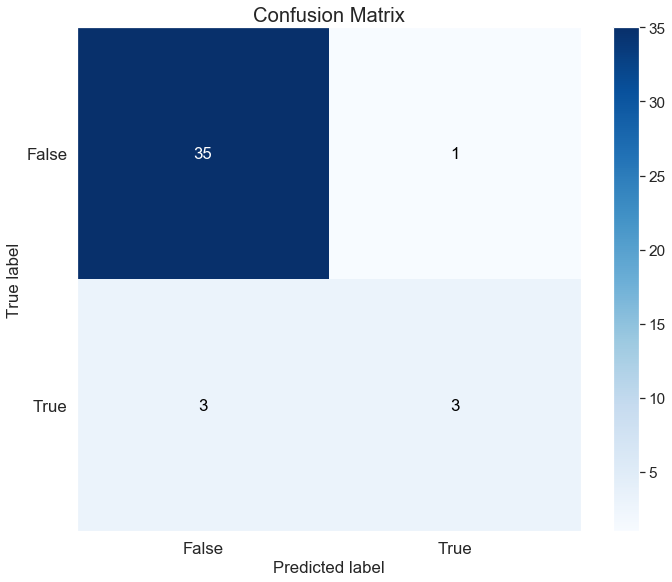

In [51]:
#### Adaboost

start_time = time.time()

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")


sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0


    clf = AdaBoostClassifier(random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
    
print("For AdaBoostClassifier the accuracy score is", np.mean(accuracy_scores))
print("For AdaBoostClassifier the precision score is", np.mean(precision_scores))
print("For AdaBoostClassifier the recall score is", np.mean(recall_scores))
print("For AdaBoostClassifier the f1 score is", np.mean(f1_scores))


print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count

print(confusion_matrices)
    

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)


print("\n elapsed time", time.time() - start_time, "seconds")

Adaboost is an another ensemble technique in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function. Here for this dataset all the average measures are above my expectations (which is above 0.3) and I am talking about the average precision and recall. I have high hopes for adaboost and I will definately use it in the future experiments!

#### KNN Classifier training and evaluation with Default Parameters and Default Number of Features.

For KNeighborsClassifier the accuracy score is 0.8408095238095239
For KNeighborsClassifier the precision score is 0.12369285714285713
For KNeighborsClassifier the recall score is 0.03733333333333333
For KNeighborsClassifier the f1 score is 0.05418624153624153
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.97472222 0.02527778]
 [0.96266667 0.03733333]]

Last iteration Stratified Shuffle Split confusion matrix:

 elapsed time 5.386549711227417 seconds


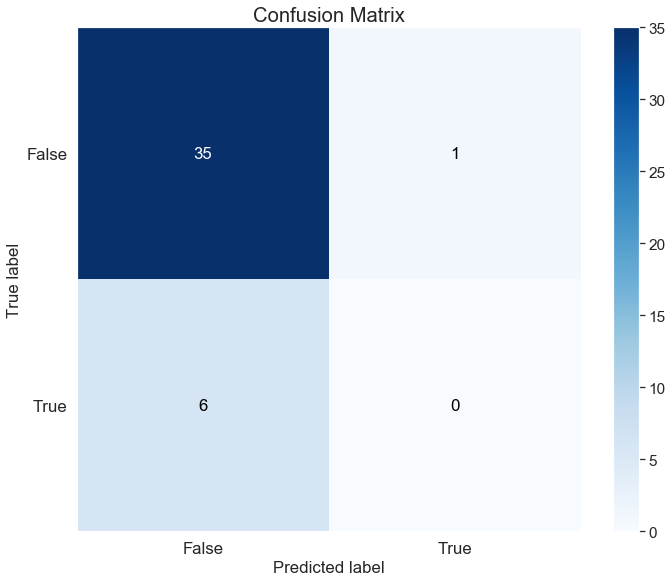

In [49]:
#### kNN

start_time = time.time()

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")


sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0

    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For KNeighborsClassifier the accuracy score is", np.mean(accuracy_scores))
print("For KNeighborsClassifier the precision score is", np.mean(precision_scores))
print("For KNeighborsClassifier the recall score is", np.mean(recall_scores))
print("For KNeighborsClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count

print(confusion_matrices)

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

print("\n elapsed time", time.time() - start_time, "seconds")

The the k-nearest neighbors classifier with default parameters and with the initial number of features shows poor results. I almost misclassify all the POI cases as non-POI based on the normalized confusion matrix and average recall and precision is way below zero.

### Table of all the Score Validations with ML models and default parameters:
Lets gather are results from the average metrics for the 6 ML models that were built to have a clear image for their performance.

| Evaluation Metric | SVM   | Decision Tree Classifier | Gaussian Naive Bayes | Random Forest | Adaboost | k-NN
|------|------|
|Accuracy|0.8558|0.837|0.606|0.871|0.873|0.840|
|Precision|0.0317|0.434|0.265|0.604|0.588|0.123|
|Recall|0.0055|0.400|0.657|0.280|0.447|0.037|
|F1 measure|0.0093|0.396|0.355|0.358|0.484|0.054|

it is clear that the best performed classifiers are the Decision Tree Classifier and the Adaboost based on the their average F1, accuracy, precision and recall. I have high expectations for them in the future and I will definately use them for future experiments. Morever for the rest of the ML models I will continue using them in my experiments in order to see if their performance metrics increase.

## Hyperparameter tuning with the initial default number of features
Except for GaussianNB all the other machine learning models can be tuned to improve their performance. For tuning I will use the method GridSearchCV and 10 Stratified Shuffle Splits during tuning and finally for validating the model for the usual 1000 stratified Shuffle Splits.

#### SVM training and evaluation with Hyperparameter tuning and Default Number of Features.

In [429]:
from sklearn.model_selection import GridSearchCV

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

###### tune and validate model

## SVM tuning
param_grid = {'kernel':['rbf','linear', 'sigmoid'], 
              'gamma':[1e-4,1e-3,1e-2,1e-1,1,1e+1,1e+2,1e+3,1e+4], 
              'C':[1e-4,1e-3,1e-2,1e-1,1,1e+1,1e+2,1e+3,1e+4]}
grid = GridSearchCV(SVC(random_state=42), param_grid=param_grid, cv=sss)
grid.fit(X, y)

## SVM validation
print("For SVM, The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


For SVM, The best parameters are {'C': 10.0, 'gamma': 0.001, 'kernel': 'rbf'} with a score of 0.87


For SVM accuracy score is 0.8645714285714287
For SVM the precision score is 0.36806666666666665
For SVM the recall score is 0.08733333333333333
For SVM the f1 score is 0.1370176046176046
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.99411111 0.00588889]
 [0.91266667 0.08733333]]

Last iteration Stratified Shuffle Split confusion matrix:


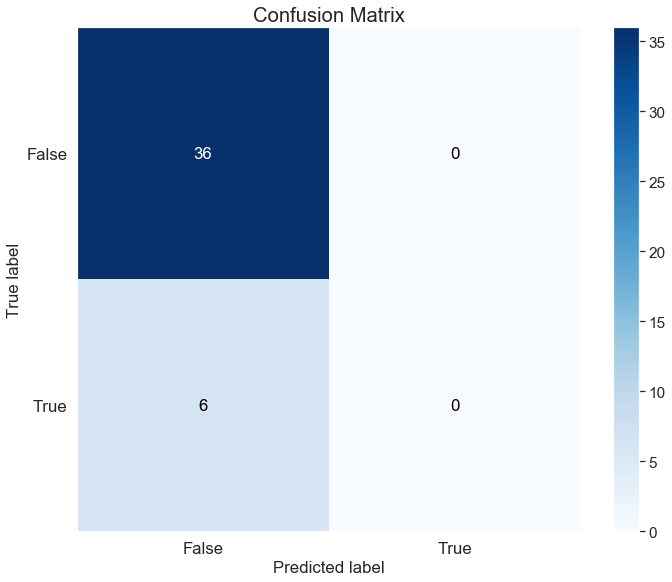

In [430]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0

    clf = SVC(C=10.0, gamma=0.001, kernel="rbf", random_state=42)    
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
    
print("For SVM accuracy score is", np.mean(accuracy_scores))
print("For SVM the precision score is", np.mean(precision_scores))
print("For SVM the recall score is", np.mean(recall_scores))
print("For SVM the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count
print(confusion_matrices)

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

After tuning I can say that SVM improved their precision and passed the threshold of 0.3. However its recall is bellow that limit. Moreover, based on the normalized confusion matrix it stills misclassify all the POI cases as non-POI. 

#### DecisionTreeClassifier training and evaluation with Hyperparameter tuning and Default Number of Features.

In [432]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)


## DecisionTreeClassifier tuning
param_grid = {'criterion':['gini','entropy'], 
              'max_depth':[2,3,4,5,6,7,8,9,10,15,20,25,30], 
              'min_samples_split':[2,3,4,5], 
              'min_samples_leaf':[1,2,3,4],
              'max_features' : [None, 'sqrt', 'log2', 'auto']}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=sss)
grid.fit(X, y)

## DecisionTreeClassifier validation
print("For DecisionTreeClassifier, The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


For DecisionTreeClassifier, The best parameters are {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2} with a score of 0.87


For DecisionTreeClassifier accuracy score is 0.8636666666666667
For DecisionTreeClassifier the precision score is 0.5001783078033079
For DecisionTreeClassifier the recall score is 0.36716666666666664
For DecisionTreeClassifier the f1 score is 0.38604454931033877
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.94641667 0.05358333]
 [0.63283333 0.36716667]]

Last iteration Stratified Shuffle Split confusion matrix:


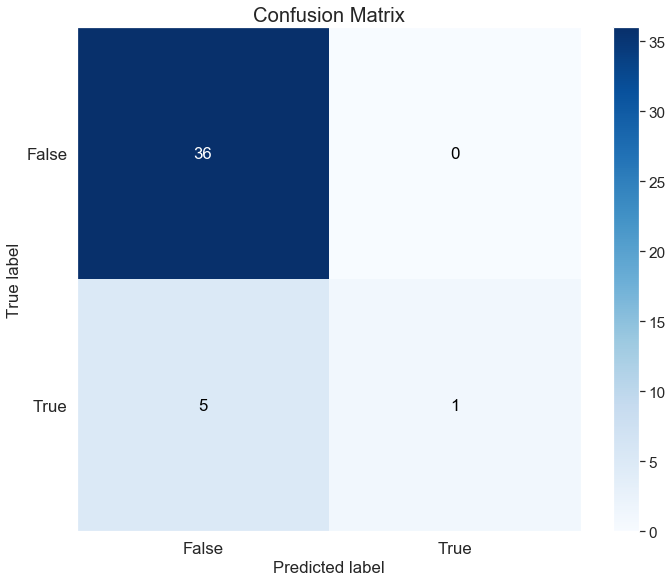

In [435]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0

    clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For DecisionTreeClassifier accuracy score is", np.mean(accuracy_scores))
print("For DecisionTreeClassifier the precision score is", np.mean(precision_scores))
print("For DecisionTreeClassifier the recall score is", np.mean(recall_scores))
print("For DecisionTreeClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count
print(confusion_matrices)

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

After tuning I can say that Decision Tree Classifier improved their precision even more and reach the value of 0.5. There was a drop in the average recall metric which from 0.4 with default parameters to 0.36 but still pass my personal threshold which is above 0.3

#### RandomForestClassifier training and evaluation with Hyperparameter tuning and Default Number of Features.

In [52]:
from sklearn.model_selection import GridSearchCV

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)


###### validate, tune and evaluate ML models

## RandomForestClassifier tuning
param_grid = {'n_estimators':[10,20,30,40], 
              'max_depth':[2,3,4,5,6], 
              'min_samples_split':[2,3,4,5,6], 
              'min_samples_leaf':[1,2,3,4,5,6]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=sss)
grid.fit(X, y)

## RandomForestClassifier best params
print("For RandomForestClassifier, The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

For RandomForestClassifier, The best parameters are {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30} with a score of 0.89


For RandomForestClassifier accuracy score is 0.8740714285714287
For RandomForestClassifier the precision score is 0.6225841269841269
For RandomForestClassifier the recall score is 0.29683333333333334
For RandomForestClassifier the f1 score is 0.3776095432345432
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.97027778 0.02972222]
 [0.70316667 0.29683333]]

Last iteration Stratified Shuffle Split confusion matrix:


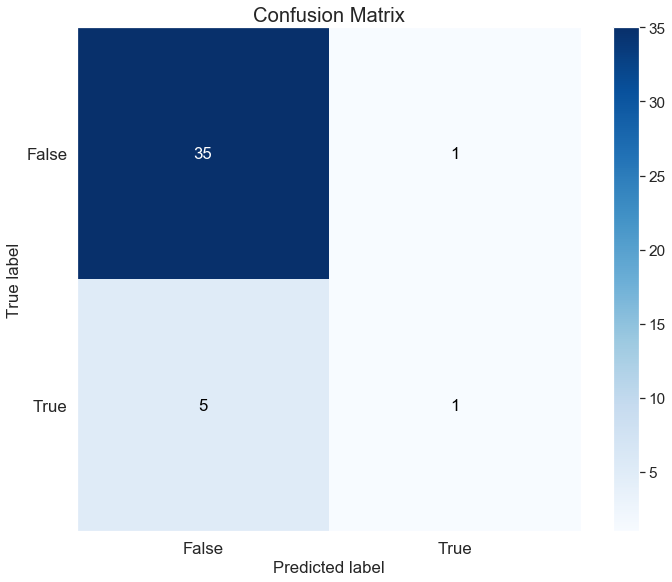

In [439]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)

for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0

    clf = RandomForestClassifier(n_estimators=30, max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For RandomForestClassifier accuracy score is", np.mean(accuracy_scores))
print("For RandomForestClassifier the precision score is", np.mean(precision_scores))
print("For RandomForestClassifier the recall score is", np.mean(recall_scores))
print("For RandomForestClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count
print(confusion_matrices)
    

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

After Tuning RandomForest Classifier, the precision increased by 0.02 but its recall dropped by 0.02. Moreover, it misclassifies the 70% of all the POI cases as non-POI cases. Overall, tuning has not produced any tangible results for random forest classifier.

#### AdaboostClassifier training and evaluation with Hyperparameter tuning and Default Number of Features.

In [440]:
from sklearn.model_selection import GridSearchCV

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

###### validate, tune and evaluate ML models

## RandomForestClassifier tuning
param_grid = {'n_estimators':[20,30,40,50,60,70,80],
             'learning_rate':[1.0, 0.5, 0.1, 0.05, 0.01]}
grid = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid=param_grid, cv=sss)
grid.fit(X, y)

## DecisionTreeClassifier validation
print("For AdaBoostClassifier, The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

For AdaBoostClassifier, The best parameters are {'learning_rate': 0.1, 'n_estimators': 20} with a score of 0.88


For AdaBoostClassifier accuracy score is 0.8825952380952383
For AdaBoostClassifier the precision score is 0.6423596153846154
For AdaBoostClassifier the recall score is 0.39999999999999997
For AdaBoostClassifier the f1 score is 0.4647215816347395
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.96302778 0.03697222]
 [0.6        0.4       ]]

Last iteration Stratified Shuffle Split confusion matrix:


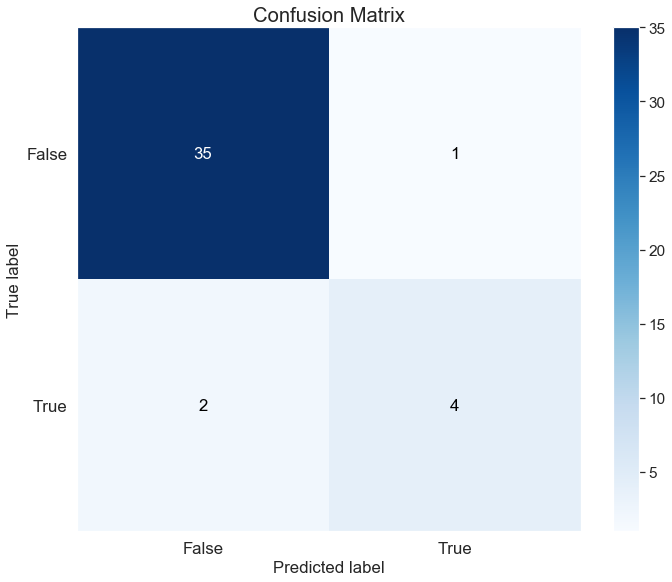

In [442]:
#Adaboost Tuning

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0

    clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=20, random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For AdaBoostClassifier accuracy score is", np.mean(accuracy_scores))
print("For AdaBoostClassifier the precision score is", np.mean(precision_scores))
print("For AdaBoostClassifier the recall score is", np.mean(recall_scores))
print("For AdaBoostClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count
print(confusion_matrices)
    

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

Tuning the Adaboost classifier brought both positive and negative results, the first one is that the precision from 0.588 to 0.644 but the recall decreased from 0.447 to 0.339. But still Adaboost produces satisfactory results due to the fact that it passes the threshold.

#### KNN training and evaluation with Hyperparameter tuning and Default Number of Features.

In [443]:
from sklearn.model_selection import GridSearchCV

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

###### validate, tune and evaluate ML models

## KNeighborsClassifier tuning
param_grid = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14],
             'weights':['uniform', 'distance'],
             'algorithm':['ball_tree', 'kd_tree', 'brute', 'auto']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=sss)
grid.fit(X, y)

## DecisionTreeClassifier validation
print("For KNeighborsClassifier, The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

For KNeighborsClassifier, The best parameters are {'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'uniform'} with a score of 0.86


For kNN accuracy score is 0.8539285714285715
For kNN the precision score is 0.03666666666666667
For kNN the recall score is 0.007666666666666666
For kNN the f1 score is 0.012444444444444442
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.99497222 0.00502778]
 [0.99233333 0.00766667]]

Last iteration Stratified Shuffle Split confusion matrix:


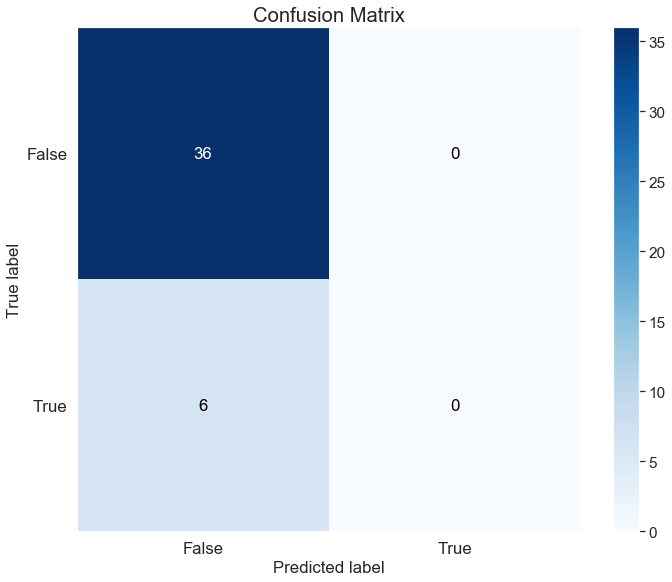

In [447]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)

for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0

    clf = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6, weights='uniform')
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For kNN accuracy score is", np.mean(accuracy_scores))
print("For kNN the precision score is", np.mean(precision_scores))
print("For kNN the recall score is", np.mean(recall_scores))
print("For kNN the f1 score is", np.mean(f1_scores))
print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count
print(confusion_matrices)

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

The KNN optimal tuned model with the initial default parameters continues to produce poor results. It misclassifies 99% of all the POIs as non-POIs during the 1000 iterations of stratified sampling.

### Table of all the Score Validations with ML models with default number of features and with hyperparameter tuning:

|Evaluation Metric / ML Model|SVM|Decision Tree Classifier|Random Forest|Adaboost|k-NN
|------|------|
|Accuracy|0.864|0.863|0.874|0.882|0.853|
|Precision|0.368|0.500|0.622|0.642|0.036|
|Recall|0.087|0.367|0.238|0.399|0.007|
|F1 measure|0.137|0.386|0.377|0.464|0.012|

Still the 2 top ML models that continue to give great results is Decision Tree Classifier and Adaboost, the rest of the ML models, although the tuning the some of the improvements they produced, still they cannot pass my personal threshold for haveing values over 0.3 for both the average accuracy and the recall.

## ML Algorithm Training with default Features and Feature Engineering, Performance Metrics and Hyperparameter Tuning


So far DecisionTreeClassifier, Adaboost shows better performance than the others. We can improve the existed performance by introducing new features. This concept stems from the fact that our dataset is very small right now, it is small than 200 cases and not to forget the outliers that were removed before and the class imbalance that we are facing. By adding more features we can increase the expressiveness of our dataframe. Lets add more features with feature engineering.

So the next step is to create new features from the existing information that could possibly improve performance.

#### Feature Engineering from the email features
After thinking about the background of the Enron case and the information to work with contained in the dataset, I decided on three new features to create from the email metadata. 
- The first will be the ratio of emails to an individual from a person of interest to all emails addressed to that person.
- The second is the same but for messages to persons of interest
- And the third will be the ratio of email receipts shared with a person of interest to all emails addressed to that individual. 

The thinking behind these choices is that the absolute number of emails from or to a POI might not matter so much as the relative number considering the total emails an individual sends or receives. I believe that individuals who interact more with a person of interest (as indicated by emails) are themselves more likely to be a POI.

#### Feature Engineering from the financial Features
I will also create new features using the financial data. I believe that people recieving large bonuses may be more likely to be POI because the bonuses could be a result of fraudulent activities. It would be easier to pass off illegal funds as a bonus rather than a salary raise. The two new features will be the following: 
- bonus in relation to (ratio) to the salary 
- bonus in relation to (ratio) total payments

In [17]:
# feature engineering from email data

df_without_outliers_names_and_email_addresses_and_feature_engineered = df_without_outliers_names_and_email_addresses.copy()

df_without_outliers_names_and_email_addresses_and_feature_engineered["poi_ratio"] = (df['from_poi_to_this_person'] + df['from_this_person_to_poi']) / (df['to_messages'] + df['from_messages'])

df_without_outliers_names_and_email_addresses_and_feature_engineered["fraction_to_poi"] = (df['from_this_person_to_poi']) / (df['from_messages'])
        
df_without_outliers_names_and_email_addresses_and_feature_engineered["fraction_from_poi"] = (df['from_poi_to_this_person']) / (df['to_messages'])

In [118]:
# feature engineering from financial data

df_without_outliers_names_and_email_addresses_and_feature_engineered['bonus_to_salary'] = df['bonus'] / df['salary']

df_without_outliers_names_and_email_addresses_and_feature_engineered['bonus_to_total'] = df['bonus'] / df['total_payments']

#### Histograms of the new engineered features
Lets view the histograms of all the newly created features

#### Histograms of the newly created from financial data

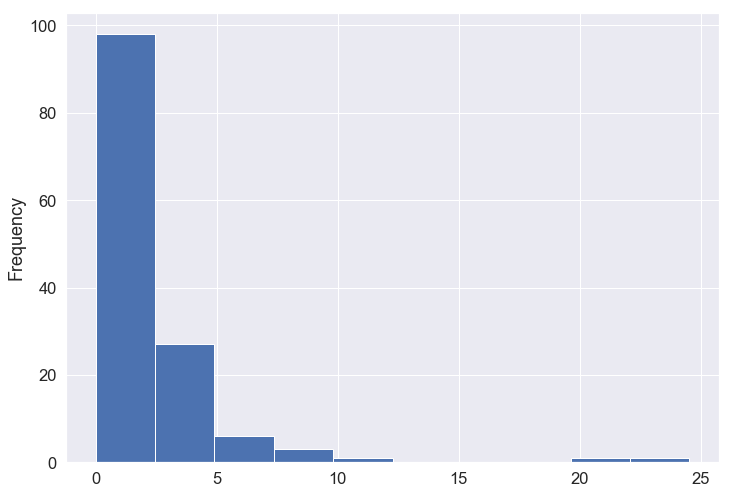

In [26]:

# fill na with zero
df_without_outliers_names_and_email_addresses_and_feature_engineered.bonus_to_salary = df_without_outliers_names_and_email_addresses_and_feature_engineered.bonus_to_salary.fillna(0)


df_without_outliers_names_and_email_addresses_and_feature_engineered.bonus_to_salary.plot.hist()

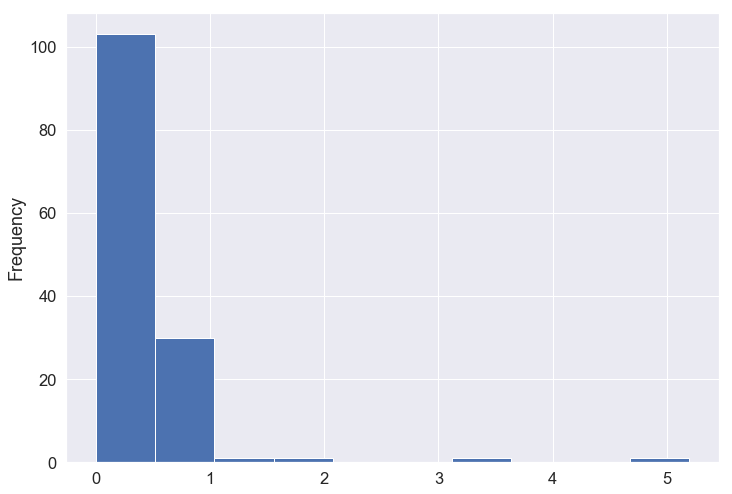

In [121]:

# fill na with zero
df_without_outliers_names_and_email_addresses_and_feature_engineered.bonus_to_total = df_without_outliers_names_and_email_addresses_and_feature_engineered.bonus_to_total.fillna(0)


df_without_outliers_names_and_email_addresses_and_feature_engineered.bonus_to_total.plot.hist()

#### Histograms of the newly created from email data

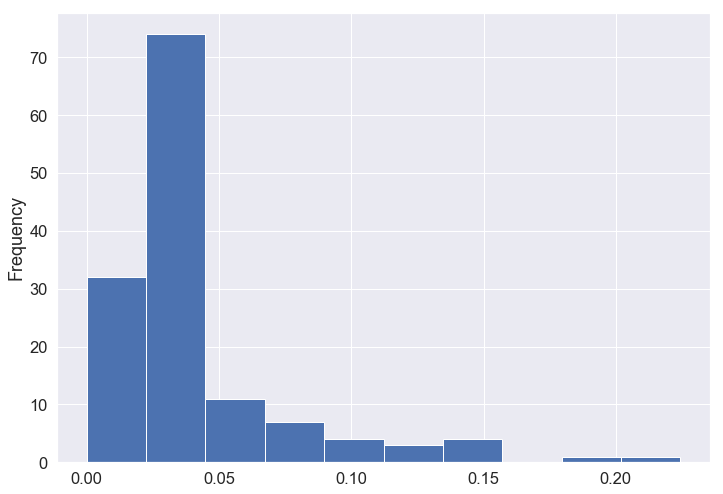

In [123]:
df_without_outliers_names_and_email_addresses_and_feature_engineered.poi_ratio.plot.hist()

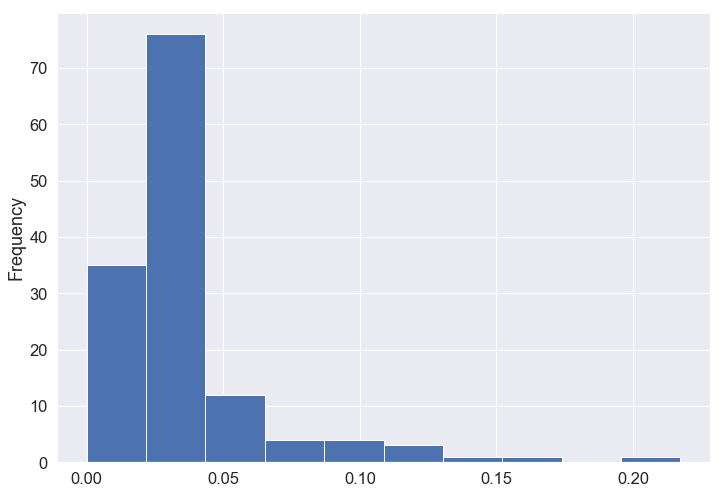

In [125]:
df_without_outliers_names_and_email_addresses_and_feature_engineered.fraction_from_poi.plot.hist()

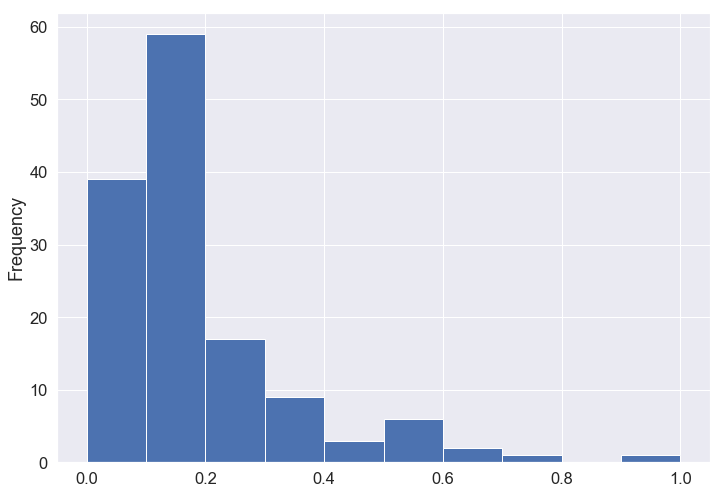

In [128]:
df_without_outliers_names_and_email_addresses_and_feature_engineered.fraction_to_poi.plot.hist()

All the distributions from the newly created features are right skewed and they must be scaled with MinMaxScaler

#### Data preparation before building ML models, scaling

In [131]:
# Scale the dataset and send it back to a dictionary
scaled_df = df_without_outliers_names_and_email_addresses_and_feature_engineered
scaled_df = scale(scaled_df)

scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = df_without_outliers_names_and_email_addresses_and_feature_engineered.columns
#scaled_df["poi"] = df_without_outliers["poi"]

scaled_df.insert(loc=0, column='poi', value=df_without_outliers["poi"].values)


X = np.array(scaled_df.drop(["poi"], axis=1))
y = np.array(scaled_df["poi"])

#### SVM training and evaluation with Default Parameters and Default Number of Features with Engineered Features.

For SVM the accuracy score is 0.8554047619047619
For SVM the precision score is 0.0015
For SVM the recall score is 0.0005
For SVM the f1 score is 0.00075
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[9.97888889e-01 2.11111111e-03]
 [9.99500000e-01 5.00000000e-04]]

Last iteration Stratified Shuffle Split confusion matrix:


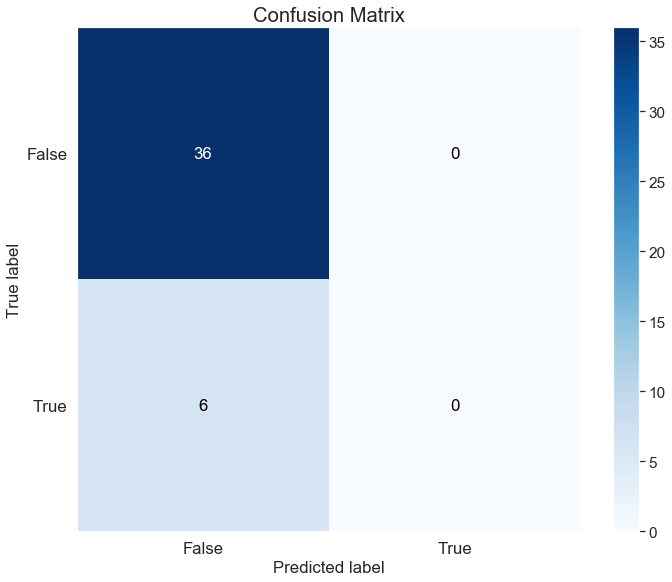

In [97]:
## SVM evaluation

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) <-- Its no use, since leads to imbalanced splits

    clf = SVC(random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For SVM the accuracy score is", np.mean(accuracy_scores))
print("For SVM the precision score is", np.mean(precision_scores))
print("For SVM the recall score is", np.mean(recall_scores))
print("For SVM the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count

print(confusion_matrices)

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

Still with the introduction of the new engineered features, SVM performs poorly.

#### DecisionTreeClassifier training and evaluation with Default Parameters and Default Number of Features with Engineered Features.

For DecisionTreeClassifier the accuracy score is 0.8662857142857144
For DecisionTreeClassifier the precision score is 0.5506226745476746
For DecisionTreeClassifier the recall score is 0.5298333333333334
For DecisionTreeClassifier the f1 score is 0.5169312380859594
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.92236111 0.07763889]
 [0.47016667 0.52983333]]

Last iteration Stratified Shuffle Split confusion matrix:


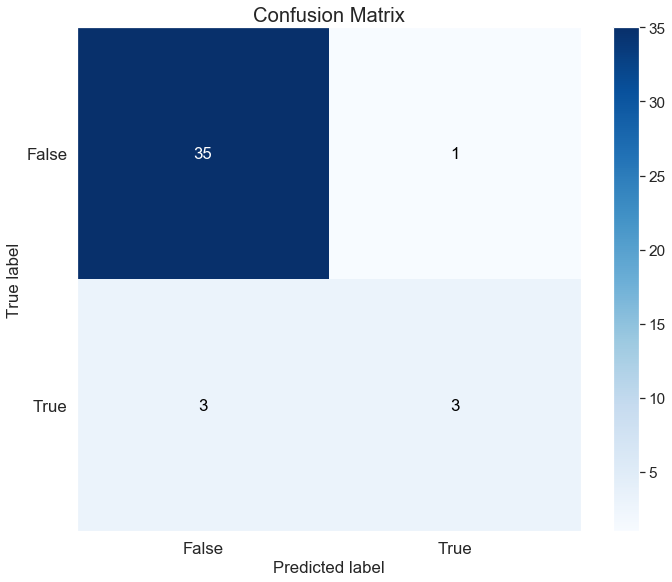

In [98]:
## DecisionTreeClassifier evaluation
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) <-- Its no use, since leads to imbalanced splits

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For DecisionTreeClassifier the accuracy score is", np.mean(accuracy_scores))
print("For DecisionTreeClassifier the precision score is", np.mean(precision_scores))
print("For DecisionTreeClassifier the recall score is", np.mean(recall_scores))
print("For DecisionTreeClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count

print(confusion_matrices)

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

Decision Tree classifier continues to perform very well, the average accuracy, precision, recall and f1 score metrics passed my personal threshold limit which is the 0.3.

#### GaussianNB training and evaluation with Default Parameters and Default Number of Features with Engineered Features.

For GaussianNB the accuracy score is 0.6341190476190476
For GaussianNB the precision score is 0.27583553128237925
For GaussianNB the recall score is 0.6076666666666666
For GaussianNB the f1 score is 0.35328574441854094
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.63852778 0.36147222]
 [0.39233333 0.60766667]]

Last iteration Stratified Shuffle Split confusion matrix:


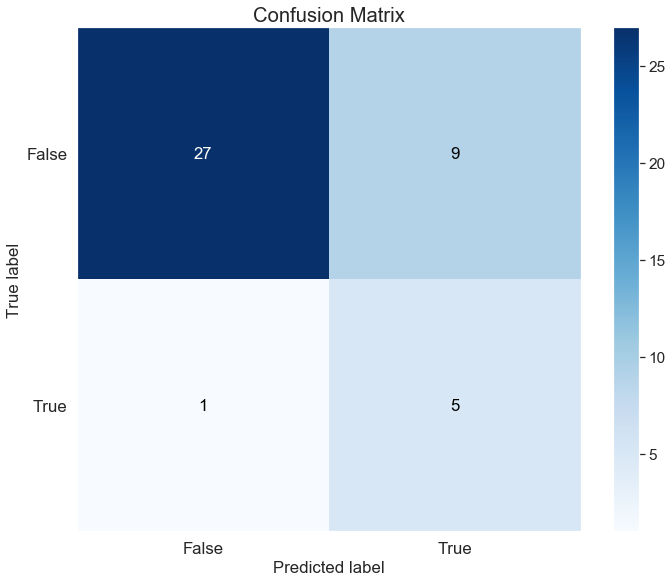

In [99]:
## GaussianNB evaluation

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) <-- Its no use, since leads to imbalanced splits

    clf = GaussianNB()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For GaussianNB the accuracy score is", np.mean(accuracy_scores))
print("For GaussianNB the precision score is", np.mean(precision_scores))
print("For GaussianNB the recall score is", np.mean(recall_scores))
print("For GaussianNB the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count

print(confusion_matrices)

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

Unfortunately Gaussian Naive Bayes has low average precision score, it is below my personal threshold which is the 0.3.

#### RandomForestClassifier training and evaluation with Default Parameters and Default Number of Features with Engineered Features.

For RandomForestClassifier the accuracy score is 0.8805952380952383
For RandomForestClassifier the precision score is 0.6754765873015873
For RandomForestClassifier the recall score is 0.2833333333333334
For RandomForestClassifier the f1 score is 0.37442951492951493
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.98013889 0.01986111]
 [0.71666667 0.28333333]]

Last iteration Stratified Shuffle Split confusion matrix:


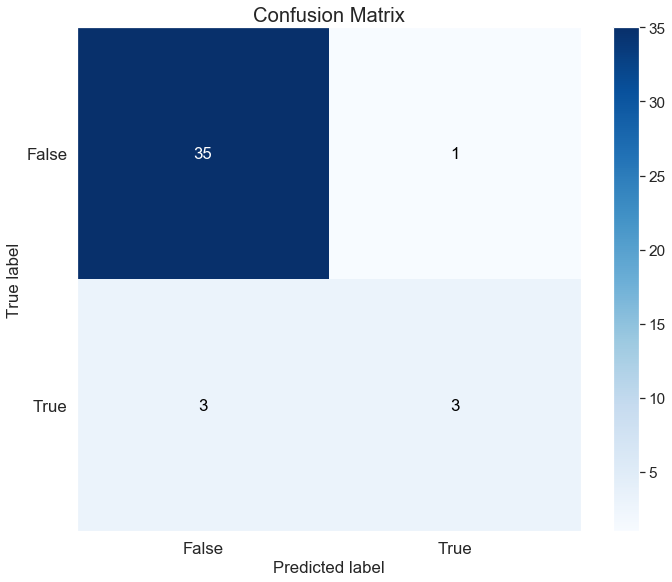

In [100]:
## RandomForestClassifier evaluation

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) <-- Its no use, since leads to imbalanced splits

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For RandomForestClassifier the accuracy score is", np.mean(accuracy_scores))
print("For RandomForestClassifier the precision score is", np.mean(precision_scores))
print("For RandomForestClassifier the recall score is", np.mean(recall_scores))
print("For RandomForestClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count

print(confusion_matrices)

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

RandomForest Classifier, has great average accuracy and precision, however its recall is below 0.3

#### AdaboostClassfier training and evaluation with Default Parameters and Default Number of Features with Engineered Features.

For AdaBoostClassifier the accuracy score is 0.8866190476190478
For AdaBoostClassifier the precision score is 0.652109879009879
For AdaBoostClassifier the recall score is 0.5253333333333333
For AdaBoostClassifier the f1 score is 0.5527644220846232
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.94683333 0.05316667]
 [0.47466667 0.52533333]]

Last iteration Stratified Shuffle Split confusion matrix:


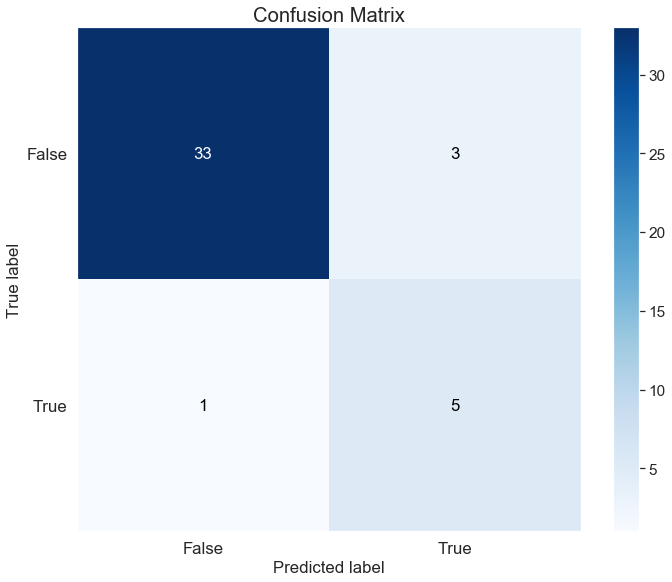

In [101]:
## AdaBoostClassifier evaluation

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) <-- Its no use, since leads to imbalanced splits

    clf = AdaBoostClassifier(random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For AdaBoostClassifier the accuracy score is", np.mean(accuracy_scores))
print("For AdaBoostClassifier the precision score is", np.mean(precision_scores))
print("For AdaBoostClassifier the recall score is", np.mean(recall_scores))
print("For AdaBoostClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count

print(confusion_matrices)

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

Once again, Adaboost classifier, continues to perform pretty well, every average validation metric passed my personal threshold which is above 0.3. 

#### KNN training and evaluation with Default Parameters and Default Number of Features with Engineered Features.

For KNeighborsClassifier the accuracy score is 0.8588809523809525
For KNeighborsClassifier the precision score is 0.42188809523809523
For KNeighborsClassifier the recall score is 0.11583333333333334
For KNeighborsClassifier the f1 score is 0.17450347985347986
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.98272222 0.01727778]
 [0.88416667 0.11583333]]

Last iteration Stratified Shuffle Split confusion matrix:


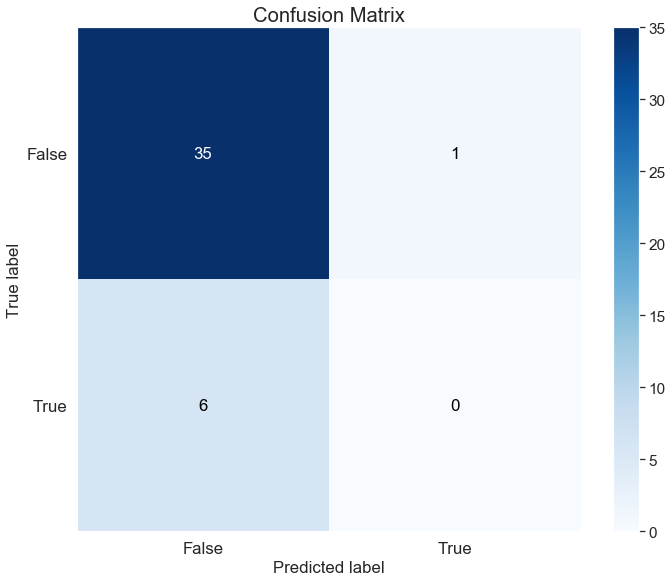

In [102]:
## KNN evaluation

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) <-- Its no use, since leads to imbalanced splits

    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For KNeighborsClassifier the accuracy score is", np.mean(accuracy_scores))
print("For KNeighborsClassifier the precision score is", np.mean(precision_scores))
print("For KNeighborsClassifier the recall score is", np.mean(recall_scores))
print("For KNeighborsClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count

print(confusion_matrices)

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

KNN with the initial and the engineered continues to perform poorly, it misclassifies 88% of the POIs as non-POIs cases based of the normalized confusion matrix.

### Table of all the Score Validations with ML models with default number of features and with new engineered features and with default ML parameters:

|Evaluation Metric / ML Model|SVM|Decision Tree Classifier|Gaussian Naive Bayes|Random Forest|Adaboost|k-NN
|------|------|
|Accuracy|0.855|0.866|0.634|0.880|0.886|0.858|
|Precision|0.001|0.550|0.275|0.675|0.652|0.421|
|Recall|0.0005|0.529|0.607|0.283|0.525|0.115|
|F1 measure|0.00075|0.516|0.353|0.374|0.552|0.174|

I do not want to comment about SVM, Gaussian Naive Bayes, Random Forest and KNN models, although the introduction of the new engineered features they still perform poorly. Moreover, both Decision Tree Classifier and Adaboost Classifier have decreased their performance, however their average recall metric has increased. 

## Tuning ML Algorithms after feature Engineering

#### SVM training and evaluation with Hyperparameter Tuning and Default Number of Features with Engineered Features.

In [103]:
from sklearn.model_selection import GridSearchCV

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

###### tune and validate model

## SVM tuning
param_grid = {'kernel':['rbf','linear', 'sigmoid'], 
              'gamma':[1e-4,1e-3,1e-2,1e-1,1,1e+1,1e+2,1e+3,1e+4], 
              'C':[1e-4,1e-3,1e-2,1e-1,1,1e+1,1e+2,1e+3,1e+4]}
grid = GridSearchCV(SVC(random_state=42), param_grid=param_grid, cv=sss)
grid.fit(X, y)

## SVM validation
print("For SVM, The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

For SVM, The best parameters are {'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'} with a score of 0.87


For SVM accuracy score is 0.8635000000000003
For SVM the precision score is 0.5511
For SVM the recall score is 0.2105
For SVM the f1 score is 0.2866356754356755
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.97233333 0.02766667]
 [0.7895     0.2105    ]]

Last iteration Stratified Shuffle Split confusion matrix:


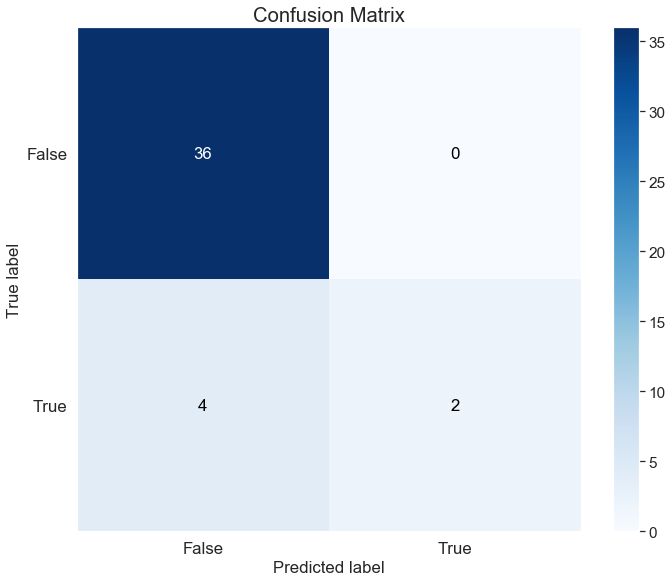

In [104]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0

    clf = SVC(C=0.1, gamma=0.0001, kernel="linear", random_state=42)    
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
    
print("For SVM accuracy score is", np.mean(accuracy_scores))
print("For SVM the precision score is", np.mean(precision_scores))
print("For SVM the recall score is", np.mean(recall_scores))
print("For SVM the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count
print(confusion_matrices)

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

With the initial and engineered features and with an SVM tuned model I can say that I am impressed, the precision has risen, however the recall for me is pretty low and below 0.3, my personal target threshold.

#### DecisionTreeClassifier training and evaluation with Hyperparameter Tuning and Default Number of Features with Engineered Features.

In [105]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)


## DecisionTreeClassifier tuning
param_grid = {'criterion':['gini','entropy'], 
              'max_depth':[2,3,4,5,6,7,8,9,10,15,20,25,30], 
              'min_samples_split':[2,3,4,5], 
              'min_samples_leaf':[1,2,3,4],
              'max_features' : [None, 'sqrt', 'log2', 'auto']}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=sss)
grid.fit(X, y)

## DecisionTreeClassifier validation
print("For DecisionTreeClassifier, The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


For DecisionTreeClassifier, The best parameters are {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2} with a score of 0.91


For DecisionTreeClassifier accuracy score is 0.8862857142857145
For DecisionTreeClassifier the precision score is 0.6166030164280164
For DecisionTreeClassifier the recall score is 0.5623333333333332
For DecisionTreeClassifier the f1 score is 0.5573547728759028
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.94027778 0.05972222]
 [0.43766667 0.56233333]]

Last iteration Stratified Shuffle Split confusion matrix:


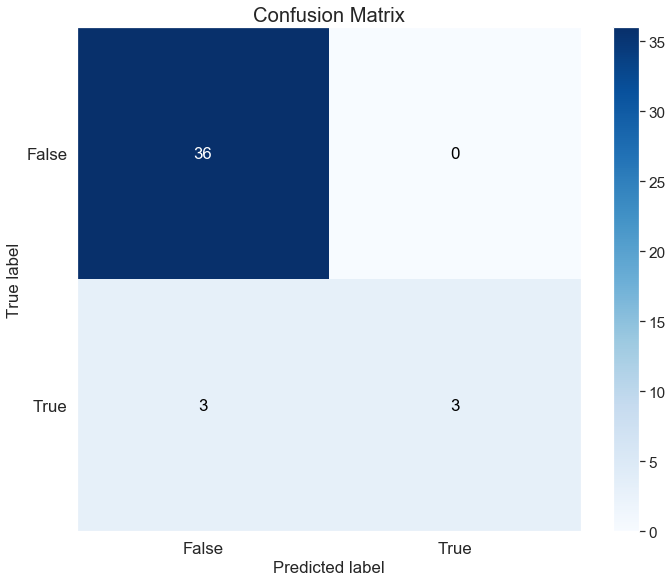

In [106]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0

    clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For DecisionTreeClassifier accuracy score is", np.mean(accuracy_scores))
print("For DecisionTreeClassifier the precision score is", np.mean(precision_scores))
print("For DecisionTreeClassifier the recall score is", np.mean(recall_scores))
print("For DecisionTreeClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count
print(confusion_matrices)

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

Decision Tree Classifier continues to provide expectional validation performance, but there is a tradeoff, after tuning the average precision increased its value from the previous one without tuning and respectively the average recall decreased.

#### RandonForestClassifier training and evaluation with Hyperparameter Tuning and Default Number of Features with Engineered Features.

In [107]:
from sklearn.model_selection import GridSearchCV

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)


###### validate, tune and evaluate ML models

## RandomForestClassifier tuning
param_grid = {'n_estimators':[10,20,30,40], 
              'max_depth':[2,3,4,5,6], 
              'min_samples_split':[2,3,4,5,6], 
              'min_samples_leaf':[1,2,3,4,5,6]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=sss)
grid.fit(X, y)

## RandomForestClassifier best params
print("For RandomForestClassifier, The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

For RandomForestClassifier, The best parameters are {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20} with a score of 0.89


For RandomForestClassifier accuracy score is 0.8866904761904764
For RandomForestClassifier the precision score is 0.7208710317460318
For RandomForestClassifier the recall score is 0.318
For RandomForestClassifier the f1 score is 0.416280574980575
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.98147222 0.01852778]
 [0.682      0.318     ]]

Last iteration Stratified Shuffle Split confusion matrix:


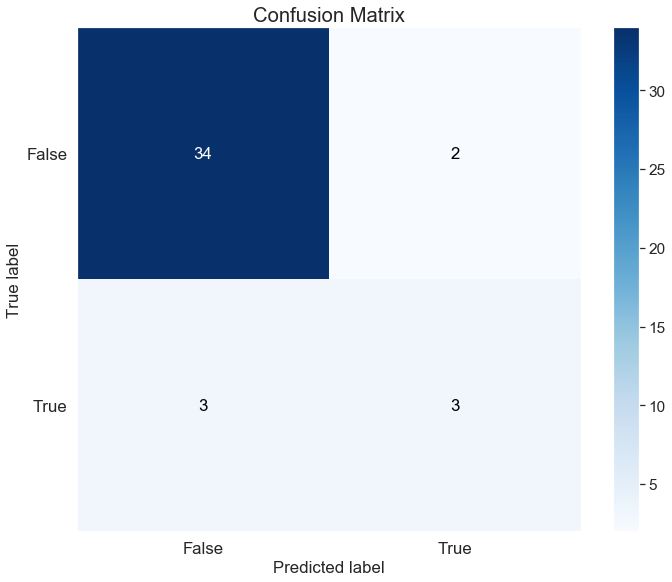

In [108]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)

for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0

    clf = RandomForestClassifier(n_estimators=20, max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For RandomForestClassifier accuracy score is", np.mean(accuracy_scores))
print("For RandomForestClassifier the precision score is", np.mean(precision_scores))
print("For RandomForestClassifier the recall score is", np.mean(recall_scores))
print("For RandomForestClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count
print(confusion_matrices)
    

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

With the addition of the new features Random Forest starts to increase its performance and its prediction ability to identify POIs. Both its precision and recall increased and passed my personal threshold which is the value of 0.3.

#### AdaboostClassifier training and evaluation with Hyperparameter Tuning and Default Number of Features with Engineered Features.

In [109]:
from sklearn.model_selection import GridSearchCV

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

###### validate, tune and evaluate ML models

## RandomForestClassifier tuning
param_grid = {'n_estimators':[20,30,40,50,60,70,80],
             'learning_rate':[1.0, 0.5, 0.1, 0.05, 0.01]}
grid = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid=param_grid, cv=sss)
grid.fit(X, y)

## DecisionTreeClassifier validation
print("For AdaBoostClassifier, The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

For AdaBoostClassifier, The best parameters are {'learning_rate': 0.1, 'n_estimators': 50} with a score of 0.91


For AdaBoostClassifier accuracy score is 0.8983095238095241
For AdaBoostClassifier the precision score is 0.7052660894660894
For AdaBoostClassifier the recall score is 0.5375
For AdaBoostClassifier the f1 score is 0.582761707083766
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.95844444 0.04155556]
 [0.4625     0.5375    ]]

Last iteration Stratified Shuffle Split confusion matrix:


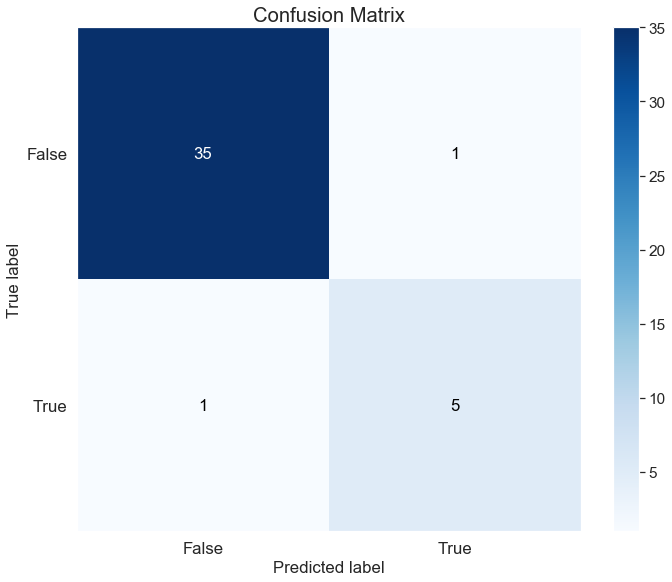

In [110]:
# Adaboost Tuning

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0

    clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=50, random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For AdaBoostClassifier accuracy score is", np.mean(accuracy_scores))
print("For AdaBoostClassifier the precision score is", np.mean(precision_scores))
print("For AdaBoostClassifier the recall score is", np.mean(recall_scores))
print("For AdaBoostClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count
print(confusion_matrices)
    

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

Once again, Adaboost does not surprice me, it is a very robust algorithm especially with the tuning that increased its average precision even more.

#### KNN training and evaluation with Hyperparameter Tuning and Default Number of Features with Engineered Features.

In [111]:
from sklearn.model_selection import GridSearchCV

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

###### validate, tune and evaluate ML models

## KNeighborsClassifier tuning
param_grid = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14],
             'weights':['uniform', 'distance'],
             'algorithm':['ball_tree', 'kd_tree', 'brute', 'auto']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=sss)
grid.fit(X, y)

## DecisionTreeClassifier validation
print("For KNeighborsClassifier, The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

For KNeighborsClassifier, The best parameters are {'algorithm': 'ball_tree', 'n_neighbors': 2, 'weights': 'distance'} with a score of 0.86


For kNN accuracy score is 0.8695714285714288
For kNN the precision score is 0.5909148268398268
For kNN the recall score is 0.44266666666666665
For kNN the f1 score is 0.48249868921927747
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.94072222 0.05927778]
 [0.55733333 0.44266667]]

Last iteration Stratified Shuffle Split confusion matrix:


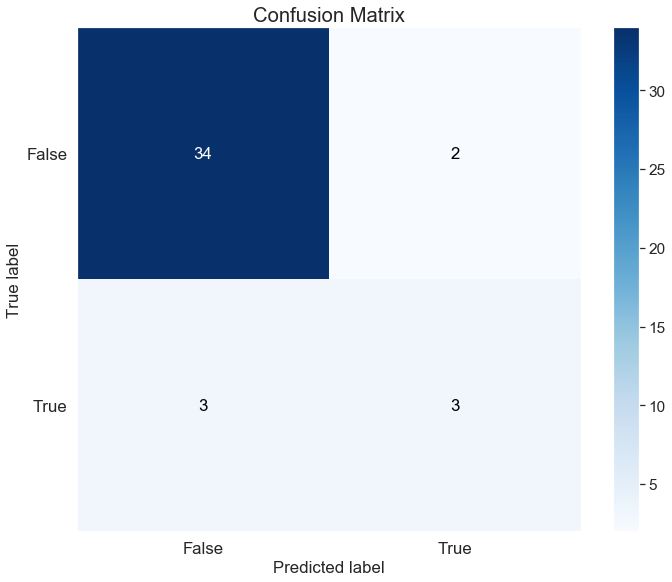

In [112]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)

for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0

    clf = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2, weights='distance')
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For kNN accuracy score is", np.mean(accuracy_scores))
print("For kNN the precision score is", np.mean(precision_scores))
print("For kNN the recall score is", np.mean(recall_scores))
print("For kNN the f1 score is", np.mean(f1_scores))
print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count
print(confusion_matrices)

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

KNN is the another big surprise, like the Random Forest Classifier and here the introduction of the new engineered features was beneficial for the algorithm and combined with the hyperparameter tuning it increased its average validation metrics and passed my personal threshold (0.3).

### Table of all the Score Validations with ML models with default number of features and with new engineered features and with hyperparameter tuning:

|Evaluation Metric / ML Model|SVM|Decision Tree Classifier|Random Forest|Adaboost|k-NN
|------|------|
|Accuracy|0.863|0.886|0.886|0.898|0.869|
|Precision|0.551|0.616|0.720|0.705|0.590|
|Recall|0.210|0.562|0.318|0.537|0.442|
|F1 measure|0.286|0.557|0.416|0.582|0.482|

Here we have now some interesting results, as usual the DecisionTree Classifier and the Adaboost classifier keeps to provide execellent performance with tuned parameters together with initial and engineered features, but now the KNN and the Random Forest after tuning show some valuable results. 

# ML Algorithm Training with Default Features Feature Engineering and Feature Selection,  Performance Metrics, Hyperparameter Tuning

From now on I will rule out some ML models for my experiments. I will stop working with SVM and Naive Bayes because they do not perform well regardless the effort I put through. I am very worried about Random Forest Classifier and KNN, they both struggled to pass my personal threshold which is above 0.3 for all the average validation metrics, Hence I will rule them out too. Hence I will continue to work with Decision Tree classifier and Adaboost that exceed my expectations even from the first test.

Now I will continue with Feature Selection based on Feature Importances. By reducing the number of features I can reduce the training time for the ML models and may improve their performance.

There are many methods for feature selection in sklearn. One is to look at the feature importances for a classifier and modify the list of features to exclude those with an importance passed a chosen threshold. Another is to use SelectKBest and have the k-best features, defined by the amount of variance explained.

I will start by looking at the feature importances for both the DecisionTree and the AdaBoost Classifier

#### Rebuilding the DecisionTree Classifier with default parameters and with initial and engineered features

For DecisionTreeClassifier accuracy score is 0.8662857142857144
For DecisionTreeClassifier the precision score is 0.5506226745476746
For DecisionTreeClassifier the recall score is 0.5298333333333334
For DecisionTreeClassifier the f1 score is 0.5169312380859594
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.92236111 0.07763889]
 [0.47016667 0.52983333]]

Last iteration Stratified Shuffle Split confusion matrix:


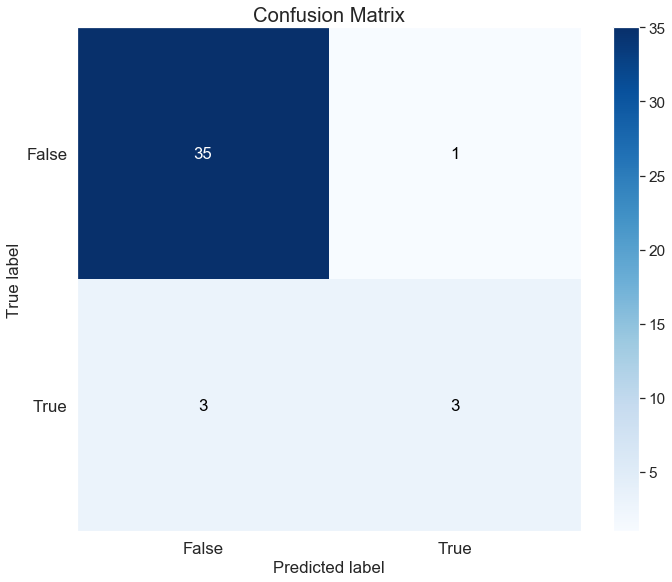

In [113]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0

    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    pred = tree_clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For DecisionTreeClassifier accuracy score is", np.mean(accuracy_scores))
print("For DecisionTreeClassifier the precision score is", np.mean(precision_scores))
print("For DecisionTreeClassifier the recall score is", np.mean(recall_scores))
print("For DecisionTreeClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count
print(confusion_matrices)
    

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

#### Rebuilding the default Adaboost Classifier with default parameters and with initial and engineered features

For AdaBoostClassifier accuracy score is 0.8866190476190478
For AdaBoostClassifier the precision score is 0.652109879009879
For AdaBoostClassifier the recall score is 0.5253333333333333
For AdaBoostClassifier the f1 score is 0.5527644220846232
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.94683333 0.05316667]
 [0.47466667 0.52533333]]

Last iteration Stratified Shuffle Split confusion matrix:


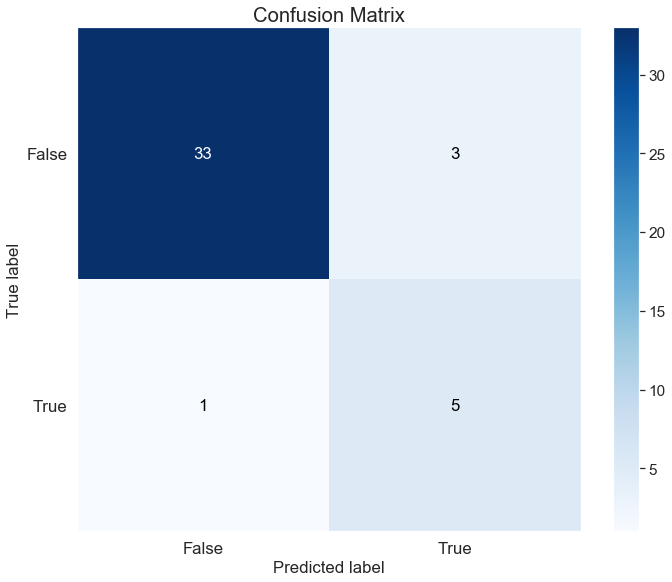

In [114]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0

    boost_clf = AdaBoostClassifier(random_state=42)
    boost_clf.fit(X_train, y_train)
    pred = boost_clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For AdaBoostClassifier accuracy score is", np.mean(accuracy_scores))
print("For AdaBoostClassifier the precision score is", np.mean(precision_scores))
print("For AdaBoostClassifier the recall score is", np.mean(recall_scores))
print("For AdaBoostClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count
print(confusion_matrices)
    

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

#### Feature Importances from DecisionTree Classifier

In [115]:
# feature Selection based on Feature Importances from DecisionTree

tree_feature_importances = (tree_clf.feature_importances_)
tree_features = zip(tree_feature_importances, df_without_outliers_names_and_email_addresses.columns)
tree_features = sorted(tree_features, key= lambda x:x[0], reverse=True)

# Display the feature names and importance values
print('DecisionTree Feature Importances:\n')
for i in range(9):
    print('{} : {:.4f}'.format(tree_features[i][1], tree_features[i][0]))



DecisionTree Feature Importances:

shared_receipt_with_poi : 0.3837
long_term_incentive : 0.0755
exercised_stock_options : 0.0636
expenses : 0.0477
total_stock_value : 0.0404
salary : 0.0000
to_messages : 0.0000
deferral_payments : 0.0000
total_payments : 0.0000


#### Feature Importances from Adaboost Classifier

In [116]:
# feature Selection based on Feature Importances

boost_feature_importances = (boost_clf.feature_importances_)
boost_features = zip(boost_feature_importances, df_without_outliers_names_and_email_addresses.columns)
boost_features = sorted(boost_features, key= lambda x:x[0], reverse=True)

# Display the feature names and importance values
print('Adaboost Feature Importances:\n')
for i in range(9):
    print('{} : {:.4f}'.format(boost_features[i][1], boost_features[i][0]))




Adaboost Feature Importances:

deferred_income : 0.1600
expenses : 0.1400
shared_receipt_with_poi : 0.1000
exercised_stock_options : 0.0800
total_stock_value : 0.0400
from_messages : 0.0400
from_this_person_to_poi : 0.0400
long_term_incentive : 0.0400
restricted_stock : 0.0400


Both the Feature Importances between Decision Tree Classifier and Adaboost Classifier do not agree each other. In order to continue with feature selection I will use the SelectKBest method from sklearn. I will use GridSearchCV with SelectKBest to find the optimal number of features for the classifiers.

#### Scoring Features with ANOVA F-value between label/feature
SelectKBest defaults to scoring parameters using the ANOVA F-value which is a measure of variation between sample means. It describes how much of the variance between labels is explained by a particular feature. A higher value therefore means that there is more variation in that feature between person of interests and non persons of interest. The following table summarizes the ANOVA F-Value returned by SelectKBest.

In [132]:
from sklearn.feature_selection import SelectKBest

selector=SelectKBest(k=len(df_without_outliers_names_and_email_addresses_and_feature_engineered.columns))
selector.fit(X,y)

k_best_features_scores = pd.DataFrame([df_without_outliers_names_and_email_addresses_and_feature_engineered.columns, selector.scores_]).transpose()
k_best_features_scores.columns = ["feature", "score"]
k_best_features_scores = k_best_features_scores.sort_values("score", ascending=False).reset_index(drop=True)
k_best_features_scores

feature      score
0                       bonus    36.4026
1                      salary    27.2134
2           total_stock_value     26.548
3     exercised_stock_options    26.3364
4     shared_receipt_with_poi     25.098
5             fraction_to_poi    24.2406
6              bonus_to_total    20.6902
7     from_poi_to_this_person     19.891
8             deferred_income    17.9649
9             bonus_to_salary    16.9776
10        long_term_incentive    13.1308
11           restricted_stock    10.9354
12             total_payments    9.51199
13                      other    7.70388
14              loan_advances     6.8874
15                   expenses    6.41791
16    from_this_person_to_poi    5.43012
17                to_messages    4.93735
18                  poi_ratio    4.90384
19          fraction_from_poi     2.3291
20              director_fees    2.24572
21  restricted_stock_deferred   0.073181
22              from_messages  0.0424472
23          deferral_payments  0.0111842

based on the table above I will now use GridSearchCV method from sklearn to find the **top K** features per ML model (Decision Tree Classifier / Adaboost). The number of the top K features will be selected per ML model is the one that will maximize the F1-score from GridSearchCV.

#### Finding the optimal number of features for DecisionTree classifier

In [118]:
from sklearn.pipeline import Pipeline

n_features = np.arange(1, len(df_without_outliers_names_and_email_addresses_and_feature_engineered.columns))
# Create a pipeline of feature selection and classifier
pipe = Pipeline([
    ('select_features', SelectKBest()),
    ('classify', DecisionTreeClassifier(random_state=42))
])

param_grid = [
    {
        'select_features__k': n_features
    }
]


sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

# Use GridSearchCV to automate the process of finding the optimal number of features
tree_clf= GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv = sss)
tree_clf.fit(X, y)
tree_clf.best_params_

{'select_features__k': 10}

#### Hyperparameter tuning for DecisionTree Classifier after feature selection

In [119]:
n_features = np.arange(1, len(df_without_outliers_names_and_email_addresses.columns))
# Create a pipeline of feature selection and classifier
pipe = Pipeline([
    ('select_features', SelectKBest(k=10)),
    ('classify', DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'classify__criterion' : ['gini', 'entropy'], 
    'classify__min_samples_split' : [2,3,4,5,6,7,8,9,10,12,14,16,18,20],
    'classify__max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20],
    'classify__max_features' : ['sqrt', 'log2', 'auto']
    }

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

# Use GridSearchCV to automate the process of finding the optimal number of features
tree_clf= GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv = sss)
tree_clf.fit(X, y)
tree_clf.best_params_

{'classify__criterion': 'entropy',
 'classify__max_depth': 7,
 'classify__max_features': 'sqrt',
 'classify__min_samples_split': 2}

#### Preparing data before DecisionTree Training, selecting KBest Features, scaling

In [120]:
df_tree = df_without_outliers_names_and_email_addresses_and_feature_engineered[k_best_features_scores.feature[0:10]]

# Scale the dataset and send it back to a dictionary
scaled_df_tree = df_tree
scaled_df_tree = scale(scaled_df_tree)

scaled_df_tree = pd.DataFrame(scaled_df_tree)
scaled_df_tree.columns = df_tree.columns
#scaled_df["poi"] = df_without_outliers["poi"]

scaled_df_tree.insert(loc=0, column='poi', value=df_without_outliers["poi"].values)


X_tree = np.array(scaled_df_tree.drop(["poi"], axis=1))
y_tree = np.array(scaled_df_tree["poi"])

#### DecisionTree Classifier evaluation with default parameters and feature selection

For DecisionTreeClassifier accuracy score is 0.8705714285714287
For DecisionTreeClassifier the precision score is 0.5757880147630148
For DecisionTreeClassifier the recall score is 0.5261666666666667
For DecisionTreeClassifier the f1 score is 0.526242162447116
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.92797222 0.07202778]
 [0.47383333 0.52616667]]

Last iteration Stratified Shuffle Split confusion matrix:


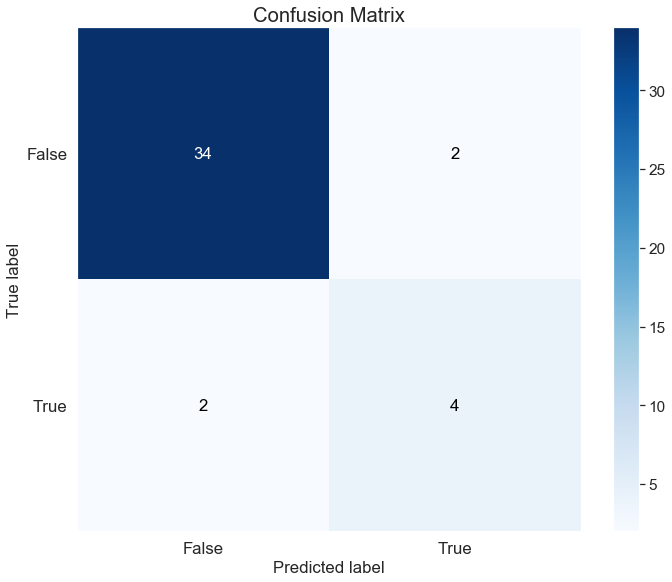

In [121]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X_tree, y_tree):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_tree[train_index], X_tree[test_index]
    y_train, y_test = y_tree[train_index], y_tree[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0
    
    
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train, y_train)
    pred = tree_clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For DecisionTreeClassifier accuracy score is", np.mean(accuracy_scores))
print("For DecisionTreeClassifier the precision score is", np.mean(precision_scores))
print("For DecisionTreeClassifier the recall score is", np.mean(recall_scores))
print("For DecisionTreeClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count
print(confusion_matrices)
    

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

#### DecisionTree Classifier evaluation with Hyperparameter Tuning and feature selection

For DecisionTreeClassifier accuracy score is 0.866404761904762
For DecisionTreeClassifier the precision score is 0.5661705683205683
For DecisionTreeClassifier the recall score is 0.4863333333333334
For DecisionTreeClassifier the f1 score is 0.49744323573743077
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.92975    0.07025   ]
 [0.51366667 0.48633333]]

Last iteration Stratified Shuffle Split confusion matrix:


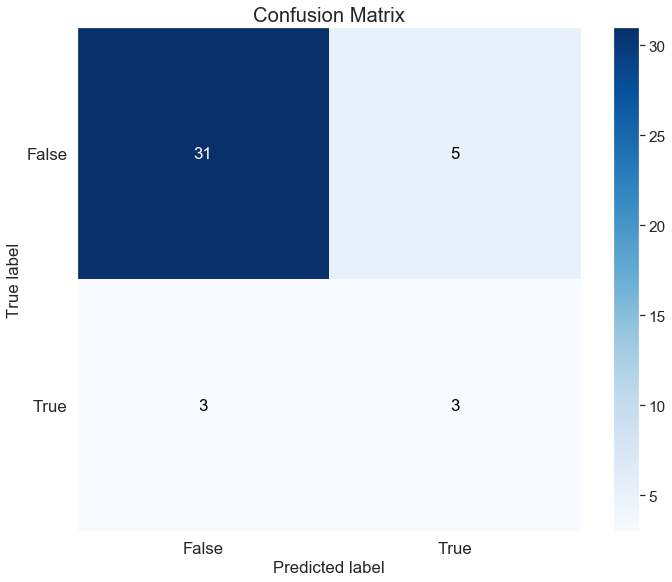

In [122]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X_tree, y_tree):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_tree[train_index], X_tree[test_index]
    y_train, y_test = y_tree[train_index], y_tree[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0
    
    
    tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt', min_samples_split=2, random_state=42)
    tree_clf.fit(X_train, y_train)
    pred = tree_clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For DecisionTreeClassifier accuracy score is", np.mean(accuracy_scores))
print("For DecisionTreeClassifier the precision score is", np.mean(precision_scores))
print("For DecisionTreeClassifier the recall score is", np.mean(recall_scores))
print("For DecisionTreeClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count
print(confusion_matrices)
    

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

#### Finding the optimal number of features for Adaboost classifier

In [123]:
n_features = np.arange(1, len(df_without_outliers_names_and_email_addresses.columns))
# Create a pipeline of feature selection and classifier
pipe = Pipeline([
    ('select_features', SelectKBest()),
    ('classify', AdaBoostClassifier(random_state=42))
])

param_grid = {
        'select_features__k': n_features
    }



sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

# Use GridSearchCV to automate the process of finding the optimal number of features
boost_clf= GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv = sss)
boost_clf.fit(X, y)
boost_clf.best_params_

{'select_features__k': 12}

#### Hyperparameter tuning for Adaboost Classifier after feature selection

In [525]:
n_features = np.arange(1, len(df_without_outliers_names_and_email_addresses.columns))
# Create a pipeline of feature selection and classifier
pipe = Pipeline([
    ('select_features', SelectKBest(k=12)),
    ('classify', AdaBoostClassifier(random_state=42))
])

param_grid = {
        'classify__n_estimators':[20,30,40,50,60,70,80,90],
        'classify__learning_rate':[0.05, 0.01, 0.1, 0.5]
    }



sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

# Use GridSearchCV to automate the process of finding the optimal number of features
boost_clf= GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv = sss)
boost_clf.fit(X, y)
boost_clf.best_params_

{'classify__learning_rate': 0.1, 'classify__n_estimators': 40}

#### Preparing data before Adaboost Training, selecting KBest Features, scaling

In [124]:
df_boost = df_without_outliers_names_and_email_addresses_and_feature_engineered[k_best_features_scores.feature[0:12]]

# Scale the dataset and send it back to a dictionary
scaled_df_boost = df_boost
scaled_df_boost = scale(scaled_df_boost)

scaled_df_boost = pd.DataFrame(scaled_df_boost)
scaled_df_boost.columns = df_boost.columns
#scaled_df["poi"] = df_without_outliers["poi"]

scaled_df_boost.insert(loc=0, column='poi', value=df_without_outliers["poi"].values)


X_boost = np.array(scaled_df_boost.drop(["poi"], axis=1))
y_boost = np.array(scaled_df_boost["poi"])

#### Adaboost Classifier evaluation with default parameter and feature selection

For AdaBoostClassifier accuracy score is 0.8745952380952383
For AdaBoostClassifier the precision score is 0.6020538628038627
For AdaBoostClassifier the recall score is 0.4726666666666666
For AdaBoostClassifier the f1 score is 0.50193222241295
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.94158333 0.05841667]
 [0.52733333 0.47266667]]

Last iteration Stratified Shuffle Split confusion matrix:


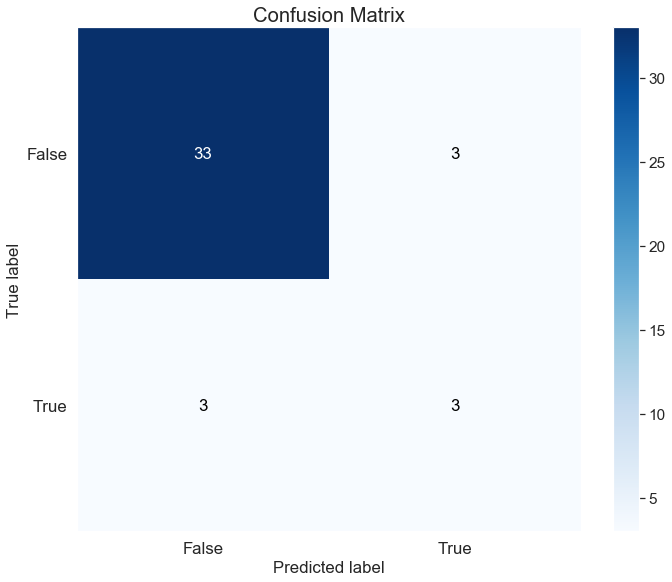

In [125]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X_tree, y_tree):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_boost[train_index], X_boost[test_index]
    y_train, y_test = y_boost[train_index], y_boost[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0
    
    
    boost_clf = AdaBoostClassifier(random_state=42)
    boost_clf.fit(X_train, y_train)
    pred = boost_clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For AdaBoostClassifier accuracy score is", np.mean(accuracy_scores))
print("For AdaBoostClassifier the precision score is", np.mean(precision_scores))
print("For AdaBoostClassifier the recall score is", np.mean(recall_scores))
print("For AdaBoostClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count
print(confusion_matrices)
    

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

#### Adaboost Classifier evaluation with hyperparameter tuning and feature selection

For AdaBoostClassifier accuracy score is 0.8873333333333335
For AdaBoostClassifier the precision score is 0.6645402958152958
For AdaBoostClassifier the recall score is 0.49266666666666664
For AdaBoostClassifier the f1 score is 0.5358640310669722
Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:
[[0.95311111 0.04688889]
 [0.50733333 0.49266667]]

Last iteration Stratified Shuffle Split confusion matrix:


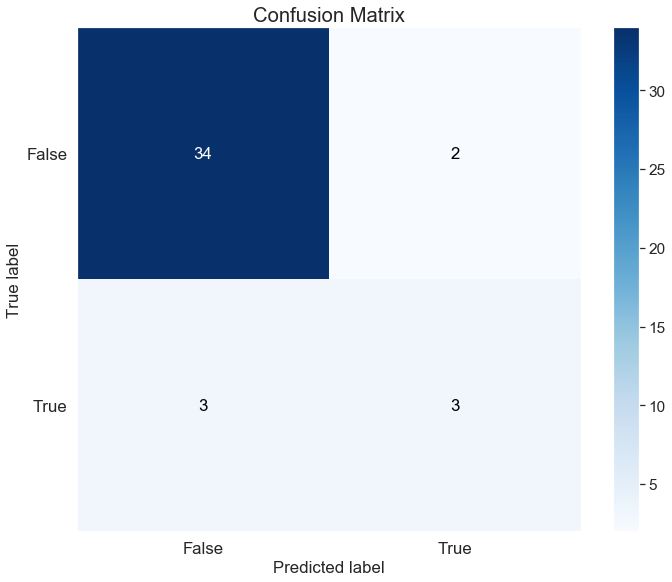

In [126]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = np.zeros((2,2), dtype="float")

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X_tree, y_tree):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_boost[train_index], X_boost[test_index]
    y_train, y_test = y_boost[train_index], y_boost[test_index]
    
    non_poi_count = np.count_nonzero(y_test == False) * 1000.0
    poi_count =  np.count_nonzero(y_test == True) * 1000.0
    
    
    boost_clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=40, random_state=42)
    boost_clf.fit(X_train, y_train)
    pred = boost_clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))
    confusion_matrices += confusion_matrix(y_test, pred)
    
print("For AdaBoostClassifier accuracy score is", np.mean(accuracy_scores))
print("For AdaBoostClassifier the precision score is", np.mean(precision_scores))
print("For AdaBoostClassifier the recall score is", np.mean(recall_scores))
print("For AdaBoostClassifier the f1 score is", np.mean(f1_scores))

print("Normalized confusion matrix after 1000 iterations of Stratified Shuffle Split:")
confusion_matrices[0] = confusion_matrices[0] / non_poi_count
confusion_matrices[1] = confusion_matrices[1] / poi_count
print(confusion_matrices)
    

print("\nLast iteration Stratified Shuffle Split confusion matrix:")
skplt.metrics.plot_confusion_matrix(y_test, pred)

### Table of all the Score Validations with ML models with default parameters / hyperparameter tuning, and feature selection


####  with default parameters, and feature selection

|Evaluation Metric / ML Model|Decision Tree Classifier|Adaboost
|------|------|
|Accuracy|0.870|0.874|
|Precision|0.575|0.602|
|Recall|0.526|0.472|
|F1 measure|0.526|0.502|


####  with hyperparameter tuning, and feature selection

|Evaluation Metric / ML Model|Decision Tree Classifier|Adaboost
|------|------|
|Accuracy|0.866|0.887|
|Precision|0.566|0.664|
|Recall|0.486|0.492|
|F1 measure|0.497|0.535|

With feature Selection and default parameters comparing the 2 ML models using the f1 metric which combines the precision and recall DecisionTree Classifier performs better than the Adaboost. But with tuning Adaboost performs even better. Nevertheless, if we look the following section which compares the validation metrics from all the experiments we will see that Feature Selection reduced our overall performance for all the average validation metrics for both the Decision Tree and Adaboost classifiers. 

## Final Comparison of all the results

#### Table of all the Score Validations for ML models with default parameters and default number of features:

| Evaluation Metric | SVM   | Decision Tree Classifier | Gaussian Naive Bayes | Random Forest | Adaboost | k-NN
|------|------|
|Accuracy|0.8558|0.837|0.606|0.871|0.873|0.840|
|Precision|0.0317|0.434|0.265|0.604|0.588|0.123|
|Recall|0.0055|0.400|0.65|0.657|0.447|0.037|
|F1 measure|0.0093|0.396|0.355|0.358|0.484|0.054|    


#### Table of all the Score Validations for ML models with default number of features and with hyperparameter tuning:

|Evaluation Metric / ML Model|SVM|Decision Tree Classifier|Random Forest|Adaboost |k-NN
|------|------|
|Accuracy|0.864|0.863|0.874|0.882|0.853|
|Precision|0.368|0.500|0.622|0.642|0.036|
|Recall|0.087|0.367|0.238|0.399|0.007|
|F1 measure|0.137|0.386|0.377|0.464|0.012|    


#### Table of all the Score Validations with ML models with default number of features and with new engineered features and with default ML parameters:

|Evaluation Metric / ML Model|SVM|Decision Tree Classifier|Gaussian Naive Bayes|Random Forest|Adaboost|k-NN
|------|------|
|Accuracy|0.854|0.869|0.622|0.882|0.889|0.852|
|Precision|0.011|0.563|0.277|0.682|0.660|0.335|
|Recall|0.002|0.543|0.647|0.304|0.537|0.093|
|F1 measure|0.003|0.529|0.397|0.377|0.564|0.14| 

    
#### Table of all the Score Validations with ML models with default number of features and with new engineered features and with hyperparameter tuning:

|Evaluation Metric / ML Model|SVM|Decision Tree Classifier|Random Forest|Adaboost|k-NN
|------|------|
|Accuracy|0.867|0.888|0.889|0.904|0.871|
|Precision|0.605|0.625|0.751|0.741|0.634|
|Recall|0.232|0.565|0.325|0.527|0.262|
|F1 measure|0.315|0.561|0.428|0.587|0.352|

#### Table of all the Score Validations for ML models  with default parameters, and feature selection

|Evaluation Metric / ML Model|Decision Tree Classifier|Adaboost
|------|------|
|Accuracy|0.870|0.874|
|Precision|0.575|0.602|
|Recall|0.526|0.472|
|F1 measure|0.526|0.502|


#### Table of all the Score Validations for ML models with hyperparameter tuning, and feature selection

|Evaluation Metric / ML Model|Decision Tree Classifier|Adaboost
|------|------|
|Accuracy|0.866|0.887|
|Precision|0.566|0.664|
|Recall|0.486|0.492|
|F1 measure|0.497|0.535|

Just by comparing all the tables and trying to reach to a conclusion wich ML model is the best fit for this dataset providing the fact that we are dealing with the issue of class imbalance I will go with the Adaboost with the setup of initial features and the new enginnered that were introduced and with hyperparameter tuning. My second choice would be the Decision Tree classifiers.

# Conclusion, Final Thoughts

Based on my experiments, our best models produced exceptional results with an average accuracy of 85% - 90%, average precision of 65% - 75% average recall of 45% - 50%, I believe that out ML models have done well considering the small amount of data and the issue of the class imbalance. The dataset is very small and more effort in feature engineering must be put to increase the validation metrics performace. Furthermore, I believe in the future I have to increase the range of my random seed due to the fact that I used only one random seed the value of 42 and I may fall into the trap of overfitting.

I forgot to mention the textual data from email, I noticed that by introducing more features like engineered ones, increase the overall average performance, thus I suggest that in the future adding the textual information by using techniques such as bag of words, stemming, lemmatization tf-idf etc. may increase even more the ML models' validation metrics.

As for my final selection of features and ML model. I will go with Adaboost classifier, from the beginning it was a very robust algorithm fitting very well to my dataset. As for the feature that I will finally select, I will select all the initial features after the preprocessing of their missing values including the new engineered features. 

# Appendix - Execution of the rest script *.py files 
Due to the Udacity Data Analyst Nanodegree requires to work and submit the poi_id.py and the tester.py I will now focus to work with these 2 files.

#### Preparing the *my_classifier.pkl*, *my_dataset.pkl* and *my_feature_list.pkl* and testing a Decision Tree Classifier to *tester.py* to gauge its  performance.

In [157]:
# Preparing the my_classifier.pkl, my_dataset.pkl and my_feature_list.pkl

features_list = ['poi', 'bonus', 'total_stock_value', 'exercised_stock_options',
       'shared_receipt_with_poi'] 
my_dataset = pickle.load(open("final_project_dataset.pkl", "rb"))
clf = DecisionTreeClassifier(random_state=42)


CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    with open(CLF_PICKLE_FILENAME, 'wb') as clf_outfile:
        pickle.dump(clf, clf_outfile)
    with open(DATASET_PICKLE_FILENAME, 'wb') as dataset_outfile:
        pickle.dump(dataset, dataset_outfile)
    with open(FEATURE_LIST_FILENAME, 'wb') as featurelist_outfile:
        pickle.dump(feature_list, featurelist_outfile)

dump_classifier_and_data(clf, my_dataset, features_list)

In [158]:
%run tester.py

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.81193	Precision: 0.35021	Recall: 0.37000	F1: 0.35983	F2: 0.36587
	Total predictions: 14000	True positives:  740	False positives: 1373	False negatives: 1260	True negatives: 10627



I will not continue to continue the experimentation with the various ML models due to the fact that I did this above. Experimentation is a continuous procedure in order to find the best features and the classifiers that fits well in this dataset.

#### Executing *poi_id.py* and *tester.py*

In [182]:
%run poi_id.py

In [183]:
%run tester.py

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
	Accuracy: 0.80585	Precision: 0.38489	Recall: 0.43800	F1: 0.40973	F2: 0.42624
	Total predictions: 13000	True positives:  876	False positives: 1400	False negatives: 1124	True negatives: 9600



As mentioned above these executions is just for the project's submission only and the discussion of the models' performance was discussed above and talked about the feature engineering and feature selection as well as the hyperparameter tuning.